In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
from openpyxl import load_workbook
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#pip install openpyxl

In [4]:
proj    = 'SN5'
address = "C:\DADOS\ANDERSON\PROJ_VULCAN\SN5_BMF_ALPHA\\"

In [5]:
cover         = ['CE', 'CQ']

fresh_clean   = ['HC', 'HF', 'JP']
str_ore       = ['HC', 'JP']
ore_rocks     = ['CE', 'HC', 'HF', 'HMN']
ff_rocks      = ['JP', 'HF', 'HC', 'HMN']
mineralized   = ['CE', 'HC', 'HF', 'HMN', 'FMN', 'JP']
waste         = ['CQ', 'MD', 'MS', 'MSD', 'BR']

model_rocks = ['CE', 'HC', 'MD', 'HF', 'CQ', 'SR', 'MSD', 'AT', 'MS', 'HMN', 'DT', 'FMN', 'JP', 'CGL']

teores_gl     = ['FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL']
teores_g1a    = ['FE1A', 'SI1A', 'P1A', 'AL1A', 'MN1A', 'PF1A', 'TI1A', 'MG1A', 'CA1A']
faixas        = ['G1A', 'G1B', 'G2', 'G3']
param_event   = ['FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL', 'G1', 'G1A', 'G1B', 'G2', 'G3']

not_countable = ['FURO','NA','DE','ATE','CLV','CLM','FLX_AN','FLX_AN_OR','DA_ANA','DA_SAM','d_agru','tipo_am','global','mass_t','status']

gran_batch = ['G1A', 'G1B', 'G2', 'G3']

set_g1a = ['G1A','FE1A', 'SI1A', 'P1A', 'AL1A', 'MN1A', 'PF1A', 'TI1A', 'MG1A', 'CA1A']
set_g1b = ['G1B','FE1B', 'SI1B', 'P1B', 'AL1B', 'MN1B','PF1B', 'TI1B', 'MG1B', 'CA1B']
set_g2 = ['G2','FE2', 'SI2', 'P2', 'AL2','MN2', 'PF2', 'TI2', 'MG2', 'CA2']
set_g3 = ['G3','FE3', 'SI3', 'P3', 'AL3', 'MN3','PF3', 'TI3', 'MG3', 'CA3']

litocolor=dict(AG= "#FFEEBB",AT= "#777777",CE= "#00AA00",CH= "#FFFF00",CQ= "#77FFBB", \
               FMN= "#7766DD",HC= "#EE0000",HF= "#EE00DD",HMN= "#995555",JP= "#004488", \
               LT= "#99BB99",MD= "#CC8800",MS= "#99BB99",MSD= "#DDCC77",QT= "#776655", \
               SO= "#336611",SR= "#FFFFFF",XI= "#CC8800", BR= "#BB133E")


valecolor= dict(VERDE='#007E7A',LARANJA='#ECB11F',CINZA='#6F7070',BRANCO='#FFFFFF', \
                LARANJA2='#E37222',VERMELHO='#BB133E',AZUL='#3D7EDB',AZUL2='#00B0CA', \
                VERDE2='#69BE28',AMARELO='#DFDF00')

chart_size= [10,10]




## DIRETÓRIOS

In [6]:
#CRIA ENDEREÇO NO CASO DE NÃO EXISTIR
if not os.path.exists('000_anulados'):
    os.mkdir('000_anulados')
if not os.path.exists('000_backup'):
    os.mkdir('000_backup')

## LISTAS

In [7]:
waste = [ 'MD', 'MS', 'MSD', 'BR']

GL=['FEGL','SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL']

faixa = ['1A', '1B', '2', '3']

var6_quim =['FE', 'SI', 'P', 'AL', 'MN', 'PF']

var3_quim = ['TI', 'MG', 'CA']


## LOAD DATA

In [8]:
fso = pd.read_csv(address+'sn5flp_fso_assay.csv', low_memory=False, na_values='-99', encoding="latin1")
fso.rename(columns=str.upper, inplace=True)

In [9]:
fso.shape

(26900, 136)

In [10]:
fso.head(10)

FURO              NA     DE    ATE  LENGTH  CLV  CLM CLI   FEGL  \
0  FRN5E-0092  FRN5E-0092-001   0.00  12.60   12.60   CM   CE  CE  65.91   
1  FRN5E-0092  FRN5E-0092-002  12.60  18.65    6.05   HD   HC  HC  66.96   
2  FRN5E-0092  FRN5E-0092-003  18.65  26.15    7.50   HM   HC  HC  67.32   
3  FRN5E-0092  FRN5E-0092-004  26.15  33.65    7.50   HM   HC  HC  64.78   
4  FRN5E-0092  FRN5E-0092-005  33.65  42.10    8.45  MBT  MBT  MD  56.91   
5  FRN5E-0092   FRN5E-0092-NS  42.10  45.00    2.90   MD   MD  MD    NaN   
6  FRN5E-0093   FRN5E-0093 01   0.00   7.50    7.50   HD   HC  CE  66.66   
7  FRN5E-0093   FRN5E-0093 02   7.50  15.60    8.10   HD   HC  CE  67.24   
8  FRN5E-0093   FRN5E-0093 03  15.60  23.10    7.50   HM   HF  HF  67.88   
9  FRN5E-0093   FRN5E-0093 04  23.10  30.60    7.50   HM   HF  HF  66.19   

   SIGL   PGL  ALGL  MNGL  PFGL  TIGL  MGGL  CAGL  FOGL  KGL  CUGL     G1  \
0   NaN  0.12   NaN  0.03  4.49   NaN   NaN   NaN   NaN  NaN   NaN  82.29   
1   NaN  0.11   NaN  0.02  2.81   NaN   NaN   NaN   NaN  NaN   NaN  82.57   
2   NaN  0.07   NaN  0.03  2.04   NaN   NaN   NaN   NaN  NaN   NaN  63.66   
3   NaN  0.12   NaN  0.03  4.20   NaN   NaN   NaN   NaN  NaN   NaN  73.88   
4   NaN  0.17   NaN  0.10  9.35   NaN   NaN   NaN   NaN  NaN   NaN  40.64   
5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN    NaN   
6   NaN  0.13   NaN  0.04  3.23   NaN   NaN   NaN   NaN  NaN   NaN  77.95   
7   NaN  0.08   NaN  0.19  2.07   NaN   NaN   NaN   NaN  NaN   NaN  66.51   
8   NaN  0.04   NaN  0.35  1.23   NaN   NaN   NaN   NaN  NaN   NaN  29.42   
9   NaN  0.06   NaN  0.29  2.40   NaN   NaN   NaN   NaN  NaN   NaN  26.22   

     G1A    G1B     G2  G2A  G2B    G3    FE1   SI1    P1   AL1   MN1   PF1  \
0  67.16  15.13  16.88  NaN  NaN  0.68  65.84  0.34  0.12  1.18  0.03  4.60   
1  71.79  10.78  16.67  NaN  NaN  0.56  66.95  0.32  0.11  0.67  0.02  2.83   
2  55.53   8.13  33.49  NaN  NaN  2.69  67.10  0.27  0.08  0.67  0.03  2.20   
3  60.94  12.94  24.27  NaN  NaN  1.70  65.58  0.41  0.11  1.48  0.03  3.61   
4  22.57  18.07  51.04  NaN  NaN  8.23  61.47  0.54  0.16  4.30  0.05  6.99   
5    NaN    NaN    NaN  NaN  NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   
6  61.10  16.85  21.46  NaN  NaN  0.52  66.60  0.30  0.13  0.69  0.04  3.33   
7  49.54  16.97  31.25  NaN  NaN  2.12  67.02  0.31  0.08  0.77  0.16  2.27   
8  11.60  17.82  63.69  NaN  NaN  5.94  68.27  0.31  0.03  0.60  0.26  0.96   
9  12.70  13.52  66.89  NaN  NaN  6.86  67.76  0.31  0.04  0.90  0.20  1.43   

    TI1    MG1    CA1  FO1  K1    CU1   FE1A  SI1A   P1A  AL1A  MN1A  PF1A  \
0  0.13  0.003  0.001  NaN NaN  0.001  65.80  0.34  0.12  1.21  0.03  4.65   
1  0.07  0.002  0.002  NaN NaN  0.002  66.96  0.31  0.11  0.65  0.02  2.77   
2  0.10  0.002  0.004  NaN NaN  0.004  67.09  0.27  0.08  0.68  0.03  2.23   
3  0.12  0.004  0.004  NaN NaN  0.004  65.91  0.36  0.11  1.25  0.03  3.42   
4  0.32  0.010  0.005  NaN NaN  0.005  62.89  0.51  0.16  3.28  0.05  6.24   
5   NaN    NaN    NaN  NaN NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   
6  0.12  0.001  0.002  NaN NaN  0.002  66.58  0.30  0.13  0.69  0.04  3.38   
7  0.08  0.005  0.020  NaN NaN  0.020  66.85  0.31  0.08  0.82  0.16  2.40   
8  0.05  0.004  0.005  NaN NaN  0.005  68.66  0.27  0.03  0.51  0.26  0.75   
9  0.07  0.005  0.004  NaN NaN  0.004  68.36  0.29  0.03  0.65  0.20  0.95   

   TI1A   MG1A   CA1A  FO1A  K1A  CU1A   FE1B  SI1B   P1B  AL1B  MN1B  PF1B  \
0  0.14  0.003  0.001   NaN  NaN   NaN  66.05  0.36  0.12  1.03  0.03  4.37   
1  0.07  0.002  0.002   NaN  NaN   NaN  66.88  0.33  0.12  0.77  0.02  3.26   
2  0.09  0.002  0.004   NaN  NaN   NaN  67.18  0.30  0.06  0.64  0.04  2.03   
3  0.11  0.003  0.004   NaN  NaN   NaN  64.07  0.65  0.12  2.56  0.03  4.53   
4  0.29  0.010  0.004   NaN  NaN   NaN  59.71  0.58  0.16  5.59  0.07  7.93   
5   NaN    NaN    NaN   NaN  NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   
6  0.13  0.001  0.001   NaN  NaN   NaN  66

In [940]:
# load qaqc dataframe

In [11]:
df_qaqc = pd.read_csv('C:\DADOS\ANDERSON\PROJ_VULCAN\SN5_1221\DATA\sn5_qaqc_blacklist.csv', low_memory=False, na_values='-99', encoding="latin1")

In [12]:
df_qaqc

AMOSTRA   AG  DC   DB   DP  DE  A3
0         N5E-0161-009    X NaN  NaN  NaN NaN NaN
1         N5E-0547-007    X NaN  NaN  NaN NaN NaN
2         N5S-0897-002    X NaN  NaN  NaN NaN NaN
3         N5S-0897-007    X NaN  NaN  NaN NaN NaN
4         N5S-0905-002    X NaN  NaN  NaN NaN NaN
5         N5W-0120-007    X NaN  NaN  NaN NaN NaN
6         N5W-0923-003    X NaN  NaN  NaN NaN NaN
7         N5W-0927-003    X NaN  NaN  NaN NaN NaN
8         N5W-0927-004    X NaN  NaN  NaN NaN NaN
9         N5W-1006-001    X NaN  NaN  NaN NaN NaN
10     N5W-FD01217-003  NaN NaN    X  NaN NaN NaN
11  N5W-FD01403-004-03  NaN NaN  NaN    X NaN NaN
12  N5W-FR01381-003-02  NaN NaN  NaN    X NaN NaN
13     N5W-RC00001-006  NaN NaN    X  NaN NaN NaN
14  SN5-FD00003-003-01  NaN NaN    X  NaN NaN NaN
15  SN5-FD00064-005-01  NaN NaN    X  NaN NaN NaN
16  SN5-FD00081-014-01  NaN NaN    X  NaN NaN NaN
17  SN5-FD00203-006-01  NaN NaN  NaN    X NaN NaN
18     SN5-FD00248-004    X NaN  NaN  NaN NaN NaN
19     SN5-FD00262-012    X NaN  NaN  NaN NaN NaN
20     SN5-FR00107-005    X NaN  NaN  NaN NaN NaN
21   SN5-FR00116-AE002  NaN NaN    X  NaN NaN NaN

In [943]:
#criando planilha sequencial com sumario

In [13]:
summary=pd.DataFrame()


## FUNCTIONS

In [14]:
#retorna se houve retido ou não naquela faixa
def mass_is_zero(m):
    if pd.notna(m):
        if(m == 0):
            return True
        else:
            return False

In [15]:
#função para adicionar dataframe sumario ao arquivo prepara fac
def update_summary():
    
    book = load_workbook(proj + '_PREPARA_FAC.xlsx')
    
    writer = pd.ExcelWriter(proj+ "_PREPARA_FAC.xlsx", engine="openpyxl", mode='a', if_sheet_exists='replace')
    writer.book = book
    summary.to_excel(writer, sheet_name='PROCEDIMENTOS')
    writer.save()
    writer.close()
    

In [16]:
summary

Empty DataFrame
Columns: []
Index: []

In [17]:
def add_to_fac(df, sheetname):
    
    book = load_workbook(proj + '_PREPARA_FAC.xlsx')    
    writer = pd.ExcelWriter(proj+ "_PREPARA_FAC.xlsx", engine="openpyxl", mode='a', if_sheet_exists='replace')
    #writer = pd.ExcelWriter(proj+ "_PREPARA_FAC.xlsx", engine="xlsxwriter")
    writer.book = book
    df.to_excel(writer, sheet_name = sheetname )
    writer.save()
    writer.close()

In [18]:
#função para adicionar sequencia de procedimentos a uma tabela de sumario
def add_to_summary(df1, df2, sheet_name, desc, obs, dfsummary):    
    
    data=pd.DataFrame({'SHEET':[sheet_name],
                       'DESC': [desc],
                       'NSAMP_INICIAL':[df1.LENGTH.count()],
                       'NSAMP_FINAL':[df2.LENGTH.count()],
                       'DIFF_N':[df2.LENGTH.count() - df1.LENGTH.count()],
                       'DIFF_N_PERC':[(df2.LENGTH.count()-df1.LENGTH.count())/df1.LENGTH.count()],
                       'METRAGEM_INICIAL':df1.LENGTH.sum(),
                       'METRAGEM_FINAL':df2.LENGTH.sum(),
                       'DIFF_M':df2.LENGTH.sum() - df1.LENGTH.sum(),
                       'DIFF_M_PERC': (df2.LENGTH.sum() - df1.LENGTH.sum())/df1.LENGTH.sum(),
                       'OBS':[obs]
                      })
    dfsummary=dfsummary.append(data, ignore_index=True)
    return dfsummary

In [19]:
def cleanup_gl_grq(df, df_subset):
    
    df.loc[df_subset,'FGRA'] = np.nan
    for fx in faixa:
        df.loc[df_subset,'FQGL'] = np.nan
        df.loc[df_subset,'FQ' + fx] = np.nan
        df.loc[df_subset,'G' + fx] = np.nan
        for v in var6_quim + var3_quim:
            df.loc[df_subset, v + 'GL'] = np.nan
            df.loc[df_subset, v + fx] = np.nan
    return df

In [20]:
#recebe um dataframe, uma faixa onde há resíduos, uma faixa vizinha para receber o resíduo,
#torna a faixa 100% passante e transfere para outra
#anula teores da faixa zerada
#calcula novo teor médio da faixa resultante
#função executa sobre o dataframe e não tem valor de retorno

def pass_to_another_fraction(df, mass_from, mass_to, tolerance):
    di=(df['G' + mass_from] < tolerance) & (df['G' + mass_from] > 0)
        
    df.loc[di, 'FLAG_G' + mass_from] = 'X'
    
    bi = df['FLAG_G'+ mass_from] == 'X'
    df['NEW_G'+ mass_to] = np.nan
    df['NEW_G'+ mass_to] = df.loc[bi, ['G' + mass_from, 'G' + mass_to]].sum(axis=1)
    
    #calculando teor medio ponderado entre as duas faixas
    for v in var6_quim + var3_quim:
        df['NEW_' + v + mass_to] = np.nan                                  
        df.loc[bi, 'NEW_' + v + mass_to] = (df.loc[bi, 'G'+ mass_from] * df.loc[bi, v + mass_from] + df.loc[bi, 'G'+ mass_to] * df.loc[bi, v + mass_to])/(df.loc[bi, ['G'+ mass_from, 'G' + mass_to]].sum(axis=1))
    
    #salva novos campos como backup antes de transferir e sobrescrever
    df.to_csv('000_backup/' + mass_to+'_bypass.csv')
    add_to_fac(bi, 'G' + mass_from + '_LT' + str(tolerance))
    
    #passa teores ponderados recebendo massa residual (verificar se por azar o bypass não foi para outra faixa residual)
    for v in var6_quim + var3_quim:
            
        #passando o valor do teor ponderado para a faixa receptora
        df.loc[bi, v + mass_to] = df.loc[bi, 'NEW_' + v + mass_to]
        #passando o valor residual para 100% passante (zero retido)        
        df.loc[bi, 'G' + mass_from] = 0
        #recebendo o resíduo na massa da faixa receptora
        df.loc[bi, 'G' + mass_to] = df.loc[bi, 'NEW_G'+mass_to]
        #uma vez que é zero retido, anulando para dummy os teores da faixa que tinha resíduo
        df.loc[bi, v + mass_from] = np.nan  
    
    
    

##### CONSULTA TABELA DE ESTATÍSTICA E RETORNA VALOR (TABELA CRIADA EM SN5_BASIC_STATS)

In [21]:
def stats_from_table( excelfilename, rocktype, variable, statsparameter):
    df = pd.read_excel(excelfilename, sheet_name = variable)
    #df.set_index('CLI')
    return df.loc[df.CLI==rocktype, statsparameter].values[0]

###### LINHA EXEMPLO

In [22]:
# testing function above
# we call this function to get any statistical parameter
# note: wavg is average weigthed by sample length...
# commonly it's sligthly different if compaired with mean

stats_from_table('SN5_basic_stats_table_GL.xlsx', 'HF', 'FEGL', 'wavg')

66.81195912215746

###### LENDO A TABELA DE REFERÊNCIA PARA VERIFICAÇÃO MANUAL

In [23]:
df = pd.read_excel('SN5_basic_stats_table_GL.xlsx', sheet_name='FEGL')

In [24]:
df

CLI  count       mean       wavg  minimum      Q25    Q50      Q75  \
0    AT     25  57.305600  58.896730    40.38  52.9800  59.35  64.5500   
1    CE   1945  63.524478  63.331933    54.70  61.8200  64.26  65.8700   
2   CGL      9   7.434444   6.824008     2.58   3.6300   4.34  10.9000   
3    CQ    616  44.634302  44.887686    16.40  39.3950  45.84  51.1700   
4   FMN    250  45.015800  44.522850    19.56  40.0700  47.36  51.6975   
5    HC   1996  66.329354  66.190564    52.45  65.3400  67.03  68.1000   
6    HF  10712  66.877591  66.811959    52.31  66.2900  67.48  68.1700   
7   HMN    786  61.519924  61.460668    54.05  59.2475  61.87  63.9300   
8    JP   1138  44.180492  43.512989     7.46  38.9750  43.18  51.7625   
9    MD    909  31.741947  29.890462     4.86  22.5900  30.52  39.7700   
10   MS    119  16.711597  15.311167     5.61   9.5450  14.33  19.9350   
11  MSD     84  22.731310  22.084716     8.17  14.3550  20.74  27.4450   

    maximum    variance    std dev  INLIERS_FLOOR  INLIERS_CEIL  
0     68.23   78.244385   8.845586       35.62500      81.90500  
1     69.30    9.873410   3.142198       55.74500      71.94500  
2     22.67   38.561602   6.209799       -7.27500      21.80500  
3     55.73   59.167692   7.692054       21.73250      68.83250  
4     57.45   69.304581   8.324937       22.62875      69.13875  
5     69.90    6.167387   2.483422       61.20000      72.24000  
6     69.85    3.957733   1.989405       63.47000      70.99000  
7     68.75    9.223657   3.037047       52.22375      70.95375  
8     61.48   85.807841   9.263252       19.79375      70.94375  
9     67.40  151.897221  12.324659       -3.18000      65.54000  
10    56.95   98.588597   9.929179       -6.04000      35.52000  
11    66.54  138.655492  11.775207       -5.28000      47.08000

In [25]:
df.loc[df.CLI=='HF', 'wavg']

6    66.811959
Name: wavg, dtype: float64

In [957]:
def fq(fe, si, p, al, mn, pf, ti, mg, ca):
    
    if fe == np.nan : fe = 0
    if si == np.nan : si = 0
    if p  == np.nan : p = 0
    if al == np.nan : al = 0
    if mn == np.nan : mn = 0
    if pf == np.nan : pf = 0
    if ti == np.nan : ti = 0
    if mg == np.nan : mg = 0
    if ca == np.nan : ca = 0
    
    return 1.4297 * fe + si + 2.2914 * p + al + 1.2912 * mn + pf + ti + mg + ca 

In [958]:
#EM CONSTRUÇÃO...

In [959]:
''' def chart_batch(df, setgran, color):
    
    'df_g' + setgran=fso.loc[0:, 'set_g' + setgran]
    
    'df_g' + setgran['G'+ setgran +'ZERO']=df_g1a.apply(lambda row: mass_is_zero(row['G' + setgran]), axis=1)
    
    'g' + setgran + '_count' = 'df_g' + setgran.groupby('G'+setgran+'ZERO').count()['set_g' + setgran]
    
    'OVERSIZE_G'+setgran='g'+setgran+'_count'.loc[0,:].values.tolist()
    
    'ZERO_G' + setgran = 'g'+setgran+'_count'.loc[1,:].values.tolist()
    
    # chart:
    
    fig, ax = plt.subplots(figsize=chart_size)

    barwidth=1

    #x=np.arange(len(set_g1a))

    rects1 = ax.bar('set_g'+setgran, 'OVERSIZE_G' + setgran, label='RETAINED', color=valecolor[color])
    rects2 = ax.bar('set_g'+setgran, 'ZERO_G' + setgran, label='FULL_BY_PASS', bottom=OVERSIZE_G1A,color=valecolor['LARANJA'])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('SAMPLE COUNT')
    ax.set_title('GRADES FOR MASS RETAINED AND FULL BY PASS')
    ax.set_xticks('set_g' + setgran)
    ax.set_xticklabels('set_g' + setgran)
    ax.legend()

    ax.bar_label(rects1, padding=1)
    ax.bar_label(rects2, padding=1)

    fig.tight_layout()

    fig.savefig(proj + '_G'+ setgran + '_ISOT_VALUES_MASS_GRADE.jpeg', transparent=None)'''

" def chart_batch(df, setgran, color):\n    \n    'df_g' + setgran=fso.loc[0:, 'set_g' + setgran]\n    \n    'df_g' + setgran['G'+ setgran +'ZERO']=df_g1a.apply(lambda row: mass_is_zero(row['G' + setgran]), axis=1)\n    \n    'g' + setgran + '_count' = 'df_g' + setgran.groupby('G'+setgran+'ZERO').count()['set_g' + setgran]\n    \n    'OVERSIZE_G'+setgran='g'+setgran+'_count'.loc[0,:].values.tolist()\n    \n    'ZERO_G' + setgran = 'g'+setgran+'_count'.loc[1,:].values.tolist()\n    \n    # chart:\n    \n    fig, ax = plt.subplots(figsize=chart_size)\n\n    barwidth=1\n\n    #x=np.arange(len(set_g1a))\n\n    rects1 = ax.bar('set_g'+setgran, 'OVERSIZE_G' + setgran, label='RETAINED', color=valecolor[color])\n    rects2 = ax.bar('set_g'+setgran, 'ZERO_G' + setgran, label='FULL_BY_PASS', bottom=OVERSIZE_G1A,color=valecolor['LARANJA'])\n\n    # Add some text for labels, title and custom x-axis tick labels, etc.\n    ax.set_ylabel('SAMPLE COUNT')\n    ax.set_title('GRADES FOR MASS RETAINED AND

## PLANO DE REGULARIZAÇÃO

In [26]:
# conforme as leituras realizadas em SN5_EDA, observou-se que grande parte dos dados pode ser conduzida aos
# trabalhos seguintes de estimativa, mesmo nos casos mais gritantes de heterotopia
    

In [27]:
from IPython.display import Image
from IPython.core.display import HTML 

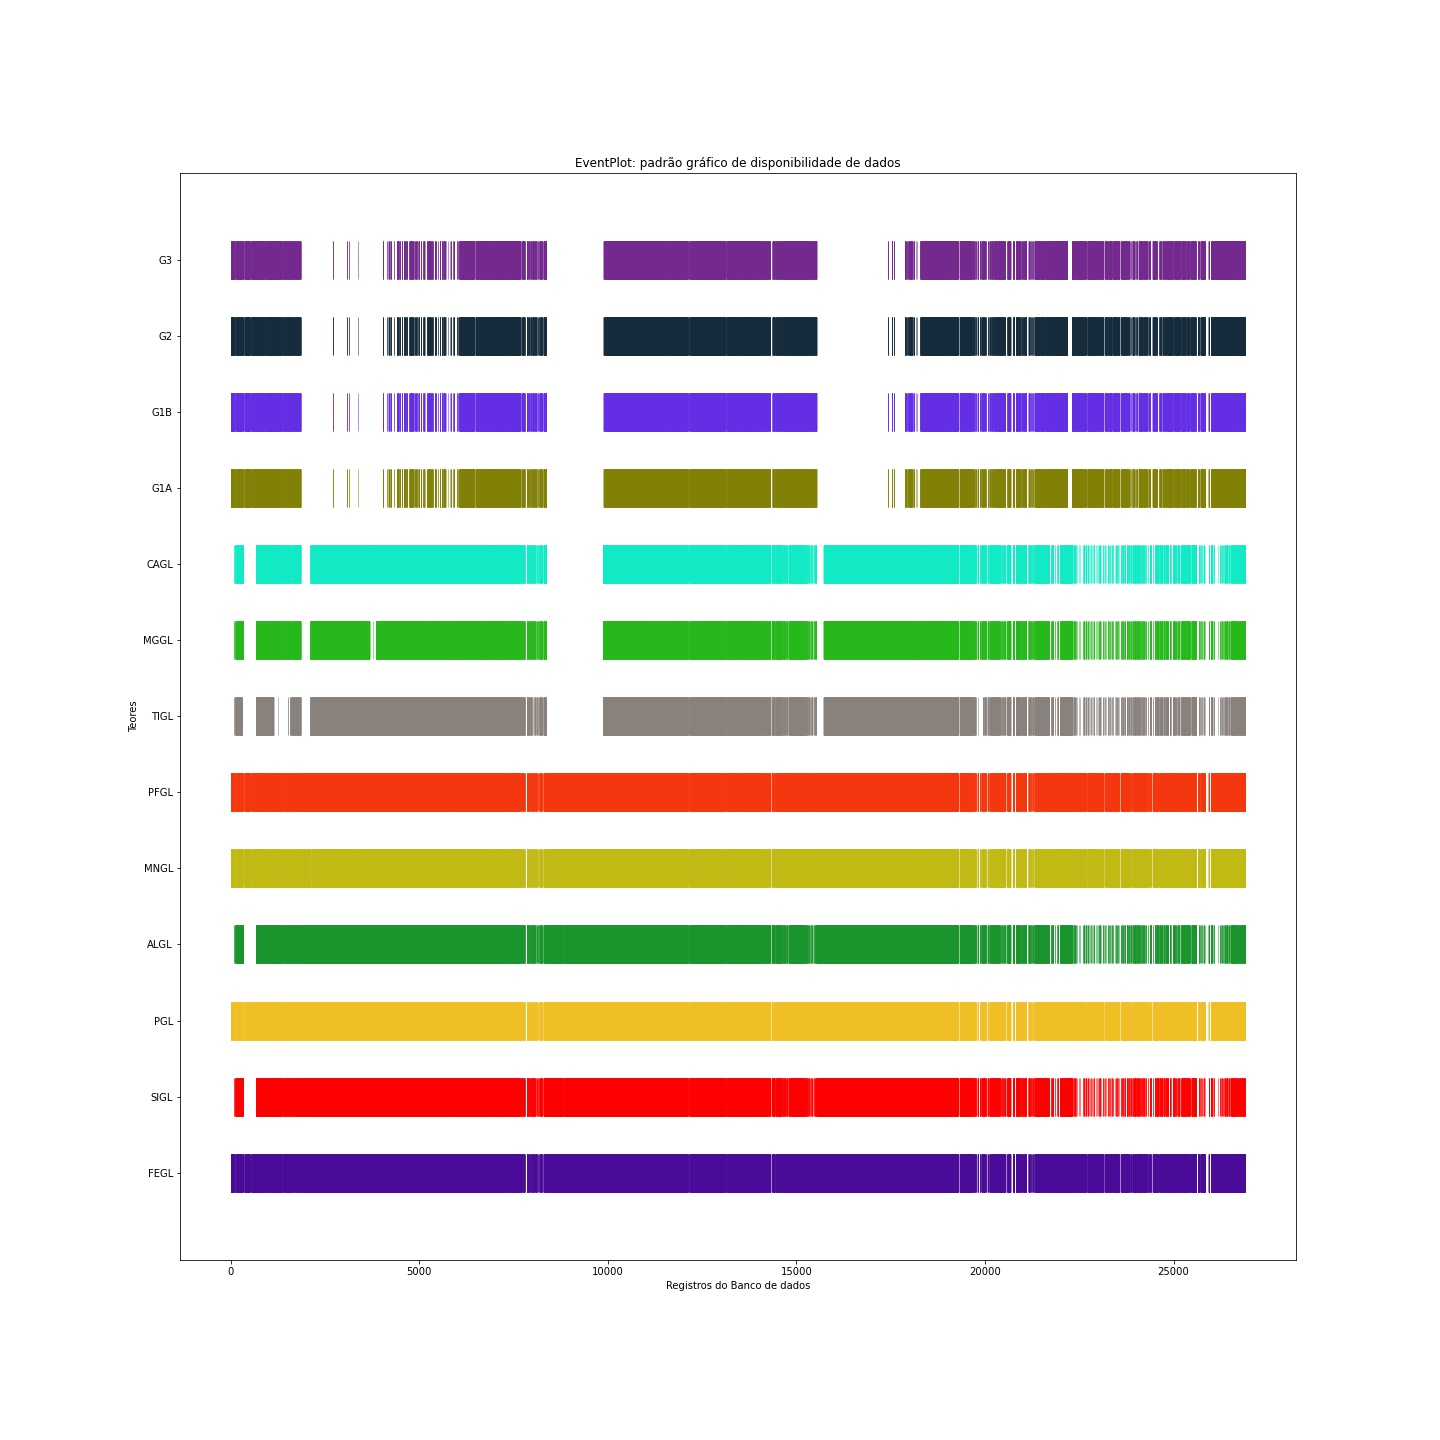

In [28]:
Image(proj+'_eventplot_data_available.jpeg')

#### A regularização será feita de acordo com a seguinte ordem


###### 
 - leitura da estrutura de dados do fso;
 - definição da estrutura de dados a conduzir;
 - regularização e correção global;
 - regularização e correção G1A;
 - regularização e correção G1BA;
 - regularização e correção G2;
 - regularização e correção G3;
 - eliminação de registros deficientes em recuperação
 - eliminação de registros com problemas no programa de qaqc 


## ISOTOPIA GLOBAL

In [29]:
# definindo estrutura fac:


In [30]:
fso.columns.tolist()

['FURO',
 'NA',
 'DE',
 'ATE',
 'LENGTH',
 'CLV',
 'CLM',
 'CLI',
 'FEGL',
 'SIGL',
 'PGL',
 'ALGL',
 'MNGL',
 'PFGL',
 'TIGL',
 'MGGL',
 'CAGL',
 'FOGL',
 'KGL',
 'CUGL',
 'G1',
 'G1A',
 'G1B',
 'G2',
 'G2A',
 'G2B',
 'G3',
 'FE1',
 'SI1',
 'P1',
 'AL1',
 'MN1',
 'PF1',
 'TI1',
 'MG1',
 'CA1',
 'FO1',
 'K1',
 'CU1',
 'FE1A',
 'SI1A',
 'P1A',
 'AL1A',
 'MN1A',
 'PF1A',
 'TI1A',
 'MG1A',
 'CA1A',
 'FO1A',
 'K1A',
 'CU1A',
 'FE1B',
 'SI1B',
 'P1B',
 'AL1B',
 'MN1B',
 'PF1B',
 'TI1B',
 'MG1B',
 'CA1B',
 'FO1B',
 'K1B',
 'CU1B',
 'FE2',
 'SI2',
 'P2',
 'AL2',
 'MN2',
 'PF2',
 'TI2',
 'MG2',
 'CA2',
 'FO2',
 'K2',
 'CU2',
 'FE2A',
 'SI2A',
 'P2A',
 'AL2A',
 'MN2A',
 'PF2A',
 'TI2A',
 'MG2A',
 'CA2A',
 'FO2A',
 'K2A',
 'CU2A',
 'FE2B',
 'SI2B',
 'P2B',
 'AL2B',
 'MN2B',
 'PF2B',
 'TI2B',
 'MG2B',
 'CA2B',
 'FO2B',
 'K2B',
 'CU2B',
 'FE3',
 'SI3',
 'P3',
 'AL3',
 'MN3',
 'PF3',
 'TI3',
 'MG3',
 'CA3',
 'FO3',
 'K3',
 'CU3',
 'FQGL',
 'FQ1',
 'FQ1A',
 'FQ1B',
 'FQ2',
 'FQ2A',
 'FQ2B',
 'FQ3',


In [43]:
fac_var = ['FURO', 'NA', 'DE', 'ATE', 'LENGTH', 'CLV', 'CLM', 'CLI',
 'FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL', 
 'G1A', 'G1B', 'G2',  'G3',
 'FE1A', 'SI1A', 'P1A', 'AL1A', 'MN1A', 'PF1A', 'TI1A', 'MG1A', 'CA1A', 
 'FE1B', 'SI1B', 'P1B', 'AL1B', 'MN1B', 'PF1B', 'TI1B', 'MG1B', 'CA1B', 
 'FE2', 'SI2', 'P2', 'AL2', 'MN2', 'PF2', 'TI2', 'MG2', 'CA2',  
 'FE3', 'SI3', 'P3', 'AL3', 'MN3', 'PF3', 'TI3', 'MG3', 'CA3', 
 'FQGL',  'FQ1A', 'FQ1B', 'FQ2',  'FQ3', 'FGRA',
 'REC_P', 'FL_AN', 'FQ_GLA', 'STATUS']

In [44]:
GL =['FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL']

In [45]:
df_gl = fso.loc[:,GL]

In [46]:
df_gl.head(5)

FEGL  SIGL   PGL  ALGL  MNGL  PFGL  TIGL  MGGL  CAGL
0  65.91   NaN  0.12   NaN  0.03  4.49   NaN   NaN   NaN
1  66.96   NaN  0.11   NaN  0.02  2.81   NaN   NaN   NaN
2  67.32   NaN  0.07   NaN  0.03  2.04   NaN   NaN   NaN
3  64.78   NaN  0.12   NaN  0.03  4.20   NaN   NaN   NaN
4  56.91   NaN  0.17   NaN  0.10  9.35   NaN   NaN   NaN

In [47]:
df_gl['GL_COUNT']=df_gl.count(axis=1)

In [48]:
df_gl.head(5)

FEGL  SIGL   PGL  ALGL  MNGL  PFGL  TIGL  MGGL  CAGL  GL_COUNT
0  65.91   NaN  0.12   NaN  0.03  4.49   NaN   NaN   NaN         4
1  66.96   NaN  0.11   NaN  0.02  2.81   NaN   NaN   NaN         4
2  67.32   NaN  0.07   NaN  0.03  2.04   NaN   NaN   NaN         4
3  64.78   NaN  0.12   NaN  0.03  4.20   NaN   NaN   NaN         4
4  56.91   NaN  0.17   NaN  0.10  9.35   NaN   NaN   NaN         4

In [49]:
# how many global grades per row?
df_gl['GL_COUNT'].unique()

array([4, 0, 9, 8, 7, 6, 5, 3, 2], dtype=int64)

In [50]:
df_gl.groupby('GL_COUNT').count()

FEGL   SIGL    PGL   ALGL   MNGL   PFGL   TIGL   MGGL   CAGL
GL_COUNT                                                               
0             0      0      0      0      0      0      0      0      0
2             2      0      2      0      0      0      0      0      0
3            13      8     13      0      0      5      0      0      0
4          2765      1   2765      1   2765   2765      0      1      1
5            22     28     20     28      5     19      8     10     10
6          1533   1533   1532   1533   1533   1532      0      1      1
7            73     73     69     73     61     28     44     52     38
8          1053   1053   1045   1052    731    927    716    893    954
9         13128  13128  13128  13128  13128  13128  13128  13128  13128

##### Há 4 padrões relevantes de heterotopia global:
 - 4 valores : 2765 registros: 2765 amostras sem sílica, sem alumina, sem titânio, sem magnésio, sem cálcio;
 - 6 valores : 1533 registros: 1 amostra sem fósforo, sem pfgl, sem titânio;  1532 amostras sem menores;
 - 8 valores : 1053 registros: 8 amostras sem pgl, 1 sem alumina, 322 sem manganÊs, 126 sem pfgl, 337 sem titânio, 160 sem mg, 99 sem ca

In [51]:
13+2765+22+1533+73+1053+13126

18585

In [52]:
df_gl.to_csv('verificar_global.csv')

In [53]:
8+1+322+126+337+160+99


1053

###### Começando pelos registros com 8 valores

In [54]:
fac = fso.loc[:, fac_var]

In [55]:
fac.head(5)

FURO              NA     DE    ATE  LENGTH  CLV  CLM CLI   FEGL  \
0  FRN5E-0092  FRN5E-0092-001   0.00  12.60   12.60   CM   CE  CE  65.91   
1  FRN5E-0092  FRN5E-0092-002  12.60  18.65    6.05   HD   HC  HC  66.96   
2  FRN5E-0092  FRN5E-0092-003  18.65  26.15    7.50   HM   HC  HC  67.32   
3  FRN5E-0092  FRN5E-0092-004  26.15  33.65    7.50   HM   HC  HC  64.78   
4  FRN5E-0092  FRN5E-0092-005  33.65  42.10    8.45  MBT  MBT  MD  56.91   

   SIGL   PGL  ALGL  MNGL  PFGL  TIGL  MGGL  CAGL    G1A    G1B     G2    G3  \
0   NaN  0.12   NaN  0.03  4.49   NaN   NaN   NaN  67.16  15.13  16.88  0.68   
1   NaN  0.11   NaN  0.02  2.81   NaN   NaN   NaN  71.79  10.78  16.67  0.56   
2   NaN  0.07   NaN  0.03  2.04   NaN   NaN   NaN  55.53   8.13  33.49  2.69   
3   NaN  0.12   NaN  0.03  4.20   NaN   NaN   NaN  60.94  12.94  24.27  1.70   
4   NaN  0.17   NaN  0.10  9.35   NaN   NaN   NaN  22.57  18.07  51.04  8.23   

    FE1A  SI1A   P1A  AL1A  MN1A  PF1A  TI1A   MG1A   CA1A   FE1B  SI1B   P1B  \
0  65.80  0.34  0.12  1.21  0.03  4.65  0.14  0.003  0.001  66.05  0.36  0.12   
1  66.96  0.31  0.11  0.65  0.02  2.77  0.07  0.002  0.002  66.88  0.33  0.12   
2  67.09  0.27  0.08  0.68  0.03  2.23  0.09  0.002  0.004  67.18  0.30  0.06   
3  65.91  0.36  0.11  1.25  0.03  3.42  0.11  0.003  0.004  64.07  0.65  0.12   
4  62.89  0.51  0.16  3.28  0.05  6.24  0.29  0.010  0.004  59.71  0.58  0.16   

   AL1B  MN1B  PF1B  TI1B   MG1B   CA1B    FE2   SI2    P2    AL2   MN2  \
0  1.03  0.03  4.37  0.12  0.004  0.001  66.37  0.37  0.11   0.95  0.02   
1  0.77  0.02  3.26  0.08  0.004  0.003  67.17  0.33  0.11   0.69  0.02   
2  0.64  0.04  2.03  0.17  0.004  0.008  67.89  0.31  0.05   0.61  0.03   
3  2.56  0.03  4.53  0.19  0.010  0.006  62.90  0.61  0.13   3.55  0.04   
4  5.59  0.07  7.93  0.37  0.020  0.006  54.23  0.76  0.17  10.66  0.12   

     PF2   TI2    MG2    CA2    FE3   SI3    P3   AL3   MN3    PF3   TI3  \
0   3.88  0.11  0.002  0.003  62.34  1.27  0.20  1.77  0.08   6.95  0.25   
1   2.57  0.08  0.004  0.008  63.57  0.76  0.23  1.39  0.04   6.06  0.23   
2   1.66  0.16  0.003  0.010  65.55  0.58  0.10  0.97  0.05   3.19  1.16   
3   5.62  0.25  0.010  0.010  56.95  1.07  0.24  6.59  0.09   9.30  0.86   
4  10.56  0.60  0.030  0.010  51.04  1.41  0.28  9.59  0.23  13.55  1.39   

     MG3   CA3    FQGL    FQ1A    FQ1B     FQ2    FQ3   FGRA  REC_P FL_AN  \
0  0.020  0.02  100.70  100.77  100.65  100.49  99.98  99.86    NaN  TPCP   
1  0.010  0.06   99.94   99.85  100.38  100.00  99.99  99.82    NaN  TPCP   
2  0.008  0.06   99.64   99.45   99.40   99.99  99.99  99.84    NaN  TPCP   
3  0.030  0.04   99.88   99.69   99.88  100.35  99.99  99.85    NaN  TPCP   
4  0.040  0.06  100.57  100.68  100.33  100.71  99.98  99.92    NaN  TPCP   

   FQ_GLA STATUS  
0     NaN    NaN  
1     NaN    NaN  
2     NaN    NaN  
3     NaN    NaN  
4     NaN    NaN

###### interceptando 1 amostra sem algl conforme citado acima, deve retornar o registro de índice 17610

In [56]:
i = (df_gl['GL_COUNT'] == 8) & (df_gl['ALGL'].isna())

In [57]:
i

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [58]:
pd.set_option('display.max_columns', None)

In [59]:
fac.loc[i, :]

FURO            NA     DE    ATE  LENGTH CLV CLM CLI   FEGL   SIGL  \
17610  N5W-0240  N5W-0240-021  135.8  140.0     4.2  JP  JP  JP  46.31  28.04   

         PGL  ALGL  MNGL  PFGL   TIGL  MGGL   CAGL  G1A  G1B  G2  G3  FE1A  \
17610  0.002   NaN  0.09   0.4  0.002  0.02  0.007  NaN  NaN NaN NaN   NaN   

       SI1A  P1A  AL1A  MN1A  PF1A  TI1A  MG1A  CA1A  FE1B  SI1B  P1B  AL1B  \
17610   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   

       MN1B  PF1B  TI1B  MG1B  CA1B  FE2  SI2  P2  AL2  MN2  PF2  TI2  MG2  \
17610   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN   

       CA2  FE3  SI3  P3  AL3  MN3  PF3  TI3  MG3  CA3  FQGL  FQ1A  FQ1B  FQ2  \
17610  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  94.8   NaN   NaN  NaN   

       FQ3  FGRA  REC_P           FL_AN  FQ_GLA STATUS  
17610  NaN   NaN  52.38  infolab_global    94.8    NaN

In [982]:
#amostra de jp comum, mas com fechamento ruim e problemas de recuperação; decisão clean up

In [62]:
fac.loc[i, 'TAG']='8_1'

In [63]:
fac = cleanup_gl_grq(fac, i)

In [64]:
fac.loc[fac['TAG'] == '8_1',:] 

FURO            NA      DE     ATE  LENGTH   CLV  CLM  CLI  FEGL  \
4336   N5E-0328  N5E-0328-007   37.20   43.30    6.10    JP   JP   JP   NaN   
4337   N5E-0328  N5E-0328-008   43.30   49.45    6.15    JP   JP   JP   NaN   
15903  N5W-0067  N5W-0067-027   74.89   77.89    3.00    HM   HF   HF   NaN   
15904  N5W-0067  N5W-0067-028   77.89   81.10    3.21    HM   HF   HF   NaN   
15906  N5W-0067  N5W-0067-029   87.10   89.89    2.79  HMMN   JP   JP   NaN   
15997  N5W-0070  N5W-0070-030   80.08   83.08    3.00    HM   HF   HF   NaN   
15998  N5W-0070  N5W-0070-031   83.08   84.60    1.52    HM   HF   HF   NaN   
17801  N5W-0249  N5W-0249-030  185.60  192.60    7.00    JP  FMN  FMN   NaN   

       SIGL  PGL  ALGL  MNGL  PFGL  TIGL  MGGL  CAGL  G1A  G1B  G2  G3  FE1A  \
4336    NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   NaN   
4337    NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   NaN   
15903   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   NaN   
15904   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   NaN   
15906   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   NaN   
15997   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   NaN   
15998   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   NaN   
17801   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   NaN   

       SI1A  P1A  AL1A  MN1A  PF1A  TI1A  MG1A  CA1A  FE1B  SI1B  P1B  AL1B  \
4336    NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   
4337    NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   
15903   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   
15904   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   
15906   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   
15997   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   
15998   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   
17801   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   

       MN1B  PF1B  TI1B  MG1B  CA1B  FE2  SI2  P2  AL2  MN2  PF2  TI2  MG2  \
4336    NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN   
4337    NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN   
15903   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN   
15904   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN   
15906   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN   
15997   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN   
15998   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN   
17801   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN   

       CA2  FE3  SI3  P3  AL3  MN3  PF3  TI3  MG3  CA3  FQGL  FQ1A  FQ1B  FQ2  \
4336   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN   
4337   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN   
15903  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN   
15904  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN   
15906  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN   
15997  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN   
15998  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN   
17801  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN   

       FQ3  FGRA   REC_P           FL_AN  FQ_GLA STATUS  TAG  
4336   NaN   NaN  100.00  infolab_global  100.72    NaN  8_1  
4337   NaN   NaN  100.00  infolab_global  101.39    NaN  8_1  
15903  NaN   NaN   88.15  infolab_global   99.03    NaN  8_1  
15904  NaN   NaN   79.91  infolab_global   98.94    NaN  8_1  
15906  NaN   NaN   81.87  infolab_global   98.43    NaN  8_1  
15997  NaN   NaN   89.66  infolab_global  100.04    NaN

###### interceptado 8 amostras sem pgl 

In [61]:
i = (df_gl['GL_COUNT'] == 8) & (df_gl['PGL'].isna())

In [987]:
fac.loc[i, :]

FURO            NA      DE     ATE  LENGTH   CLV  CLM  CLI   FEGL  \
4336   N5E-0328  N5E-0328-007   37.20   43.30    6.10    JP   JP   JP  44.36   
4337   N5E-0328  N5E-0328-008   43.30   49.45    6.15    JP   JP   JP  44.17   
15903  N5W-0067  N5W-0067-027   74.89   77.89    3.00    HM   HF   HF  64.28   
15904  N5W-0067  N5W-0067-028   77.89   81.10    3.21    HM   HF   HF  61.45   
15906  N5W-0067  N5W-0067-029   87.10   89.89    2.79  HMMN   JP   JP  56.09   
15997  N5W-0070  N5W-0070-030   80.08   83.08    3.00    HM   HF   HF  68.10   
15998  N5W-0070  N5W-0070-031   83.08   84.60    1.52    HM   HF   HF  63.38   
17801  N5W-0249  N5W-0249-030  185.60  192.60    7.00    JP  FMN  FMN  34.84   

        SIGL  PGL  ALGL  MNGL  PFGL   TIGL  MGGL   CAGL  G1A  G1B  G2  G3  \
4336   36.39  NaN  0.22  0.03  0.59  0.009  0.01  0.006  NaN  NaN NaN NaN   
4337   37.50  NaN  0.12  0.03  0.55  0.001  0.01  0.006  NaN  NaN NaN NaN   
15903   4.70  NaN  0.43  0.94  0.75  0.004  0.02  0.009  NaN  NaN NaN NaN   
15904   9.22  NaN  0.49  0.54  0.64  0.006  0.02  0.010  NaN  NaN NaN NaN   
15906  14.81  NaN  0.50  1.52  0.92  0.002  0.02  0.010  NaN  NaN NaN NaN   
15997   0.92  NaN  0.46  0.56  0.53  0.007  0.03  0.010  NaN  NaN NaN NaN   
15998   5.94  NaN  0.68  0.10  0.58  0.020  0.03  0.010  NaN  NaN NaN NaN   
17801  45.05  NaN  0.15  2.89  1.70  0.030  0.05  0.004  NaN  NaN NaN NaN   

       FE1A  SI1A  P1A  AL1A  MN1A  PF1A  TI1A  MG1A  CA1A  FE1B  SI1B  P1B  \
4336    NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
4337    NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
15903   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
15904   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
15906   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
15997   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
15998   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
17801   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   

       AL1B  MN1B  PF1B  TI1B  MG1B  CA1B  FE2  SI2  P2  AL2  MN2  PF2  TI2  \
4336    NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   
4337    NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   
15903   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   
15904   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   
15906   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   
15997   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   
15998   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   
17801   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   

       MG2  CA2  FE3  SI3  P3  AL3  MN3  PF3  TI3  MG3  CA3    FQGL  FQ1A  \
4336   NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  100.72   NaN   
4337   NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  101.39   NaN   
15903  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN   99.03   NaN   
15904  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN   98.94   NaN   
15906  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN   98.43   NaN   
15997  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  100.04   NaN   
15998  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN   98.02   NaN   
17801  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  100.54   NaN   

       FQ1B  FQ2  FQ3  FGRA   REC_P           FL_AN  FQ_GLA STATUS  TAG  
4336    NaN  NaN  NaN   NaN  100.00  infolab_global  100.72    NaN  NaN  
4337    NaN  NaN  NaN   NaN  100.00  infolab_global  101.39    NaN  NaN  
15903   NaN  NaN  NaN   NaN   88.15  infolab_global   99.03    NaN  NaN  
15904   NaN  NaN  NaN   NaN   79.91  infolab_global   98.94    NaN  NaN  
15906   NaN  NaN  NaN   NaN   81.87  infolab_global   98.43    NaN  NaN  
15997   NaN  NaN  NaN   NaN   89.6

In [988]:
# essas amostras estão íntegras e serão preenchidas com as médias por lito

In [989]:
# aplicando código de rastreabilidade 

In [990]:
fac.loc[i, 'TAG']='8_2'

In [991]:
# aplicando médias por lito consultado tabela de estatítica básica: SN5_basic_stats_table_GL.xlsx

In [992]:
fac.loc[i, 'PGL'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'PGL', 'wavg'), axis =1)

In [993]:
#fac.loc[i, 'PGL'] = fac[i].apply(lambda x: cli_working(x.CLI), axis =1)

In [994]:
fac.loc[i, :]

FURO            NA      DE     ATE  LENGTH   CLV  CLM  CLI   FEGL  \
4336   N5E-0328  N5E-0328-007   37.20   43.30    6.10    JP   JP   JP  44.36   
4337   N5E-0328  N5E-0328-008   43.30   49.45    6.15    JP   JP   JP  44.17   
15903  N5W-0067  N5W-0067-027   74.89   77.89    3.00    HM   HF   HF  64.28   
15904  N5W-0067  N5W-0067-028   77.89   81.10    3.21    HM   HF   HF  61.45   
15906  N5W-0067  N5W-0067-029   87.10   89.89    2.79  HMMN   JP   JP  56.09   
15997  N5W-0070  N5W-0070-030   80.08   83.08    3.00    HM   HF   HF  68.10   
15998  N5W-0070  N5W-0070-031   83.08   84.60    1.52    HM   HF   HF  63.38   
17801  N5W-0249  N5W-0249-030  185.60  192.60    7.00    JP  FMN  FMN  34.84   

        SIGL       PGL  ALGL  MNGL  PFGL   TIGL  MGGL   CAGL  G1A  G1B  G2  \
4336   36.39  0.012706  0.22  0.03  0.59  0.009  0.01  0.006  NaN  NaN NaN   
4337   37.50  0.012706  0.12  0.03  0.55  0.001  0.01  0.006  NaN  NaN NaN   
15903   4.70  0.025286  0.43  0.94  0.75  0.004  0.02  0.009  NaN  NaN NaN   
15904   9.22  0.025286  0.49  0.54  0.64  0.006  0.02  0.010  NaN  NaN NaN   
15906  14.81  0.012706  0.50  1.52  0.92  0.002  0.02  0.010  NaN  NaN NaN   
15997   0.92  0.025286  0.46  0.56  0.53  0.007  0.03  0.010  NaN  NaN NaN   
15998   5.94  0.025286  0.68  0.10  0.58  0.020  0.03  0.010  NaN  NaN NaN   
17801  45.05  0.049464  0.15  2.89  1.70  0.030  0.05  0.004  NaN  NaN NaN   

       G3  FE1A  SI1A  P1A  AL1A  MN1A  PF1A  TI1A  MG1A  CA1A  FE1B  SI1B  \
4336  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4337  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
15903 NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
15904 NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
15906 NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
15997 NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
15998 NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
17801 NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       P1B  AL1B  MN1B  PF1B  TI1B  MG1B  CA1B  FE2  SI2  P2  AL2  MN2  PF2  \
4336   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN   
4337   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN   
15903  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN   
15904  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN   
15906  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN   
15997  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN   
15998  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN   
17801  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN   

       TI2  MG2  CA2  FE3  SI3  P3  AL3  MN3  PF3  TI3  MG3  CA3    FQGL  \
4336   NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  100.72   
4337   NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  101.39   
15903  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN   99.03   
15904  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN   98.94   
15906  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN   98.43   
15997  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  100.04   
15998  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN   98.02   
17801  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  100.54   

       FQ1A  FQ1B  FQ2  FQ3  FGRA   REC_P           FL_AN  FQ_GLA STATUS  TAG  
4336    NaN   NaN  NaN  NaN   NaN  100.00  infolab_global  100.72    NaN  8_2  
4337    NaN   NaN  NaN  NaN   NaN  100.00  infolab_global  101.39    NaN  8_2  
15903   NaN   NaN  NaN  NaN   NaN   88.15  infolab_global   99.03    NaN  8_2  
15904   NaN   NaN  NaN  NaN   NaN   79.91  infolab_global   98.94    NaN  8_2  
15906   NaN   NaN  NaN  NaN   NaN   81.87  infolab_global   98.43    NaN  8_2  
15997  

In [995]:
def cli_working(cli):
    if (cli=="JP"):
        return 42

###### interceptando 322 amostras sem manganês

In [996]:
i = (df_gl['GL_COUNT'] == 8) & (df_gl['MNGL'].isna()) 

In [997]:
d=fac.loc[i, :]

<AxesSubplot:xlabel='FQGL', ylabel='Count'>

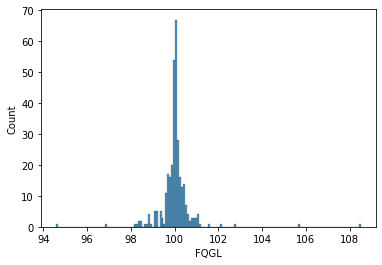

In [998]:
sea.histplot(data=d, x='FQGL')

In [999]:
d.groupby('CLI').count()

FURO   NA   DE  ATE  LENGTH  CLV  CLM  FEGL  SIGL  PGL  ALGL  MNGL  PFGL  \
CLI                                                                             
CE     47   47   47   47      47   47   47    47    47   47    47     0    47   
CQ      2    2    2    2       2    2    2     2     2    2     2     0     2   
HC     13   13   13   13      13   13   13    13    13   13    13     0    13   
HF    252  252  252  252     252  252  252   252   252  252   252     0   252   
HMN     7    7    7    7       7    7    7     7     7    7     7     0     7   
MD      1    1    1    1       1    1    1     1     1    1     1     0     1   

     TIGL  MGGL  CAGL  G1A  G1B  G2  G3  FE1A  SI1A  P1A  AL1A  MN1A  PF1A  \
CLI                                                                          
CE     47    47    47    1    1   1   1     1     1    1     1     1     1   
CQ      2     2     2    0    0   0   0     0     0    0     0     0     0   
HC     13    13    13    0    0   0   0     0     0    0     0     0     0   
HF    252   252   252    3    3   3   3     1     1    1     1     2     1   
HMN     7     7     7    0    0   0   0     0     0    0     0     0     0   
MD      1     1     1    0    0   0   0     0     0    0     0     0     0   

     TI1A  MG1A  CA1A  FE1B  SI1B  P1B  AL1B  MN1B  PF1B  TI1B  MG1B  CA1B  \
CLI                                                                          
CE      1     1     1     1     1    1     1     1     1     1     1     1   
CQ      0     0     0     0     0    0     0     0     0     0     0     0   
HC      0     0     0     0     0    0     0     0     0     0     0     0   
HF      1     1     1     3     3    3     3     2     3     3     3     3   
HMN     0     0     0     0     0    0     0     0     0     0     0     0   
MD      0     0     0     0     0    0     0     0     0     0     0     0   

     FE2  SI2  P2  AL2  MN2  PF2  TI2  MG2  CA2  FE3  SI3  P3  AL3  MN3  PF3  \
CLI                                                                            
CE     1    1   1    1    0    1    1    1    1    1    1   1    1    1    1   
CQ     0    0   0    0    0    0    0    0    0    0    0   0    0    0    0   
HC     0    0   0    0    0    0    0    0    0    0    0   0    0    0    0   
HF     3    3   3    3    1    3    3    3    3    3    3   3    3    3    3   
HMN    0    0   0    0    0    0    0    0    0    0    0   0    0    0    0   
MD     0    0   0    0    0    0    0    0    0    0    0   0    0    0    0   

     TI3  MG3  CA3  FQGL  FQ1A  FQ1B  FQ2  FQ3  FGRA  REC_P  FL_AN  FQ_GLA  \
CLI                                                                          
CE     1    1    1    47     1     1    1    1     1     46     47      47   
CQ     0    0    0     2     0     0    0    0     0      1      2       2   
HC     0    0    0    13     0     0    0    0     0     13     13      13   
HF     3    3    3   252     1     3    3    3     3    252    252     252   
HMN    0    0    0     7     0     0    0    0     0      7      7       7   
MD     0    0    0     1     0     0    0    0     0      1      1       1   

     STATUS  TAG  
CLI               
CE        0    0  
CQ        0    0  
HC        0    0  
HF        0    0  
HMN       0    0  
MD        0    0

In [1000]:
#decisão: aplicar médias po lito nas amostras com corredor FQGL ENTRE 98 E 102

In [1001]:
h = d.FQGL.between(98,102)
# obter índice inverso do anterior, prestar atenção no operador ~
nh = ~d.FQGL.between(98,102)

In [1002]:
h

2118      True
2120      True
2122      True
2123      True
2124      True
2125      True
2126      True
2127      True
2128      True
2129      True
2130      True
2131      True
2132      True
2133      True
2134      True
2135      True
2136      True
2137      True
2138      True
2139      True
2140      True
2141      True
2142      True
2159      True
2160      True
2161      True
2162      True
2163      True
2164      True
2165      True
2166      True
2167      True
2168      True
2171      True
2174      True
2181      True
2199      True
2200      True
2201      True
2202      True
2203      True
2204      True
2205      True
2206      True
2207      True
2210      True
2211      True
2212      True
2213      True
2214      True
2215      True
2216      True
2283      True
2284      True
2285      True
2286      True
2287      True
2288      True
2289      True
2290      True
2291      True
2299      True
2300      True
2302      True
2311      True
2312     False
2313     F

In [1003]:
j = i & h
nj = i & nh

In [1004]:
fac.loc[nj,:]

FURO            NA     DE    ATE  LENGTH      CLV CLM CLI   FEGL  \
2312   N5E-0095  N5E-0095-003  10.00  15.00     5.0   HMA/CM  HF  HF  67.20   
2313   N5E-0095  N5E-0095-004  15.00  20.00     5.0      HMA  HF  HF  67.73   
2315   N5E-0095  N5E-0095-006  25.00  30.00     5.0    HMAMN  HF  HF  68.98   
2465   N5E-0122  N5E-0122-005  18.95  28.35     9.4   HMA/HD  HF  HF  67.66   
2502   N5E-0129  N5E-0129-006  21.00  25.00     4.0  HMAMNSI  HF  HF  61.18   
16222  N5W-0091  N5W-0091-002   5.00  10.00     5.0   CQ/CQD  CQ  CQ  40.53   

       SIGL    PGL   ALGL  MNGL   PFGL  TIGL  MGGL   CAGL  G1A  G1B  G2  G3  \
2312   0.49  0.120   1.14   NaN   7.42  0.20  0.02  0.007  NaN  NaN NaN NaN   
2313   0.42  0.070   1.12   NaN   3.99  0.12  0.02  0.007  NaN  NaN NaN NaN   
2315   0.56  0.030   0.57   NaN   8.60  0.03  0.02  0.010  NaN  NaN NaN NaN   
2465   0.45  0.110   0.84   NaN   3.73  0.04  0.02  0.008  NaN  NaN NaN NaN   
2502   8.41  0.009   0.50   NaN   0.35  0.01  0.03  0.020  NaN  NaN NaN NaN   
16222  1.93  0.190  17.98   NaN  14.88  1.38  0.03  0.001  NaN  NaN NaN NaN   

       FE1A  SI1A  P1A  AL1A  MN1A  PF1A  TI1A  MG1A  CA1A  FE1B  SI1B  P1B  \
2312    NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
2313    NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
2315    NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
2465    NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
2502    NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
16222   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   

       AL1B  MN1B  PF1B  TI1B  MG1B  CA1B  FE2  SI2  P2  AL2  MN2  PF2  TI2  \
2312    NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   
2313    NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   
2315    NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   
2465    NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   
2502    NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   
16222   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   

       MG2  CA2  FE3  SI3  P3  AL3  MN3  PF3  TI3  MG3  CA3    FQGL  FQ1A  \
2312   NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  105.66   NaN   
2313   NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  102.71   NaN   
2315   NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  108.50   NaN   
2465   NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  102.11   NaN   
2502   NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN   96.84   NaN   
16222  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN   94.59   NaN   

       FQ1B  FQ2  FQ3  FGRA   REC_P           FL_AN  FQ_GLA STATUS  TAG  
2312    NaN  NaN  NaN   NaN   98.00  infolab_global  105.66    NaN  NaN  
2313    NaN  NaN  NaN   NaN  100.00  infolab_global  102.71    NaN  NaN  
2315    NaN  NaN  NaN   NaN   99.62  infolab_global  108.50    NaN  NaN  
2465    NaN  NaN  NaN   NaN   50.83  infolab_global  102.11    NaN  NaN  
2502    NaN  NaN  NaN   NaN   93.05  infolab_global   96.84    NaN  NaN  
16222   NaN  NaN  NaN   NaN   91.04  infolab_global   94.59    NaN  NaN

In [1005]:
# limpando heterotópicas fora do corredor

In [1006]:
fac = cleanup_gl_grq(fac, nj)

In [1007]:
#f = d.loc[h,:]

In [1008]:
# aplicando médias por lito e código de rastreabilidade

In [1009]:
fac.loc[j, 'TAG'] = '8_3'

In [1010]:
fac.loc[j, 'MNGL'] = fac[j].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'MNGL', 'wavg'), axis =1)

In [1011]:
#x.to_csv('verificar_dupla_condição.csv')

In [1012]:
#fac.loc[j, :] 

###### interceptando 126 amostras sem pfgl

In [1013]:
i = (df_gl['GL_COUNT'] == 8) & (df_gl['PFGL'].isna()) 

In [1014]:
d=fac.loc[i, :]

<AxesSubplot:xlabel='FQGL', ylabel='Count'>

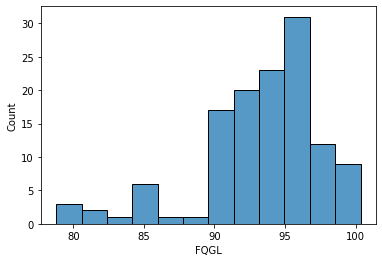

In [1015]:
sea.histplot(data=d, x='FQGL')

In [1016]:
#d.to_csv('sem_pfgl.csv')

In [1017]:
# a ausência de  pfgl realmente deixa uma lacuna grande nos fechamentos
# decisão limpar todos os parâmetros para essas 126 amostras

In [1018]:
fac.loc[i, 'TAG']='8_4'

In [1019]:
fac = cleanup_gl_grq(fac, i)

In [1020]:
#k = fac['TAG'] == '8_4'
#fac.loc[k,:]

###### interceptando 337 sem titânio

In [1021]:
i = (df_gl['GL_COUNT'] == 8) & (df_gl['TIGL'].isna()) 

In [1022]:
d=fac.loc[i, :]

<AxesSubplot:xlabel='FQGL', ylabel='Count'>

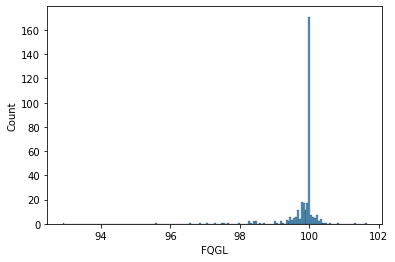

In [1023]:
sea.histplot(data=d, x='FQGL')

In [1024]:
# decisão: preencher com médias por lito

In [1025]:
fac.loc[i, 'TAG']='8_5'

In [1026]:
fac.loc[i, 'TIGL'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'TIGL', 'wavg'), axis =1)

###### interceptando 160 sem magnesio

In [1]:
i = (df_gl['GL_COUNT'] == 8) & (df_gl['MGGL'].isna()) 

NameError: name 'df_gl' is not defined

In [1028]:
d=fac.loc[i, :]

<AxesSubplot:xlabel='FQGL', ylabel='Count'>

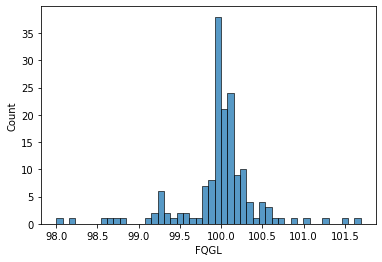

In [1029]:
sea.histplot(data=d, x='FQGL')

In [1030]:
# decisão: preencher com médias por lito

In [1031]:
fac.loc[i, 'TAG']='8_6'

In [1032]:
fac.loc[i, 'MGGL'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'MGGL', 'wavg'), axis =1)

In [1033]:
#k = fac['TAG'] == '8_6'
#fac.loc[k,:].to_csv('sem_mggl.csv')

###### interceptando 99 sem cagl

In [1034]:
i = (df_gl['GL_COUNT'] == 8) & (df_gl['CAGL'].isna()) 

In [1035]:
d=fac.loc[i, :]#.to_csv('sem_cagl.csv')

<AxesSubplot:xlabel='FQGL', ylabel='Count'>

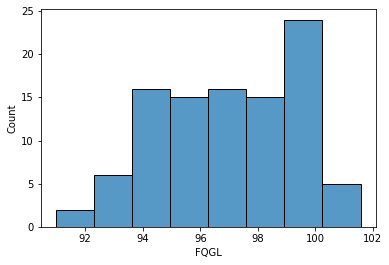

In [1036]:
sea.histplot(data=d, x='FQGL')

In [1037]:
# frequentes amostras de cq e com fechamentos ruins ...
# com certeza não é a ausência de cálcio que causa essa anomalia...
# decisão aplicar médias por lito no corredor 98 - 102

In [1038]:
j = fac['FQGL'].between(98, 102)
nj = ~fac['FQGL'].between(98, 102)

In [1039]:
k = i & j
nk = i & nj

In [1040]:
fac.loc[k, 'TAG']='8_7'

In [1041]:
fac.loc[k, 'CAGL'] = fac[k].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'CAGL', 'wavg'), axis =1)

In [1042]:
# limpar as que estão fora do corredor

In [1043]:
fac = cleanup_gl_grq(fac, nk)

###### próximo passo: trabalhando as amostras com  6 valores no batch global

###### interceptando 1 amostra sem fósforo e sem pf

In [1044]:
i = (df_gl['GL_COUNT'] == 6) & (df_gl['PGL'].isna()) 

In [1045]:
fac.loc[i,:]

FURO            NA    DE   ATE  LENGTH CLV CLM CLI   FEGL   SIGL  \
3245  N5E-0214  N5E-0214-013  67.2  71.0     3.8  JP  JP  JP  50.07  20.33   

      PGL  ALGL  MNGL  PFGL  TIGL  MGGL   CAGL  G1A  G1B  G2  G3  FE1A  SI1A  \
3245  NaN  0.31  0.01   NaN   NaN  0.02  0.009  NaN  NaN NaN NaN   NaN   NaN   

      P1A  AL1A  MN1A  PF1A  TI1A  MG1A  CA1A  FE1B  SI1B  P1B  AL1B  MN1B  \
3245  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   

      PF1B  TI1B  MG1B  CA1B  FE2  SI2  P2  AL2  MN2  PF2  TI2  MG2  CA2  FE3  \
3245   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

      SI3  P3  AL3  MN3  PF3  TI3  MG3  CA3   FQGL  FQ1A  FQ1B  FQ2  FQ3  \
3245  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  92.27   NaN   NaN  NaN  NaN   

      FGRA  REC_P           FL_AN  FQ_GLA STATUS  TAG  
3245   NaN  97.36  infolab_global   92.27    NaN  NaN

In [1046]:
#decisão fácil: limpar registro por que tem alguma coisa muito errada aí...

In [1047]:
fac.loc[i, 'TAG']='6_1'

In [1048]:
fac = cleanup_gl_grq(fac, i)

In [1049]:
fac.loc[i,:]

FURO            NA    DE   ATE  LENGTH CLV CLM CLI  FEGL  SIGL  PGL  \
3245  N5E-0214  N5E-0214-013  67.2  71.0     3.8  JP  JP  JP   NaN   NaN  NaN   

      ALGL  MNGL  PFGL  TIGL  MGGL  CAGL  G1A  G1B  G2  G3  FE1A  SI1A  P1A  \
3245   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   NaN   NaN  NaN   

      AL1A  MN1A  PF1A  TI1A  MG1A  CA1A  FE1B  SI1B  P1B  AL1B  MN1B  PF1B  \
3245   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   

      TI1B  MG1B  CA1B  FE2  SI2  P2  AL2  MN2  PF2  TI2  MG2  CA2  FE3  SI3  \
3245   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

      P3  AL3  MN3  PF3  TI3  MG3  CA3  FQGL  FQ1A  FQ1B  FQ2  FQ3  FGRA  \
3245 NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN   NaN   

      REC_P           FL_AN  FQ_GLA STATUS  TAG  
3245  97.36  infolab_global   92.27    NaN  6_1

###### interceptando 1532 amostras sem menores

In [1050]:
i = (df_gl['GL_COUNT'] == 6) 

In [1051]:
#fac.loc[i,:].to_csv('com_6_valores.csv')

In [1052]:
d=fac.loc[i, :]

<AxesSubplot:xlabel='FQGL', ylabel='Count'>

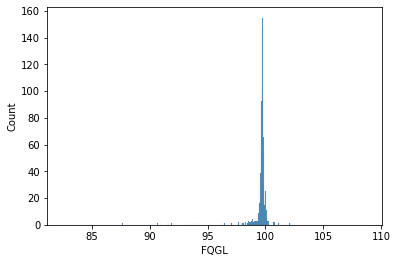

In [1053]:
sea.histplot(data=d, x='FQGL')

In [1054]:
j = fac['FQGL'].between(98,102)
nj = ~fac['FQGL'].between(98,102)

In [1055]:
k= i & j
nk = i & nj

In [1056]:
e = fac.loc[k,:]

In [1057]:
e.shape

(1472, 68)

In [1058]:
e.groupby('CLI').FQGL.describe()

count       mean       std    min      25%     50%       75%     max
CLI                                                                       
CE    176.0  99.923807  0.339596  98.24  99.7875  99.890  100.0025  101.76
CQ     12.0  99.820833  0.200928  99.28  99.7625  99.855   99.9325  100.03
HC     65.0  99.706000  0.215115  98.70  99.6300  99.700   99.7700  100.70
HF   1159.0  99.677420  0.239164  98.10  99.6300  99.710   99.7800  100.80
HMN     5.0  98.612000  0.785602  98.02  98.2800  98.330   98.4400   99.99
JP     31.0  99.531613  0.425363  98.54  99.4750  99.700   99.7800  100.16
MD     23.0  99.551304  0.388591  98.31  99.5700  99.690   99.7750   99.95
MS      1.0  99.640000       NaN  99.64  99.6400  99.640   99.6400   99.64

In [1059]:
# dos 1532, é possível recuperar 1472 amostras sem prejuízo
# decisão: aplicar  médias por lito nas amostras com fechamento entre 98 e 102

In [1060]:
fac.loc[k, 'TAG']='6_2'

In [1061]:
# TI

In [1062]:
fac.loc[k, 'TIGL'] = fac[k].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'TIGL', 'wavg'), axis =1)

In [1063]:
# MG

In [1064]:
fac.loc[k, 'MGGL'] = fac[k].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'MGGL', 'wavg'), axis =1)

In [1065]:
#CA

In [1066]:
fac.loc[k, 'CAGL'] = fac[k].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'CAGL', 'wavg'), axis =1)

In [1067]:
# limpar as que estão nesse nível de heterotopia, mas estão fora do corredor

In [1068]:
fac = cleanup_gl_grq(fac, nk)

###### próximo passo: trabalhando as amostras com  4 valores no batch global

In [1069]:
# como visto no bloco de EDA, há uma quantidade expressiva de amostras onde é possível a recuperação

In [1070]:
i = (df_gl['GL_COUNT'] == 4) 

In [1071]:
j = fac['CLI'].isin(['CE', 'HC', 'HF'])
nj = ~fac['CLI'].isin(['CE', 'HC', 'HF'])

In [1072]:
k = fac['FQGL'].between(96, 102)
nk = ~fac['FQGL'].between(96, 102)

In [1073]:
l = i & j & k
nl = (i & j & nk)
nl2 = i & nj

In [1074]:
df_quatro = fac.loc[l, :]


In [1075]:
df_quatro.groupby('CLI').count()

FURO    NA    DE   ATE  LENGTH   CLV   CLM  FEGL  SIGL   PGL  ALGL  MNGL  \
CLI                                                                             
CE    184   184   184   184     184   184   184   184     0   184     0   184   
HC    155   155   155   155     155   155   155   155     0   155     0   155   
HF   1579  1579  1579  1579    1579  1579  1579  1579     0  1579     0  1579   

     PFGL  TIGL  MGGL  CAGL   G1A   G1B    G2    G3  FE1A  SI1A  P1A  AL1A  \
CLI                                                                          
CE    184     0     0     0   184   184   184   184   183   183  183   183   
HC    155     0     0     0   155   155   155   155   155   155  155   155   
HF   1579     0     0     0  1579  1579  1579  1579   944   944  944   944   

     MN1A  PF1A  TI1A  MG1A  CA1A  FE1B  SI1B   P1B  AL1B  MN1B  PF1B  TI1B  \
CLI                                                                           
CE    184   183   182   183   183   182   182   182   182   182   182   181   
HC    155   155   154   155   155   153   153   153   153   153   153   152   
HF   1502   944   941   942   942  1500  1500  1500  1500  1500  1500  1497   

     MG1B  CA1B   FE2   SI2    P2   AL2   MN2   PF2   TI2   MG2   CA2   FE3  \
CLI                                                                           
CE    182   182   182   182   182   182   182   182   181   182   182   181   
HC    153   153   152   152   152   152   152   152   151   152   152   150   
HF   1498  1498  1579  1579  1579  1579  1579  1579  1576  1577  1577  1575   

      SI3    P3   AL3   MN3   PF3   TI3   MG3   CA3  FQGL  FQ1A  FQ1B   FQ2  \
CLI                                                                           
CE    181   181   181   181   181   180   181   181   184   183   182   182   
HC    150   150   150   150   150   149   150   150   155   155   153   152   
HF   1575  1575  1575  1575  1575  1573  1574  1574  1579   944  1500  1579   

      FQ3  FGRA  REC_P  FL_AN  FQ_GLA  STATUS  TAG  
CLI                                                 
CE    181   184    139    184       0       2    0  
HC    150   155     81    155       0       4    0  
HF   1575  1579   1417   1579       0      22    0

In [1076]:
#df_quatro.to_csv('com_4_valores_ce_hc_hf.csv')

In [1077]:
# nesse padrão ficam faltando sílica, alumina e menores...
# decisão aplicar médias por lito e verificar eventuais estouros, já que a quantidade de analitos a preencher é importante
# na CE, vai embutir cerca de 3.8% ... algumas sairão posteriormente nos estouros de fechamento

In [1078]:
 stats_from_table('SN5_basic_stats_table_GL.xlsx', 'CE', 'SIGL', 'wavg')

0.7513565224761906

In [1079]:
 stats_from_table('SN5_basic_stats_table_GL.xlsx', 'CE', 'ALGL', 'wavg')

2.666887763234146

In [1080]:
 stats_from_table('SN5_basic_stats_table_GL.xlsx', 'CE', 'TIGL', 'wavg')

0.3576981643762535

In [1081]:
 stats_from_table('SN5_basic_stats_table_GL.xlsx', 'CE', 'MGGL', 'wavg')

0.02816471774271497

In [1082]:
 stats_from_table('SN5_basic_stats_table_GL.xlsx', 'CE', 'CAGL', 'wavg')

0.009830736200567907

In [1083]:
0.7513565224761906 + 2.666887763234146 + 0.3576981643762535 + 0.02816471774271497 + 0.009830736200567907

3.8139379040298733

In [1084]:
 stats_from_table('SN5_basic_stats_table_GL.xlsx', 'HC', 'SIGL', 'wavg')

1.42546778213179

In [1085]:
 stats_from_table('SN5_basic_stats_table_GL.xlsx', 'HC', 'ALGL', 'wavg')

1.426903108655375

In [1086]:
 stats_from_table('SN5_basic_stats_table_GL.xlsx', 'HC', 'TIGL', 'wavg')

0.05970084445712163

In [1087]:
 stats_from_table('SN5_basic_stats_table_GL.xlsx', 'HC', 'MGGL', 'wavg')

0.06319314420199022

In [1088]:
 stats_from_table('SN5_basic_stats_table_GL.xlsx', 'HC', 'CAGL', 'wavg')

0.02206074656835204

In [1089]:
1.42546778213179 + 1.426903108655375 + 0.05970084445712163 + 0.06319314420199022 + 0.02206074656835204

2.997325626014629

In [1090]:
 stats_from_table('SN5_basic_stats_table_GL.xlsx', 'HF', 'SIGL', 'wavg')

1.383125728973031

In [1091]:
 stats_from_table('SN5_basic_stats_table_GL.xlsx', 'HF', 'ALGL', 'wavg')

0.8855845186332196

In [1092]:
 stats_from_table('SN5_basic_stats_table_GL.xlsx', 'HF', 'TIGL', 'wavg')

0.05409786396052259

In [1093]:
 stats_from_table('SN5_basic_stats_table_GL.xlsx', 'HF', 'MGGL', 'wavg')

0.02711174733318714

In [1094]:
 stats_from_table('SN5_basic_stats_table_GL.xlsx', 'HF', 'CAGL', 'wavg')

0.01237407707981401

In [1095]:
1.383125728973031 + 0.8855845186332196 + 0.05409786396052259 + 0.02711174733318714 + 0.01237407707981401

2.3622939359797743

In [1096]:
fac.loc[l, 'TAG']='4_1'

In [1097]:
fac.loc[l, 'SIGL'] = fac[l].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'SIGL', 'wavg'), axis =1)

In [1098]:
fac.loc[l, 'ALGL'] = fac[l].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'ALGL', 'wavg'), axis =1)

In [1099]:
fac.loc[l, 'TIGL'] = fac[l].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'TIGL', 'wavg'), axis =1)

In [1100]:
fac.loc[l, 'MGGL'] = fac[l].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'MGGL', 'wavg'), axis =1)

In [1101]:
fac.loc[l, 'CAGL'] = fac[l].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'CAGL', 'wavg'), axis =1)

In [1102]:
# verificar fechamentos já que o preenchimento foi em muitas colunas

In [1103]:
fac.loc[l, 'NFQGL'] = fac[l].apply(lambda x: fq(x.FEGL, x.SIGL, x.PGL, x.ALGL, x.MNGL, x.PFGL, x.TIGL, x.MGGL, x.CAGL), axis =1)

In [1104]:
fac.loc[1590,:]

FURO          FRN5W-0350
NA        FRN5W-0350-001
DE                  28.8
ATE                 36.4
LENGTH               7.6
CLV                   HF
CLM                   HF
CLI                   HF
FEGL               58.93
SIGL            1.383126
PGL                 0.14
ALGL            0.885585
MNGL                0.33
PFGL                6.37
TIGL            0.054098
MGGL            0.027112
CAGL            0.012374
G1A                18.95
G1B                20.93
G2                 60.12
G3                   0.0
FE1A               59.27
SI1A                0.61
P1A                 0.16
AL1A                7.07
MN1A                0.28
PF1A                6.41
TI1A                 NaN
MG1A                 NaN
CA1A                 NaN
FE1B               55.76
SI1B                0.67
P1B                 0.16
AL1B                9.86
MN1B                0.37
PF1B                 8.1
TI1B                 NaN
MG1B                 NaN
CA1B                 NaN
FE2                59.93


In [1105]:
# limpar o excludente da lista

In [1106]:
fac = cleanup_gl_grq(fac, nl)
fac = cleanup_gl_grq(fac, nl2)

In [1107]:
df=fac.loc[l,['CLI', 'FQGL', 'NFQGL']]

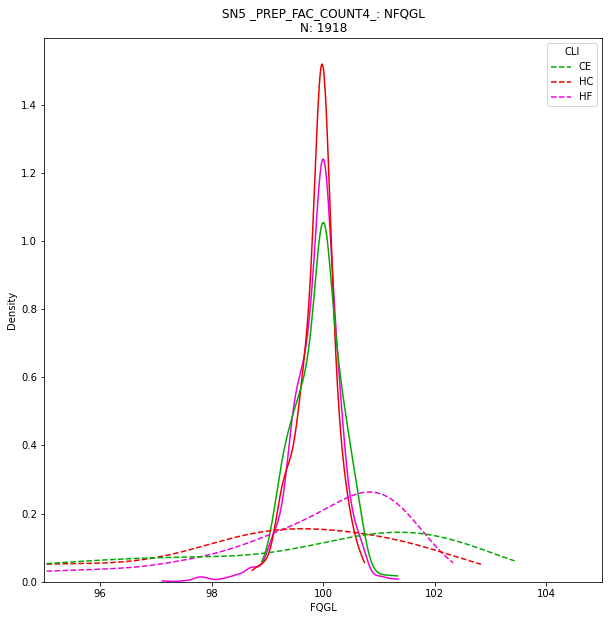

In [1108]:
fig, ax = plt.subplots(figsize=chart_size)

grade = 'NFQGL'

kde=sea.kdeplot(data=df, x='FQGL', hue="CLI", common_norm=False, palette=litocolor, alpha=.5, cut=0)
kde=sea.kdeplot(data=df, x=grade, hue="CLI", common_norm=False, palette=litocolor, alpha=.5, cut=0, ls='--')

plt.xlim(95, 105)

kde.set_title(proj + ' _PREP_FAC_COUNT4_: '+ grade + '\nN: ' + str(df[grade].count()))
#fig.savefig(proj + '_' + grade + '_SAMPLES WITHOUT SIGL.jpeg', transparent=None)
plt.show()

In [1109]:
m = (fac['NFQGL']<96) | (fac['NFQGL']>102)

In [1110]:
fac.loc[m,:].shape

(322, 69)

In [1111]:
fac.groupby('CLI').NFQGL.describe()


count       mean       std        min        25%         50%  \
CLI                                                                  
AT      0.0        NaN       NaN        NaN        NaN         NaN   
CE    184.0  98.849902  3.382549  88.613518  96.679522  100.050060   
CGL     0.0        NaN       NaN        NaN        NaN         NaN   
CQ      0.0        NaN       NaN        NaN        NaN         NaN   
DT      0.0        NaN       NaN        NaN        NaN         NaN   
FMN     0.0        NaN       NaN        NaN        NaN         NaN   
HC    155.0  98.514219  2.922282  87.692845  97.212989   99.118964   
HF   1579.0  99.130412  2.630057  86.076686  98.287112   99.995968   
HMN     0.0        NaN       NaN        NaN        NaN         NaN   
JP      0.0        NaN       NaN        NaN        NaN         NaN   
MD      0.0        NaN       NaN        NaN        NaN         NaN   
MS      0.0        NaN       NaN        NaN        NaN         NaN   
MSD     0.0        NaN       NaN        NaN        NaN         NaN   
SR      0.0        NaN       NaN        NaN        NaN         NaN   

            75%         max  
CLI                          
AT          NaN         NaN  
CE   101.666687  103.430894  
CGL         NaN         NaN  
CQ          NaN         NaN  
DT          NaN         NaN  
FMN         NaN         NaN  
HC   100.651253  102.827532  
HF   100.977084  102.329737  
HMN         NaN         NaN  
JP          NaN         NaN  
MD          NaN         NaN  
MS          NaN         NaN  
MSD         NaN         NaN  
SR          NaN         NaN

In [1112]:
# 322 amostras com estouro dor do corredor após preenchimento
# decisão: limpar apenas estas

In [1113]:
fac.loc[m,:].to_csv('com_4_valores_corrigido.csv')

In [1114]:
n = l & m

In [1115]:
fac = cleanup_gl_grq(fac, n)

In [1116]:
fac.loc[n,:]

FURO                NA      DE     ATE  LENGTH    CLV  CLM CLI  \
0       FRN5E-0092    FRN5E-0092-001    0.00   12.60   12.60     CM   CE  CE   
6       FRN5E-0093     FRN5E-0093 01    0.00    7.50    7.50     HD   HC  CE   
7       FRN5E-0093     FRN5E-0093 02    7.50   15.60    8.10     HD   HC  CE   
19      FRN5E-0095    FRN5E-0095-001    0.00    7.50    7.50     CM   CE  CE   
28      FRN5E-0096    FRN5E-0096-002    7.50   19.50   12.00     CM   CE  CE   
32      FRN5E-0097     FRN5E-0097 01    0.00    7.50    7.50     HD   HC  CE   
39      FRN5E-0098    FRN5E-0098-001    0.00    6.85    6.85     CM   CE  CE   
44      FRN5E-0099    FRN5E-0099-001    0.00    6.00    6.00     CM   CE  CE   
45      FRN5E-0099    FRN5E-0099-002    6.00   11.45    5.45     HM   HC  CE   
52      FRN5E-0100    FRN5E-0100-001    0.00   10.50   10.50     HM   HC  CE   
84      FRN5E-0104     FRN5E-0104 03   15.00   22.35    7.35     HM   HC  CE   
385     FRN5W-0010     FRN5W-0010 01    5.30   11.50    6.20     HM   HF  HF   
399     FRN5W-0016    FRN5W-0016-001    0.00    8.90    8.90     HM   HF  HF   
436     FRN5W-0029    FRN5W-0029-001    0.00    2.88    2.88     HM   HM  HF   
453     FRN5W-0035    FRN5W-0035-001    0.00   15.00   15.00  HM/HD   HC  HC   
468     FRN5W-0040     FRN5W-0040 01    0.00   15.00   15.00     HM   HF  HF   
470     FRN5W-0040     FRN5W-0040 03   30.00   45.00   15.00     HM   HF  HF   
554     FRN5W-0062    FRN5W-0062-001    0.00   12.30   12.30    MBT  MBT  HC   
576     FRN5W-0107     FRN5W-0107 02    6.20   12.70    6.50     HD   HC  CE   
577     FRN5W-0107     FRN5W-0107 03   12.70   19.20    6.50     HD   HC  CE   
627     FRN5W-0114     FRN5W-0114 01    0.00    5.40    5.40     CM   CE  CE   
634     FRN5W-0115     FRN5W-0115 01    0.00    9.70    9.70     CM   CE  CE   
635     FRN5W-0115     FRN5W-0115 02    9.70   15.50    5.80     HM   HC  CE   
642     FRN5W-0116     FRN5W-0116 03    8.50   13.75    5.25     HM   HC  CE   
648     FRN5W-0117     FRN5W-0117 02    5.45   10.00    4.55     HM   HC  CE   
654     FRN5W-0118     FRN5W-0118 01    0.00    4.50    4.50     CM   CE  CE   
655     FRN5W-0118     FRN5W-0118 02    4.50   13.40    8.90     HM   HC  CE   
661     FRN5W-0119     FRN5W-0119 01    0.00    7.60    7.60     CM   CE  CE   
1590    FRN5W-0350    FRN5W-0350-001   28.80   36.40    7.60     HF   HF  HF   
14660  N5S-FH01086   N5S-FH01086-009  113.45  123.45   10.00     HF   HF  HF   
14740  N5S-FH01104   N5S-FH01104-013  140.50  145.15    4.65    JPS   HC  HC   
14765  N5S-FH01107   N5S-FH01107-017  218.40  227.45    9.05     HF   JP  HC   
14842  N5S-FH01431   N5S-FH01431-015  157.10  170.70   13.60     HF   HF  HF   
15107  N5S-FR01320   N5S-FR01320-002    9.80   19.50    9.70     CM   CE  CE   
15245  N5S-FR01355   N5S-FR01355-002    0.24    5.11    4.87     HF   HF  HF   
15295  N5S-FR01428   N5S-FR01428-003   29.35   43.55   14.20     HF   HF  HF   
15313  N5S-FR01437   N5S-FR01437-005   38.50   46.00    7.50     HF   HF  HF   
15321  N5S-FR01438   N5S-FR01438-001    0.00   13.15   13.15     CM   CE  CE   
15350  N5S-FR01443   N5S-FR01443-002   10.60   20.70   10.10     CM   CE  CE   
15351  N5S-FR01443   N5S-FR01443-003   20.70   30.30    9.60     CM   CE  CE   
15367  N5S-FR01447   N5S-FR01447-002   14.90   29.75   14.85     HF   HF  HF   
15399  N5S-FR01457   N5S-FR01457-006   92.90  100.00    7.10     HF   HF  HC   
15525  N5S-FR01496   N5S-FR01496-005   48.90   63.50   14.60     HF   HF  HF   
19977     N5W-1025      N5W-1025-002   10.50   21.10   10.60     HC   HC  HC   
20411  N5W-FD01089   N5W-FD01089-004  124.68  138.00   13.32     HF   HF  HF   
20447  N5W-FD01098   N5W-FD01098-001    0.00   15.00   15.00     CM   CE  CE   
20946  N5W-FD01415   N5W-FD01415-004  105.95  116.00   10.05     HF   HF  HF   
21702  N5W-FH01079   N5W-FH01079-005   56.83   65.88    9.05     HC   HC  HC   
21711  N5W-FH01109   N5W-FH01109-001    5.60   20.40   14.80     HC   JP  HC   
21712  N5W-FH0

###### LIMPANDO OS REGISTROS COM 2, 3, 5 E 7 VALORES

In [1117]:
i = (df_gl['GL_COUNT'].isin([2,3,5,7]))

In [1118]:
fac.loc[i,:]

FURO               NA      DE     ATE  LENGTH      CLV  CLM  \
129     FRN5E-0133   FRN5E-0133-003   17.00   25.50    8.50       HM   HF   
1596    FRN5W-0351   FRN5W-0351-003   31.35   48.24   16.89       HC   HF   
2709      N5E-0157     N5E-0157-001    0.00    5.00    5.00       CM   CQ   
2712      N5E-0157     N5E-0157-004   15.00   20.00    5.00     HMLA   JP   
2744      N5E-0159     N5E-0159-010   41.85   46.50    4.65      MBT  MBT   
2754      N5E-0161     N5E-0161-004   16.85   21.00    4.15       CM   CE   
2755      N5E-0161     N5E-0161-005   21.00   25.20    4.20       CM   CE   
2756      N5E-0161     N5E-0161-006   25.20   29.40    4.20       CM   CE   
2757      N5E-0161     N5E-0161-007   29.40   34.00    4.60      MBT  MBT   
2758      N5E-0161     N5E-0161-008   34.00   38.65    4.65      MBT  MBT   
2759      N5E-0161     N5E-0161-009   38.65   43.30    4.65      MBT  MBT   
2871      N5E-0173     N5E-0173-001    0.00    4.40    4.40       CM   CE   
2883      N5E-0174     N5E-0174-003   10.00   15.00    5.00       HM   HF   
2884      N5E-0174     N5E-0174-004   15.00   20.00    5.00       HM   HF   
2893      N5E-0174     N5E-0174-013   60.00   65.00    5.00       HM   HF   
3008      N5E-0195     N5E-0195-012   53.00   57.50    4.50       JP   JP   
3138      N5E-0205     N5E-0205-002    5.70   11.40    5.70   CM(HM)   CQ   
3254      N5E-0215     N5E-0215-003   11.40   17.75    6.35      MBT  MBT   
3257      N5E-0215     N5E-0215-006   30.40   36.70    6.30      MBT  MBT   
3290      N5E-0218     N5E-0218-002    6.65   13.30    6.65       CQ   CE   
3319      N5E-0220     N5E-0220-013   64.25   70.25    6.00     HMSI   HF   
3321      N5E-0220     N5E-0220-015   75.50   80.75    5.25       JP   JP   
3322      N5E-0220     N5E-0220-016   80.75   86.00    5.25       JP   JP   
3370      N5E-0223     N5E-0223-001    0.00    6.40    6.40       CQ   CQ   
3374      N5E-0223     N5E-0223-005   25.00   30.40    5.40    SO/MD   MD   
3397      N5E-0224     N5E-0224-008   38.10   44.00    5.90       JP   JP   
3398      N5E-0224     N5E-0224-009   44.00   50.00    6.00       JP   JP   
3399      N5E-0224     N5E-0224-010   50.00   56.00    6.00       JP   JP   
3413      N5E-0225     N5E-0225-003   12.00   18.00    6.00     HBLA   CQ   
3414      N5E-0225     N5E-0225-004   18.00   24.00    6.00     HBLA   CQ   
3615      N5E-0279     N5E-0279-010   50.75   56.55    5.80       JP   JP   
3616      N5E-0279     N5E-0279-011   56.55   62.35    5.80       JP   JP   
3617      N5E-0279     N5E-0279-012   62.35   68.15    5.80       JP   JP   
3618      N5E-0279     N5E-0279-013   68.15   74.00    5.85       JP   JP   
3642      N5E-0281     N5E-0281-006   29.45   34.90    5.45       JP   JP   
3643      N5E-0281     N5E-0281-007   34.90   40.35    5.45       JP   JP   
3644      N5E-0281     N5E-0281-008   40.35   45.80    5.45       JP   JP   
3645      N5E-0281     N5E-0281-009   45.80   51.20    5.40       JP   JP   
3695      N5E-0284     N5E-0284-005   22.50   30.70    8.20       JP   JP   
3697      N5E-0284     N5E-0284-007   36.35   38.30    1.95       JP   JP   
3701      N5E-0284     N5E-0284-011   58.05   60.30    2.25       JP   JP   
3787      N5E-0293     N5E-0293-004   15.75   21.75    6.00       JP   JP   
3788      N5E-0293     N5E-0293-005   21.75   28.53    6.78       JP   JP   
3798      N5E-0294     N5E-0294-004   32.25   36.50    4.25       JP   JP   
3994      N5E-0307     N5E-0307-001    0.00    7.41    7.41      MBT  MBT   
4335      N5E-0328     N5E-0328-006   31.05   37.20    6.15       JP   JP   
7869      N5E-0930     N5E-0930-001    0.00    8.08    8.08       HM   HF   
7870      N5E-0930     N5E-0930-002    8.08   16.16    8.08       HM   HF   
8022      N5E-1004     N5E-1004-006   97.30  112.00   14.70       HF   HF   
8730      N5S-0019     N5S-0019-068  148.59  150.29    1.70       ID   JP   
8791      N5S-0021     N5S-0021-002    1.74    5.23    3.49       CQ   CQ   
8911      

In [1119]:
fac = cleanup_gl_grq(fac, i)

###### VERIFICANDO TODOS OS RESULTADOS ANTERIORES

In [1120]:
GL

['FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL']

In [1121]:
df = fac.loc[:, GL]

total = df.count()

total

FEGL    17058
SIGL    17058
PGL     17058
ALGL    17058
MNGL    17058
PFGL    17058
TIGL    17058
MGGL    17058
CAGL    17058
dtype: int64

In [1122]:
fac.to_csv('primeiroteste.csv')

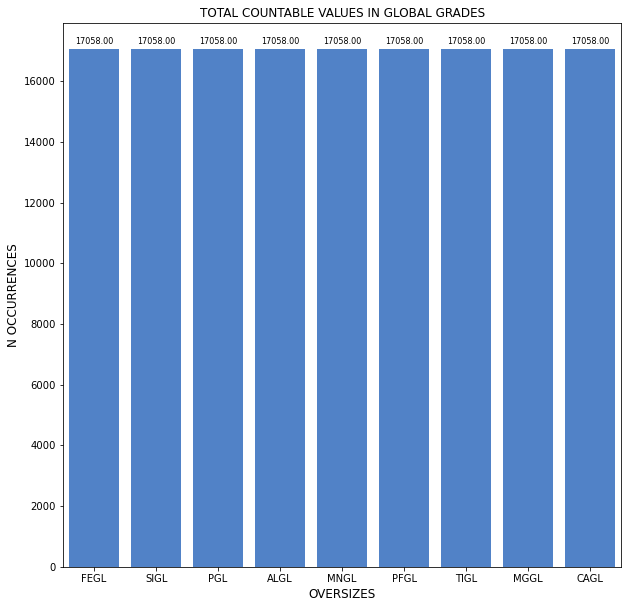

In [1123]:
fig=plt.figure(figsize=chart_size)

plots=sea.barplot(x=total.index, y=total.values, color=valecolor['AZUL'])

# ITERATING OVER THE THE BARS
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.title('TOTAL COUNTABLE VALUES IN GLOBAL GRADES')
plt.ylabel('N OCCURRENCES', fontsize=12)
plt.xlabel('OVERSIZES', fontsize=12)

plt.show()

fig.savefig(proj + '_GS_COUNTABLE_VALUES_ISO.jpeg', transparent=None)

In [1124]:
fac.loc[1590,:]

FURO          FRN5W-0350
NA        FRN5W-0350-001
DE                  28.8
ATE                 36.4
LENGTH               7.6
CLV                   HF
CLM                   HF
CLI                   HF
FEGL                 NaN
SIGL                 NaN
PGL                  NaN
ALGL                 NaN
MNGL                 NaN
PFGL                 NaN
TIGL                 NaN
MGGL                 NaN
CAGL                 NaN
G1A                  NaN
G1B                  NaN
G2                   NaN
G3                   NaN
FE1A                 NaN
SI1A                 NaN
P1A                  NaN
AL1A                 NaN
MN1A                 NaN
PF1A                 NaN
TI1A                 NaN
MG1A                 NaN
CA1A                 NaN
FE1B                 NaN
SI1B                 NaN
P1B                  NaN
AL1B                 NaN
MN1B                 NaN
PF1B                 NaN
TI1B                 NaN
MG1B                 NaN
CA1B                 NaN
FE2                  NaN


In [1125]:
# percebeu-se falha dos cálculos de fechamento no gdms como na amostra acima

## REGULARIZAÇÃO DO BATCH GRANULOQUÍMICO

## G1A - 19 MM

###### Corrigindo uma falha na estrutura de dados nessa fração, os valores do mn da 8mm (1b) foram passados para esta coluna nos registros onde o retido da 19 mm era zero (não era para haver valores nessa coluna)

In [1126]:
i = (fac['G1A'] == 0) & (fac['MN1A'].notna())

In [1127]:
fac.loc[i,'MN1A'] = np.nan

In [1128]:
df_g1a = fac.loc[:,set_g1a]

In [1129]:
df_g1a.head()

G1A   FE1A  SI1A   P1A  AL1A  MN1A  PF1A  TI1A   MG1A   CA1A
0    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN
1  71.79  66.96  0.31  0.11  0.65  0.02  2.77  0.07  0.002  0.002
2  55.53  67.09  0.27  0.08  0.68  0.03  2.23  0.09  0.002  0.004
3  60.94  65.91  0.36  0.11  1.25  0.03  3.42  0.11  0.003  0.004
4    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN

In [1130]:
df_g1a.describe()

G1A         FE1A         SI1A          P1A         AL1A  \
count  9216.000000  5931.000000  5931.000000  5931.000000  5931.000000   
mean     21.009571    59.185940     5.171963     0.085525     3.989341   
std      29.215018    11.415175    11.178543     0.137743     5.877677   
min       0.000000     2.330000     0.030000     0.001000     0.010000   
25%       0.000000    56.620000     0.560000     0.010000     0.780000   
50%       3.970000    63.800000     0.860000     0.040000     1.650000   
75%      37.455000    66.530000     2.590000     0.120000     4.140000   
max     100.000000    69.750000    88.040000     3.980000    48.960000   

              MN1A         PF1A         TI1A         MG1A         CA1A  
count  5931.000000  5931.000000  5718.000000  5911.000000  5919.000000  
mean      0.882347     4.006250     0.255036     0.162467     0.019008  
std       2.476638     3.491255     0.448313     1.098366     0.080402  
min       0.004000    -0.490000     0.001000     0.001000     0.001000  
25%       0.050000     1.445000     0.030000     0.010000     0.008000  
50%       0.120000     3.040000     0.060000     0.030000     0.010000  
75%       0.550000     5.460000     0.250000     0.050000     0.010000  
max      38.350000    24.180000     3.780000    22.140000     3.630000

In [1131]:
df_g1a['G1A_COUNT'] = df_g1a.count(axis=1)

In [1132]:
df_g1a['G1A_COUNT'].unique()

array([ 0, 10,  1,  9,  8,  7], dtype=int64)

In [1133]:
df_g1a.groupby('G1A_COUNT').count()

G1A  FE1A  SI1A   P1A  AL1A  MN1A  PF1A  TI1A  MG1A  CA1A
G1A_COUNT                                                            
0             0     0     0     0     0     0     0     0     0     0
1          3285     0     0     0     0     0     0     0     0     0
7             5     5     5     5     5     5     5     0     0     0
8             3     3     3     3     3     3     3     0     2     1
9           224   224   224   224   224   224   224    19   210   219
10         5699  5699  5699  5699  5699  5699  5699  5699  5699  5699

In [1134]:
fac.to_csv('segundo_teste.csv')

In [1135]:
#verificado que as 3352 amostras de g1a tem valor igual a zero
#identificada 1 amostra com 2.2% de retido, e com apenas mn1a (que foi transferido da 1b por erro)
#5 amostras sem menores (ti, ca, mg)
#4 com ao menos 2 menores faltando
#229 com algum menor faltando
# 6670 valores de retido são isotopicos

###### interceptando e tratando 5 amostras sem todos os menores
decisão repor com médias por lito

In [1136]:
i = (df_g1a['G1A_COUNT'] == 7)

In [1137]:
fac.loc[i,:]

FURO              NA     DE    ATE  LENGTH CLV  CLM  CLI   FEGL  \
1592  FRN5W-0350  FRN5W-0350-002  40.52  52.14   11.62  HF   HF   HF  63.11   
1594  FRN5W-0351  FRN5W-0351-001   0.00  15.02   15.02  CM   CQ   CQ  53.51   
1595  FRN5W-0351  FRN5W-0351-002  15.02  31.35   16.33  CM   CQ   CQ  51.85   
1597  FRN5W-0351  FRN5W-0351-004  48.24  58.83   10.59  HC  HMN  HMN  60.73   
1598  FRN5W-0351  FRN5W-0351-005  58.83  69.67   10.84  HC   HF   HF  65.22   

          SIGL   PGL       ALGL  MNGL   PFGL      TIGL      MGGL      CAGL  \
1592  1.383126  0.04   0.885585  0.09   3.62  0.054098  0.027112  0.012374   
1594  1.330000  0.24   9.270000  0.21  10.81  0.900000  0.010000  0.040000   
1595  0.910000  0.23  10.860000  1.66   9.87  1.120000  0.020000  0.011842   
1597  1.020000  0.03   1.230000  5.48   3.13  0.001000  0.130000  0.015956   
1598  1.150000  0.03   0.960000  1.88   1.84  0.010000  0.027112  0.010000   

        G1A    G1B     G2    G3   FE1A  SI1A   P1A  AL1A  MN1A   PF1A  TI1A  \
1592  28.64  12.81  51.09  7.45  59.25  0.69  0.04  8.81  0.09   5.58   NaN   
1594  62.23  15.02  22.75  0.00  54.73  1.38  0.24  7.88  0.21  10.60   NaN   
1595  60.69  18.93  20.38  0.00  53.09  0.91  0.23  9.43  1.97   9.20   NaN   
1597  40.45  17.51  39.58  2.46  57.33  0.95  0.03  1.52  7.00   3.69   NaN   
1598  15.71  28.69  55.60  0.00  64.67  0.95  0.04  1.80  1.48   2.71   NaN   

      MG1A  CA1A   FE1B  SI1B   P1B   AL1B  MN1B   PF1B  TI1B  MG1B  CA1B  \
1592   NaN   NaN  64.28  0.73  0.03   4.38  0.09   2.79   NaN   NaN   NaN   
1594   NaN   NaN  52.15  1.16  0.23  10.92  0.40  11.25   NaN   NaN   NaN   
1595   NaN   NaN  50.50  0.88  0.23  11.78  2.06  10.62   NaN   NaN   NaN   
1597   NaN   NaN  61.99  1.04  0.03   1.35  4.42   2.91   NaN   NaN   NaN   
1598   NaN   NaN  66.11  1.11  0.02   0.85  1.50   1.50   NaN   NaN   NaN   

        FE2   SI2    P2    AL2   MN2    PF2  TI2  MG2  CA2    FE3   SI3    P3  \
1592  65.00  0.96  0.04   3.33  0.08   2.76  NaN  NaN  NaN  63.10  1.03  0.07   
1594  51.11  1.32  0.27  12.01  0.21  11.11  NaN  NaN  NaN    NaN   NaN   NaN   
1595  49.41  0.92  0.26  14.26  0.47  11.21  NaN  NaN  NaN    NaN   NaN   NaN   
1597  63.50  1.07  0.04   0.86  3.42   2.69  NaN  NaN  NaN  63.48  1.38  0.06   
1598  64.92  1.22  0.03   0.79  2.20   1.77  NaN  NaN  NaN    NaN   NaN   NaN   

       AL3   MN3   PF3  TI3  MG3  CA3    FQGL    FQ1A    FQ1B     FQ2    FQ3  \
1592  4.89  0.14  3.51  NaN  NaN  NaN  100.10  100.00  100.00  100.19  100.0   
1594   NaN   NaN   NaN  NaN  NaN  NaN   98.78   98.88   98.94   98.40    NaN   
1595   NaN   NaN   NaN  NaN  NaN  NaN   98.47   98.48   98.67   98.24    NaN   
1597  1.47  2.64  2.74  NaN  NaN  NaN   99.39   98.69   99.71   99.92   99.9   
1598   NaN   NaN   NaN  NaN  NaN  NaN   99.72   99.91   99.98   99.53    NaN   

        FGRA  REC_P     FL_AN  FQ_GLA STATUS  TAG      NFQGL  
1592   99.99    NaN  CJCP2008     NaN    NaN  4_1  96.418525  
1594  100.00    NaN  CJCP2008     NaN    NaN  NaN        NaN  
1595  100.00    NaN  CJCP2008     NaN    NaN  8_7        NaN  
1597  100.00    NaN  CJCP2008     NaN    NaN  8_7        NaN  
1598  100.00    NaN  CJCP2008     NaN    NaN  8_6        NaN

In [1138]:
# nota: atribuição consciente dos teores médios da amostra (global)

In [1139]:
fac.loc[i,'TAG'] = '1A_6'

In [1140]:
fac.loc[i, 'TI1A'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'TIGL', 'wavg'), axis =1)

In [1141]:
fac.loc[i, 'MG1A'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'MGGL', 'wavg'), axis =1)

In [1142]:
fac.loc[i, 'CA1A'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'CAGL', 'wavg'), axis =1)

In [1143]:
fac.loc[i,:]

FURO              NA     DE    ATE  LENGTH CLV  CLM  CLI   FEGL  \
1592  FRN5W-0350  FRN5W-0350-002  40.52  52.14   11.62  HF   HF   HF  63.11   
1594  FRN5W-0351  FRN5W-0351-001   0.00  15.02   15.02  CM   CQ   CQ  53.51   
1595  FRN5W-0351  FRN5W-0351-002  15.02  31.35   16.33  CM   CQ   CQ  51.85   
1597  FRN5W-0351  FRN5W-0351-004  48.24  58.83   10.59  HC  HMN  HMN  60.73   
1598  FRN5W-0351  FRN5W-0351-005  58.83  69.67   10.84  HC   HF   HF  65.22   

          SIGL   PGL       ALGL  MNGL   PFGL      TIGL      MGGL      CAGL  \
1592  1.383126  0.04   0.885585  0.09   3.62  0.054098  0.027112  0.012374   
1594  1.330000  0.24   9.270000  0.21  10.81  0.900000  0.010000  0.040000   
1595  0.910000  0.23  10.860000  1.66   9.87  1.120000  0.020000  0.011842   
1597  1.020000  0.03   1.230000  5.48   3.13  0.001000  0.130000  0.015956   
1598  1.150000  0.03   0.960000  1.88   1.84  0.010000  0.027112  0.010000   

        G1A    G1B     G2    G3   FE1A  SI1A   P1A  AL1A  MN1A   PF1A  \
1592  28.64  12.81  51.09  7.45  59.25  0.69  0.04  8.81  0.09   5.58   
1594  62.23  15.02  22.75  0.00  54.73  1.38  0.24  7.88  0.21  10.60   
1595  60.69  18.93  20.38  0.00  53.09  0.91  0.23  9.43  1.97   9.20   
1597  40.45  17.51  39.58  2.46  57.33  0.95  0.03  1.52  7.00   3.69   
1598  15.71  28.69  55.60  0.00  64.67  0.95  0.04  1.80  1.48   2.71   

          TI1A      MG1A      CA1A   FE1B  SI1B   P1B   AL1B  MN1B   PF1B  \
1592  0.054098  0.027112  0.012374  64.28  0.73  0.03   4.38  0.09   2.79   
1594  1.430433  0.107661  0.011842  52.15  1.16  0.23  10.92  0.40  11.25   
1595  1.430433  0.107661  0.011842  50.50  0.88  0.23  11.78  2.06  10.62   
1597  0.049339  0.041992  0.015956  61.99  1.04  0.03   1.35  4.42   2.91   
1598  0.054098  0.027112  0.012374  66.11  1.11  0.02   0.85  1.50   1.50   

      TI1B  MG1B  CA1B    FE2   SI2    P2    AL2   MN2    PF2  TI2  MG2  CA2  \
1592   NaN   NaN   NaN  65.00  0.96  0.04   3.33  0.08   2.76  NaN  NaN  NaN   
1594   NaN   NaN   NaN  51.11  1.32  0.27  12.01  0.21  11.11  NaN  NaN  NaN   
1595   NaN   NaN   NaN  49.41  0.92  0.26  14.26  0.47  11.21  NaN  NaN  NaN   
1597   NaN   NaN   NaN  63.50  1.07  0.04   0.86  3.42   2.69  NaN  NaN  NaN   
1598   NaN   NaN   NaN  64.92  1.22  0.03   0.79  2.20   1.77  NaN  NaN  NaN   

        FE3   SI3    P3   AL3   MN3   PF3  TI3  MG3  CA3    FQGL    FQ1A  \
1592  63.10  1.03  0.07  4.89  0.14  3.51  NaN  NaN  NaN  100.10  100.00   
1594    NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN   98.78   98.88   
1595    NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN   98.47   98.48   
1597  63.48  1.38  0.06  1.47  2.64  2.74  NaN  NaN  NaN   99.39   98.69   
1598    NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN   99.72   99.91   

        FQ1B     FQ2    FQ3    FGRA  REC_P     FL_AN  FQ_GLA STATUS   TAG  \
1592  100.00  100.19  100.0   99.99    NaN  CJCP2008     NaN    NaN  1A_6   
1594   98.94   98.40    NaN  100.00    NaN  CJCP2008     NaN    NaN  1A_6   
1595   98.67   98.24    NaN  100.00    NaN  CJCP2008     NaN    NaN  1A_6   
1597   99.71   99.92   99.9  100.00    NaN  CJCP2008     NaN    NaN  1A_6   
1598   99.98   99.53    NaN  100.00    NaN  CJCP2008     NaN    NaN  1A_6   

          NFQGL  
1592  96.418525  
1594        NaN  
1595        NaN  
1597        NaN  
1598        NaN

###### interceptando 3 amostras com algum dos menores ausentes

In [1144]:
# Ti

In [1145]:
i = (df_g1a['G1A_COUNT'] == 8) & (df_g1a['TI1A'].isna())

In [1146]:
fac.loc[i, 'TAG'] = '1A_7'

In [1147]:
fac.loc[i, 'TI1A'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'TIGL', 'wavg'), axis =1)

In [1148]:
fac.loc[i,:]

FURO              NA     DE    ATE  LENGTH CLV  CLM  CLI   FEGL  \
324   FRN5E-0286  FRN5E-0286-001   5.63  11.72    6.09  CM   CQ   CQ  52.44   
1223  FRN5W-0289  FRN5W-0289-006  68.40  84.43   16.03  HF   HF   HF  65.86   
1610  FRN5W-0354  FRN5W-0354-001   0.00   8.97    8.97  HF  HMN  HMN  57.87   

      SIGL   PGL   ALGL  MNGL  PFGL      TIGL  MGGL   CAGL    G1A    G1B  \
324   0.53  0.03  15.52  0.03  8.73  1.430433  0.09  0.004  70.45   4.19   
1223  1.15  0.02   1.05  0.97  2.23  0.054098  0.02  0.002   8.85  12.07   
1610  0.84  0.02   0.66  8.33  3.40  0.049339  0.01  0.020   4.66  10.99   

         G2     G3   FE1A  SI1A   P1A   AL1A   MN1A   PF1A      TI1A  MG1A  \
324   23.31   2.04  49.55  0.45  0.03  18.37   0.03  10.11  1.430433  0.10   
1223  71.06   8.02  66.82  0.61  0.03   1.54   0.20   1.83  0.054098  0.03   
1610  65.52  18.82  37.00  0.60  0.03   1.20  17.04   8.32  0.049339   NaN   

      CA1A   FE1B  SI1B   P1B  AL1B   MN1B  PF1B  TI1B  MG1B   CA1B    FE2  \
324    NaN  58.76  0.71  0.03  9.31   0.03  5.79   NaN  0.06  0.009  60.14   
1223   NaN  66.90  0.53  0.03  1.46   0.14  1.69   NaN  0.02    NaN  65.72   
1610  0.05  54.93  0.67  0.02  0.62  12.45  3.69   NaN   NaN  0.030  58.24   

       SI2    P2   AL2   MN2   PF2  TI2   MG2    CA2    FE3   SI3    P3  \
324   0.69  0.04  8.07  0.04  5.02  NaN  0.05  0.010  51.28  1.48  0.07   
1223  1.26  0.02  0.88  1.17  2.31  NaN  0.02  0.003  64.50  1.74  0.04   
1610  0.82  0.02  0.60  7.58  3.27  NaN   NaN  0.020  63.46  1.06  0.02   

        AL3   MN3   PF3  TI3   MG3    CA3   FQGL    FQ1A    FQ1B     FQ2  \
324   15.22  0.06  9.60  NaN  0.11  0.010  99.99  100.00  100.00  100.00   
1223   1.50  1.22  2.83  NaN  0.02  0.002  99.95   99.99   99.60  100.00   
1610   0.77  3.69  2.45  NaN  0.06  0.010  98.48   99.15   99.68   97.82   

         FQ3    FGRA  REC_P     FL_AN  FQ_GLA                STATUS   TAG  \
324   100.00  100.00    NaN  CJCP2008     NaN  atualizado atrav+s d  1A_7   
1223   99.98   99.99    NaN  CJCP2008     NaN                   NaN  1A_7   
1610   99.92  100.00    NaN  CJCP2008     NaN                   NaN  1A_7   

      NFQGL  
324     NaN  
1223    NaN  
1610    NaN

In [1149]:
# Mg

In [1150]:
i = (df_g1a['G1A_COUNT'] == 8) & (df_g1a['MG1A'].isna())

In [1151]:
fac.loc[i, 'MG1A'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'MGGL', 'wavg'), axis =1)

In [1152]:
fac.loc[i,:]

FURO              NA   DE   ATE  LENGTH CLV  CLM  CLI   FEGL  \
1610  FRN5W-0354  FRN5W-0354-001  0.0  8.97    8.97  HF  HMN  HMN  57.87   

      SIGL   PGL  ALGL  MNGL  PFGL      TIGL  MGGL  CAGL   G1A    G1B     G2  \
1610  0.84  0.02  0.66  8.33   3.4  0.049339  0.01  0.02  4.66  10.99  65.52   

         G3  FE1A  SI1A   P1A  AL1A   MN1A  PF1A      TI1A      MG1A  CA1A  \
1610  18.82  37.0   0.6  0.03   1.2  17.04  8.32  0.049339  0.041992  0.05   

       FE1B  SI1B   P1B  AL1B   MN1B  PF1B  TI1B  MG1B  CA1B    FE2   SI2  \
1610  54.93  0.67  0.02  0.62  12.45  3.69   NaN   NaN  0.03  58.24  0.82   

        P2  AL2   MN2   PF2  TI2  MG2   CA2    FE3   SI3    P3   AL3   MN3  \
1610  0.02  0.6  7.58  3.27  NaN  NaN  0.02  63.46  1.06  0.02  0.77  3.69   

       PF3  TI3   MG3   CA3   FQGL   FQ1A   FQ1B    FQ2    FQ3   FGRA  REC_P  \
1610  2.45  NaN  0.06  0.01  98.48  99.15  99.68  97.82  99.92  100.0    NaN   

         FL_AN  FQ_GLA STATUS   TAG  NFQGL  
1610  CJCP2008     NaN    NaN  1A_7    NaN

In [1153]:
# Ca

In [1154]:
i = (df_g1a['G1A_COUNT'] == 8) & (df_g1a['CA1A'].isna())

In [1155]:
fac.loc[i, 'CA1A'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'CAGL', 'wavg'), axis =1)

In [1156]:
fac.loc[i,:]

FURO              NA     DE    ATE  LENGTH CLV CLM CLI   FEGL  \
324   FRN5E-0286  FRN5E-0286-001   5.63  11.72    6.09  CM  CQ  CQ  52.44   
1223  FRN5W-0289  FRN5W-0289-006  68.40  84.43   16.03  HF  HF  HF  65.86   

      SIGL   PGL   ALGL  MNGL  PFGL      TIGL  MGGL   CAGL    G1A    G1B  \
324   0.53  0.03  15.52  0.03  8.73  1.430433  0.09  0.004  70.45   4.19   
1223  1.15  0.02   1.05  0.97  2.23  0.054098  0.02  0.002   8.85  12.07   

         G2    G3   FE1A  SI1A   P1A   AL1A  MN1A   PF1A      TI1A  MG1A  \
324   23.31  2.04  49.55  0.45  0.03  18.37  0.03  10.11  1.430433  0.10   
1223  71.06  8.02  66.82  0.61  0.03   1.54  0.20   1.83  0.054098  0.03   

          CA1A   FE1B  SI1B   P1B  AL1B  MN1B  PF1B  TI1B  MG1B   CA1B    FE2  \
324   0.011842  58.76  0.71  0.03  9.31  0.03  5.79   NaN  0.06  0.009  60.14   
1223  0.012374  66.90  0.53  0.03  1.46  0.14  1.69   NaN  0.02    NaN  65.72   

       SI2    P2   AL2   MN2   PF2  TI2   MG2    CA2    FE3   SI3    P3  \
324   0.69  0.04  8.07  0.04  5.02  NaN  0.05  0.010  51.28  1.48  0.07   
1223  1.26  0.02  0.88  1.17  2.31  NaN  0.02  0.003  64.50  1.74  0.04   

        AL3   MN3   PF3  TI3   MG3    CA3   FQGL    FQ1A   FQ1B    FQ2  \
324   15.22  0.06  9.60  NaN  0.11  0.010  99.99  100.00  100.0  100.0   
1223   1.50  1.22  2.83  NaN  0.02  0.002  99.95   99.99   99.6  100.0   

         FQ3    FGRA  REC_P     FL_AN  FQ_GLA                STATUS   TAG  \
324   100.00  100.00    NaN  CJCP2008     NaN  atualizado atrav+s d  1A_7   
1223   99.98   99.99    NaN  CJCP2008     NaN                   NaN  1A_7   

      NFQGL  
324     NaN  
1223    NaN

###### interceptando 224 amostras com algum dos menores ausentes, sendo o único analito faltante

In [1157]:
# 205 sem Ti

In [1158]:
i = (df_g1a['G1A_COUNT'] == 9) & (df_g1a['TI1A'].isna()) 

In [1159]:
fac.loc[i,'TAG']='1A_8'

In [1160]:
fac.loc[i, 'TI1A'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'TIGL', 'wavg'), axis =1)

In [1161]:
fac.loc[i,:]

FURO               NA      DE     ATE  LENGTH     CLV  CLM  CLI  \
296     FRN5E-0282   FRN5E-0282-002    4.05   15.60   11.55      CM   CE   HC   
297     FRN5E-0282   FRN5E-0282-003   15.60   24.70    9.10      HC   HC   HC   
298     FRN5E-0282   FRN5E-0282-004   24.70   39.70   15.00      HF   HF   HF   
299     FRN5E-0282   FRN5E-0282-005   39.70   54.70   15.00      HF   HF   HF   
300     FRN5E-0282   FRN5E-0282-006   54.70   69.62   14.92      HF   HF   HF   
301     FRN5E-0282   FRN5E-0282-007   69.62   81.40   11.78      HF  FMN  FMN   
303     FRN5E-0283   FRN5E-0283-001    0.00   10.05   10.05      CM   CE   HC   
306     FRN5E-0283   FRN5E-0283-002   17.11   32.11   15.00      HC   HC   HC   
307     FRN5E-0283   FRN5E-0283-003   32.11   47.11   15.00      HC   HC   HC   
309     FRN5E-0283   FRN5E-0283-006   49.95   60.00   10.05      HF   HF   HF   
311     FRN5E-0284   FRN5E-0284-001    6.70   17.67   10.97      CM   CE   HC   
313     FRN5E-0284   FRN5E-0284-002   47.80   60.90   13.10      HF   HF   HF   
315     FRN5E-0285   FRN5E-0285-001    7.08   16.72    9.64      CM   CE   CE   
317     FRN5E-0285   FRN5E-0285-002   57.22   72.20   14.98      HF   HC   HC   
318     FRN5E-0285   FRN5E-0285-003   72.20   87.22   15.02      HF   HF   HF   
319     FRN5E-0285   FRN5E-0285-004   87.22   97.60   10.38      HF   HF   HF   
321     FRN5E-0286   FRN5E-0286-002   66.20   81.20   15.00      HF   HC   HC   
322     FRN5E-0286   FRN5E-0286-003   81.20   90.05    8.85      HF   HF   HF   
1149    FRN5W-0273    FRN5W-0273 01    0.60   18.75   18.15      HF   HF   HF   
1154    FRN5W-0274    FRN5W-0274 01    6.58   24.20   17.62      HF   HF  HMN   
1155    FRN5W-0274    FRN5W-0274 02   24.20   40.49   16.29      HF   HF   HF   
1156    FRN5W-0274    FRN5W-0274 03   40.49   56.00   15.51      HF   HF  HMN   
1157    FRN5W-0274    FRN5W-0274 04   56.00   63.55    7.55      HC   HF  HMN   
1169    FRN5W-0276    FRN5W-0276 02   39.23   50.45   11.22      HF   HF  HMN   
1174    FRN5W-0277    FRN5W-0277 01   32.30   47.80   15.50      HF   HF   HF   
1175    FRN5W-0277    FRN5W-0277 03   47.80   61.50   13.70      HF   HF   HF   
1179    FRN5W-0278    FRN5W-0278 01   25.45   34.77    9.32      HC   HF  HMN   
1180    FRN5W-0278    FRN5W-0278 02   34.77   44.67    9.90      HC   HF  HMN   
1185    FRN5W-0278    FRN5W-0278 06   81.19   91.35   10.16      HC   HC   JP   
1190    FRN5W-0279    FRN5W-0279 02   48.60   61.35   12.75      HF   HF   HF   
1196    FRN5W-0281    FRN5W-0281 01    0.00    9.46    9.46      HF   HF   HF   
1198    FRN5W-0281    FRN5W-0281 03   18.90   25.10    6.20      HC  HMN  HMN   
1200    FRN5W-0281    FRN5W-0281 05   38.40   51.54   13.14      HF   HF  HMN   
1202    FRN5W-0287    FRN5W-0287 01    0.00    8.40    8.40      CM   CE   CE   
1207    FRN5W-0287    FRN5W-0287 02   25.10   40.10   15.00      HF   HF   HF   
1208    FRN5W-0287    FRN5W-0287 03   40.10   52.65   12.55      HF   HF  HMN   
1212    FRN5W-0287    FRN5W-0287 05   72.50   90.00   17.50      HF  HMN  HMN   
1213    FRN5W-0288   FRN5W-0288-001    0.00   15.00   15.00      CM   CE   CE   
1214    FRN5W-0288   FRN5W-0288-002   15.00   30.00   15.00      CM   CE   CE   
1216    FRN5W-0288   FRN5W-0288-003   59.38   72.40   13.02      HF   HF   HF   
1221    FRN5W-0289   FRN5W-0289-004   38.45   53.45   15.00      HF   HF   HF   
1222    FRN5W-0289   FRN5W-0289-005   53.45   68.40   14.95      HF   HF   HF   
1228    FRN5W-0289   FRN5W-0289-003   23.45   38.45   15.00      HF   HF   HF   
1229    FRN5W-0290   FRN5W-0290-001    0.00   10.25   10.25      CM   CQ   CQ   
1231    FRN5W-0290   FRN5W-0290-002   11.75   26.24   14.49      CM   CQ   CQ   
1232    FRN5W-0290   FRN5W-0290-003   26.24   41.24   15.00      HF   HF  HMN   
1236    FRN5W-0291    FRN5W-0291 01    0.00   11.20   11.20      CM   CQ   CQ   
1237    FRN5W-0291    FRN5W-0291 02   11.20   21.00    9.80      CM   CQ   CQ   
1238    FRN5W-0291    FRN5W-0291 03   21.00  

In [1162]:
# 14 SEM MG

In [1163]:
i = (df_g1a['G1A_COUNT'] == 9) & (df_g1a['MG1A'].isna()) 

In [1164]:
fac.loc[i,'TAG']='1A_8'

In [1165]:
fac.loc[i, 'MG1A'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'MGGL', 'wavg'), axis =1)

In [1166]:
fac.loc[i,:]

FURO              NA      DE     ATE  LENGTH  CLV CLM CLI   FEGL  \
140    FRN5E-0136  FRN5E-0136-002    6.10   12.20    6.10   CM  CE  CE  66.44   
141    FRN5E-0136  FRN5E-0136-003   12.20   22.20   10.00   HM  HF  HF  67.27   
144    FRN5E-0137  FRN5E-0137-001    0.00    8.05    8.05   CM  CE  CE  67.43   
147    FRN5E-0137  FRN5E-0137-004   23.60   31.10    7.50   HM  HC  HC  65.96   
152    FRN5E-0138  FRN5E-0138-003   15.00   22.50    7.50   HM  HF  HF  67.52   
166    FRN5E-0142   FRN5E-0142 02    7.55   17.00    9.45   HD  HC  HC  68.00   
4990     N5E-0374    N5E-0374-022  152.70  158.30    5.60   HD  HF  HF  66.43   
5221     N5E-0394    N5E-0394-031  182.50  188.60    6.10   HD  HC  HC  68.66   
5425     N5E-0406    N5E-0406-020  118.00  124.00    6.00   HM  HF  HF  67.92   
5426     N5E-0406    N5E-0406-021  124.00  130.00    6.00   HM  HF  HF  68.59   
5663     N5E-0417    N5E-0417-013  195.00  201.00    6.00   HD  HC  HC  68.02   
6529     N5E-0494    N5E-0494-011   62.30   68.45    6.15  HDL  HC  HC  68.22   
7755     N5E-0884    N5E-0884-003   11.95   19.40    7.45  HDL  HC  CE  66.85   
17529    N5W-0231    N5W-0231-021  130.00  136.00    6.00   HD  HC  HC  67.63   

       SIGL   PGL  ALGL  MNGL  PFGL  TIGL      MGGL   CAGL    G1A    G1B  \
140    0.50  0.43  1.72  0.12  1.51  0.12  0.028165  0.010  52.90  11.33   
141    0.49  0.19  0.97  0.35  1.33  0.09  0.027112  0.010   8.10  10.80   
144    0.52  0.15  0.77  0.04  1.79  0.06  0.028165  0.010  28.60  15.30   
147    0.46  0.49  1.63  0.59  1.62  0.06  0.063193  0.010  49.90  13.33   
152    0.51  0.14  0.84  0.26  1.37  0.05  0.027112  0.010  32.90  16.29   
166    1.11  0.01  0.72  0.14  0.71  0.03  0.001000  0.010  84.90   6.72   
4990   0.63  0.03  0.75  1.97  0.86  0.04  0.020000  0.030   2.51   2.74   
5221   0.68  0.01  0.60  0.06  0.39  0.03  0.003000  0.009  81.22   8.79   
5425   1.12  0.01  0.85  0.08  0.61  0.05  0.010000  0.020  18.44  10.72   
5426   0.72  0.01  0.59  0.17  0.27  0.04  0.010000  0.020   9.11  12.65   
5663   1.07  0.01  0.78  0.17  0.51  0.04  0.020000  0.010  47.43  25.42   
6529   0.27  0.17  0.78  0.04  0.79  0.12  0.003000  0.020  74.44  10.03   
7755   0.56  0.28  0.99  0.04  1.85  0.08  0.002000  0.004  68.33   8.66   
17529  0.72  0.01  1.05  0.63  0.95  0.02  0.004000  0.020  76.39  10.16   

          G2     G3   FE1A  SI1A   P1A  AL1A  MN1A  PF1A  TI1A      MG1A  \
140    34.13   1.64  66.19  0.50  0.51  1.92  0.11  1.48  0.10  0.028165   
141    74.69   6.41  66.62  0.49  0.43  1.57  0.23  1.40  0.08  0.027112   
144    52.85   3.25  67.35  0.49  0.17  0.73  0.05  1.92  0.06  0.028165   
147    33.62   3.15  66.25  0.44  0.46  1.57  0.46  1.51  0.04  0.063193   
152    46.46   4.35  67.09  0.52  0.19  1.06  0.26  1.66  0.04  0.027112   
166     7.85   0.53  68.23  1.00  0.01  0.67  0.14  0.49  0.03  0.063193   
4990   69.61  21.25  63.87  1.23  0.05  1.55  3.12  0.60  0.03  0.027112   
5221    9.12   0.86  68.82  0.58  0.01  0.53  0.05  0.34  0.03  0.063193   
5425   49.81  21.00  68.42  0.85  0.01  0.67  0.07  0.48  0.04  0.027112   
5426   59.62  18.59  68.99  0.59  0.01  0.51  0.04  0.12  0.04  0.027112   
5663   23.84   3.29  68.37  0.81  0.01  0.64  0.16  0.42  0.04  0.063193   
6529   14.38   1.14  68.34  0.24  0.17  0.70  0.04  0.73  0.10  0.063193   
7755   22.34   0.66  66.63  0.55  0.31  1.00  0.04  2.05  0.07  0.028165   
17529  11.56   1.88  67.76  0.73  0.01  1.07  0.55  0.95  0.01  0.063193   

        CA1A   FE1B  SI1B   P1B  AL1B  MN1B  PF1B  TI1B   MG1B   CA1B    FE2  \
140    0.007  65.74  0.50  0.46  2.23  0.13  1.91  0.13    NaN    NaN  67.20   
141    0.003  67.20  0.49  0.23  1.08  0.31  1.29  0.08    NaN  0.010  67.53   
144    0.010  67.59  0.50  0.14  0.71  0.05  1.68  0.05    NaN  0.010  67.58   
147    0.010  66.50  0.45  0.44  1.45  0.43  1.36  0.07    NaN  0.010  65.54   
152    0.010  67.66  0.50  0.14  0.81  0.29  1.18  0.04    NaN  0.010  67.90   
166    0.010  66.09  1.24  0.01  0.

In [1167]:
# 5 SEM CA1A

In [1168]:
i = (df_g1a['G1A_COUNT'] == 9) & (df_g1a['CA1A'].isna()) 

In [1169]:
fac.loc[i,'TAG']='1A_8'

In [1170]:
fac.loc[i, 'CA1A'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'CAGL', 'wavg'), axis =1)

In [1171]:
fac.loc[i,:]

FURO              NA     DE   ATE  LENGTH    CLV CLM  CLI   FEGL  \
1096   FRN5W-0260   FRN5W-0260 02  14.67  32.4   17.73     HF  HF  HMN  60.60   
13534    N5S-0851    N5S-0851-001   0.00   5.9    5.90     CM  CE   CE  60.67   
18061    N5W-0349    N5W-0349-010  65.30  71.3    6.00  HDASI  HC   HC  65.72   
19451    N5W-0972    N5W-0972-002  10.30  24.7   14.40     CQ  CE   CE  63.48   
21156  N5W-FG-043  N5W-FG-043-001   8.14  20.6   12.46     CM  CE   CE  57.66   

       SIGL    PGL  ALGL  MNGL  PFGL   TIGL  MGGL      CAGL    G1A    G1B  \
1096   0.87  0.030  1.13  4.35  5.67  0.008  0.04  0.002000  27.35  22.04   
13534  0.70  0.410  2.40  0.04  8.61  0.500  0.02  0.009831  62.97  11.88   
18061  2.62  0.009  1.92  0.13  1.27  0.010  0.01  0.001000  70.73  13.29   
19451  1.09  0.090  1.94  0.18  5.58  0.130  0.04  0.003000   4.28   7.15   
21156  0.65  0.330  7.31  0.03  8.08  0.650  0.03  0.002000  60.91  15.79   

          G2     G3   FE1A  SI1A    P1A  AL1A  MN1A   PF1A   TI1A  MG1A  \
1096   39.16  11.43  60.33  0.72  0.040  0.73  4.85   7.00  0.001  0.03   
13534  22.31   2.82  61.28  0.82  0.400  1.99  0.04   8.11  0.450  0.02   
18061  14.25   0.00  65.45  2.85  0.009  2.07  0.13   1.31  0.010  0.01   
19451  72.67  15.88  58.26  0.78  0.090  5.41  0.13  10.02  0.070  0.04   
21156  22.07   1.22  57.74  0.58  0.320  7.23  0.03   8.19  0.600  0.03   

           CA1A   FE1B  SI1B    P1B  AL1B  MN1B  PF1B   TI1B  MG1B   CA1B  \
1096   0.015956  58.92  0.75  0.030  1.15  5.94  6.06  0.001  0.03  0.004   
13534  0.009831  60.08  0.52  0.420  3.04  0.05  8.92  0.540  0.02  0.001   
18061  0.022061  66.31  2.16  0.008  1.65  0.11  1.16  0.010  0.01    NaN   
19451  0.009831  61.61  0.89  0.080  2.81  0.15  7.68  0.080  0.04  0.002   
21156  0.009831  57.50  0.70  0.350  7.18  0.03  8.17  0.840  0.03    NaN   

         FE2   SI2     P2   AL2   MN2   PF2    TI2   MG2    CA2    FE3   SI3  \
1096   60.72  0.94  0.030  1.29  4.28  5.28  0.001  0.06  0.001  64.08  0.88   
13534  59.37  0.43  0.460  3.12  0.03  9.83  0.590  0.02  0.002  60.05  0.97   
18061  66.49  2.01  0.008  1.58  0.12  1.13  0.010  0.01    NaN    NaN   NaN   
19451  63.59  1.20  0.090  1.72  0.20  5.49  0.120  0.04  0.003  65.23  0.83   
21156  57.78  0.78  0.320  7.44  0.04  7.64  0.630  0.05  0.010  53.63  1.20   

         P3    AL3   MN3   PF3   TI3   MG3    CA3    FQGL    FQ1A    FQ1B  \
1096   0.02   1.02  2.44  3.12  0.07  0.07  0.004   99.99   99.99   99.99   
13534  0.39   3.27  0.12  8.73  0.67  0.04  0.010  100.01   99.99  100.00   
18061   NaN    NaN   NaN   NaN   NaN   NaN    NaN  100.03  100.04  100.00   
19451  0.10   1.34  0.18  3.86  0.18  0.04  0.005  100.01  100.01  100.01   
21156  0.41  10.57  0.05  9.55  0.90  0.08    NaN   99.99  100.00  100.00   

          FQ2     FQ3    FGRA   REC_P              FL_AN  FQ_GLA  \
1096    99.99   99.99   99.99     NaN           CJCP2008     NaN   
13534  100.00  100.62  100.00  100.00         silab_rotp     NaN   
18061   99.99     NaN   98.27   99.13         silab_tprn  100.12   
19451  100.01  100.01  100.00   81.94      nautilus_rotp  100.01   
21156  100.00  100.00  100.00     NaN  nautilus_tprn_5fx   99.99   

                     STATUS   TAG  NFQGL  
1096   atualizado atrav+s d  1A_8    NaN  
13534                   NaN  1A_8    NaN  
18061                   NaN  1A_8    NaN  
19451                   NaN  1A_8    NaN  
21156                   NaN  1A_8    NaN

In [1172]:
# straibuindo ld 0.01 a pf negativa

In [1173]:
i =  (df_g1a['PF1A'] < 0)

In [1174]:
fac.loc[i,:]

FURO               NA      DE     ATE  LENGTH CLV CLM CLI  \
24291  SN5-FD00174  SN5-FD00174-029  185.35  195.95    10.6  HF  HF  HF   

        FEGL      SIGL    PGL      ALGL  MNGL  PFGL      TIGL      MGGL  \
24291  67.04  1.383126  0.006  0.885585  0.18  0.51  0.054098  0.027112   

           CAGL   G1A   G1B     G2     G3  FE1A  SI1A    P1A  AL1A  MN1A  \
24291  0.012374  1.04  4.37  77.07  17.52  66.3  0.81  0.006  0.45  0.58   

       PF1A  TI1A  MG1A  CA1A  FE1B  SI1B   P1B  AL1B  MN1B  PF1B  TI1B  MG1B  \
24291 -0.49  0.03   0.1  0.02  64.1  0.94  0.01  0.52  0.29 -1.31  0.04   0.1   

       CA1B   FE2   SI2     P2   AL2   MN2   PF2   TI2  MG2   CA2   FE3   SI3  \
24291  0.02  67.5  1.12  0.005  0.63  0.16  0.48  0.02  0.1  0.02  65.8  2.97   

          P3  AL3   MN3   PF3   TI3  MG3   CA3  FQGL   FQ1A   FQ1B    FQ2  \
24291  0.007  2.1  0.19  1.14  0.02  0.1  0.03  99.1  98.17  92.38  99.13   

          FQ3   FGRA  REC_P     FL_AN  FQ_GLA STATUS  TAG      NFQGL  
24291  100.71  100.0  96.23  CJLP2008     NaN    NaN  4_1  98.965546

In [1175]:
fac.loc[i, 'PF1A'] = 0.01

In [1176]:
fac.loc[i,:]

FURO               NA      DE     ATE  LENGTH CLV CLM CLI  \
24291  SN5-FD00174  SN5-FD00174-029  185.35  195.95    10.6  HF  HF  HF   

        FEGL      SIGL    PGL      ALGL  MNGL  PFGL      TIGL      MGGL  \
24291  67.04  1.383126  0.006  0.885585  0.18  0.51  0.054098  0.027112   

           CAGL   G1A   G1B     G2     G3  FE1A  SI1A    P1A  AL1A  MN1A  \
24291  0.012374  1.04  4.37  77.07  17.52  66.3  0.81  0.006  0.45  0.58   

       PF1A  TI1A  MG1A  CA1A  FE1B  SI1B   P1B  AL1B  MN1B  PF1B  TI1B  MG1B  \
24291  0.01  0.03   0.1  0.02  64.1  0.94  0.01  0.52  0.29 -1.31  0.04   0.1   

       CA1B   FE2   SI2     P2   AL2   MN2   PF2   TI2  MG2   CA2   FE3   SI3  \
24291  0.02  67.5  1.12  0.005  0.63  0.16  0.48  0.02  0.1  0.02  65.8  2.97   

          P3  AL3   MN3   PF3   TI3  MG3   CA3  FQGL   FQ1A   FQ1B    FQ2  \
24291  0.007  2.1  0.19  1.14  0.02  0.1  0.03  99.1  98.17  92.38  99.13   

          FQ3   FGRA  REC_P     FL_AN  FQ_GLA STATUS  TAG      NFQGL  
24291  100.71  100.0  96.23  CJLP2008     NaN    NaN  4_1  98.965546

###### VERIFICANDO OS RESULTADOS DE REGULARIZAÇÃO G1A

In [1177]:
df = fac.loc[:, set_g1a]

In [1178]:
total = df.count()

In [1179]:
total

G1A     9216
FE1A    5931
SI1A    5931
P1A     5931
AL1A    5931
MN1A    5931
PF1A    5931
TI1A    5931
MG1A    5931
CA1A    5931
dtype: int64

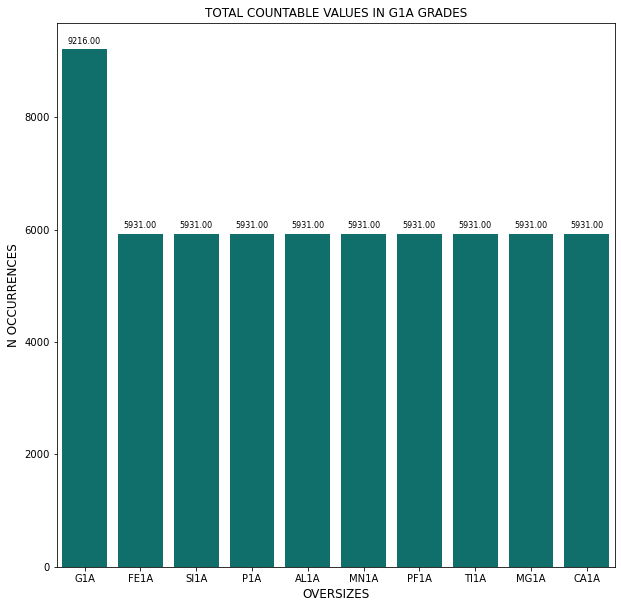

In [1180]:
fig=plt.figure(figsize=chart_size)

plots=sea.barplot(x=total.index, y=total.values, color=valecolor['VERDE'])

# ITERATING OVER THE THE BARS
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.title('TOTAL COUNTABLE VALUES IN G1A GRADES')
plt.ylabel('N OCCURRENCES', fontsize=12)
plt.xlabel('OVERSIZES', fontsize=12)

plt.show()

fig.savefig(proj + '_G1A_COUNTABLE_VALUES_ISO.jpeg', transparent=None)

## G1B - 8 MM

In [1181]:
df_g1b = fac.loc[:,set_g1b]

In [1182]:
df_g1b.head()

G1B   FE1B  SI1B   P1B  AL1B  MN1B  PF1B  TI1B   MG1B   CA1B
0    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN
1  10.78  66.88  0.33  0.12  0.77  0.02  3.26  0.08  0.004  0.003
2   8.13  67.18  0.30  0.06  0.64  0.04  2.03  0.17  0.004  0.008
3  12.94  64.07  0.65  0.12  2.56  0.03  4.53  0.19  0.010  0.006
4    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN

In [1183]:
df_g1b.describe()

G1B         FE1B         SI1B          P1B         AL1B  \
count  9216.000000  8756.000000  8756.000000  8756.000000  8756.000000   
mean      9.996341    62.685741     3.229370     0.060362     2.763684   
std       7.414044     9.199077     7.383381     0.097579     5.074954   
min       0.000000     2.480000     0.030000     0.001000     0.020000   
25%       4.250000    62.580000     0.620000     0.010000     0.590000   
50%       8.720000    65.980000     0.900000     0.020000     1.090000   
75%      14.332500    67.510000     2.020000     0.070000     2.250000   
max      99.660000    69.830000    84.540000     2.230000    44.370000   

              MN1B         PF1B         TI1B         MG1B         CA1B  
count  8755.000000  8756.000000  8477.000000  8734.000000  8733.000000  
mean      0.701372     2.904026     0.196522     0.090069     0.016074  
std       1.957380     3.081795     0.413638     0.762346     0.036054  
min       0.004000    -1.310000     0.001000     0.001000     0.001000  
25%       0.050000     1.070000     0.030000     0.010000     0.010000  
50%       0.110000     1.790000     0.050000     0.020000     0.010000  
75%       0.450000     3.490000     0.130000     0.040000     0.020000  
max      39.040000    24.530000     6.740000    22.700000     1.130000

In [1184]:
df_g1b['G1B_COUNT'] = df_g1b.count(axis=1)

In [1185]:
df_g1b['G1B_COUNT'].unique()

array([ 0, 10,  9,  7,  8,  1], dtype=int64)

In [1186]:
df_g1b.groupby('G1B_COUNT').count()

G1B  FE1B  SI1B   P1B  AL1B  MN1B  PF1B  TI1B  MG1B  CA1B
G1B_COUNT                                                            
0             0     0     0     0     0     0     0     0     0     0
1           460     0     0     0     0     0     0     0     0     0
7             8     8     8     8     8     8     8     0     0     0
8             5     5     5     5     5     5     5     2     1     2
9           291   291   291   291   291   290   291    23   281   279
10         8452  8452  8452  8452  8452  8452  8452  8452  8452  8452

In [1187]:
# erificando se há 460ros em g1b...

In [1188]:
i = (fac['G1B'] == 0)

In [1189]:
df = fac.loc[i,:]

In [1190]:
df.shape

(460, 69)

In [1191]:
# confirmado!

In [1192]:
#8 amostras sem todos os menores
#5 com pelo menos 2 dos menores faltando
#291 faltando 1 menor: 268  para ti, 10 para mg, 12 para ca

In [1193]:
# interceptando 8 amostras sem menores

In [1194]:
i = (df_g1b['G1B_COUNT'] == 7) & (df_g1b['TI1B'].isna())

In [1195]:
fac.loc[i, 'TAG'] = '1B_8'

In [1196]:
fac.loc[i, 'TI1B'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'TIGL', 'wavg'), axis =1)

In [1197]:
fac.loc[i, 'MG1B'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'MGGL', 'wavg'), axis =1)

In [1198]:
fac.loc[i, 'CA1B'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'CAGL', 'wavg'), axis =1)

In [1199]:
fac.loc[i,:]

FURO              NA     DE    ATE  LENGTH CLV  CLM  CLI   FEGL  \
123   FRN5E-0132  FRN5E-0132-001   0.00   7.80    7.80  HM   HF   HF  67.45   
124   FRN5E-0132  FRN5E-0132-002   7.80  15.80    8.00  HM   HF   HF  68.17   
1592  FRN5W-0350  FRN5W-0350-002  40.52  52.14   11.62  HF   HF   HF  63.11   
1594  FRN5W-0351  FRN5W-0351-001   0.00  15.02   15.02  CM   CQ   CQ  53.51   
1595  FRN5W-0351  FRN5W-0351-002  15.02  31.35   16.33  CM   CQ   CQ  51.85   
1597  FRN5W-0351  FRN5W-0351-004  48.24  58.83   10.59  HC  HMN  HMN  60.73   
1598  FRN5W-0351  FRN5W-0351-005  58.83  69.67   10.84  HC   HF   HF  65.22   
1611  FRN5W-0354  FRN5W-0354-002   8.97  17.66    8.69  HF   HF   HF  66.91   

          SIGL    PGL       ALGL  MNGL   PFGL      TIGL      MGGL      CAGL  \
123   0.630000  0.020   0.500000  0.97   1.05  0.040000  0.010000  0.010000   
124   0.520000  0.020   0.420000  0.55   0.77  0.030000  0.027112  0.010000   
1592  1.383126  0.040   0.885585  0.09   3.62  0.054098  0.027112  0.012374   
1594  1.330000  0.240   9.270000  0.21  10.81  0.900000  0.010000  0.040000   
1595  0.910000  0.230  10.860000  1.66   9.87  1.120000  0.020000  0.011842   
1597  1.020000  0.030   1.230000  5.48   3.13  0.001000  0.130000  0.015956   
1598  1.150000  0.030   0.960000  1.88   1.84  0.010000  0.027112  0.010000   
1611  1.100000  0.009   0.280000  1.27   1.00  0.054098  0.027112  0.012374   

        G1A    G1B     G2     G3   FE1A  SI1A   P1A  AL1A  MN1A   PF1A  \
123    0.00   8.87  81.08  10.05    NaN   NaN   NaN   NaN   NaN    NaN   
124    0.00  12.43  79.26   8.31    NaN   NaN   NaN   NaN   NaN    NaN   
1592  28.64  12.81  51.09   7.45  59.25  0.69  0.04  8.81  0.09   5.58   
1594  62.23  15.02  22.75   0.00  54.73  1.38  0.24  7.88  0.21  10.60   
1595  60.69  18.93  20.38   0.00  53.09  0.91  0.23  9.43  1.97   9.20   
1597  40.45  17.51  39.58   2.46  57.33  0.95  0.03  1.52  7.00   3.69   
1598  15.71  28.69  55.60   0.00  64.67  0.95  0.04  1.80  1.48   2.71   
1611   0.00   4.82  84.08  11.08    NaN   NaN   NaN   NaN   NaN    NaN   

          TI1A      MG1A      CA1A   FE1B  SI1B   P1B   AL1B  MN1B   PF1B  \
123        NaN       NaN       NaN  65.32  0.63  0.04   0.65  2.63   1.72   
124        NaN       NaN       NaN  67.69  0.51  0.02   0.47  0.92   0.92   
1592  0.054098  0.027112  0.012374  64.28  0.73  0.03   4.38  0.09   2.79   
1594  1.430433  0.107661  0.011842  52.15  1.16  0.23  10.92  0.40  11.25   
1595  1.430433  0.107661  0.011842  50.50  0.88  0.23  11.78  2.06  10.62   
1597  0.049339  0.041992  0.015956  61.99  1.04  0.03   1.35  4.42   2.91   
1598  0.054098  0.027112  0.012374  66.11  1.11  0.02   0.85  1.50   1.50   
1611       NaN       NaN       NaN  60.23  0.97  0.01   0.57  7.35   2.68   

          TI1B      MG1B      CA1B    FE2   SI2     P2    AL2   MN2    PF2  \
123   0.054098  0.027112  0.012374  67.83  0.58  0.020   0.45  0.77   0.87   
124   0.054098  0.027112  0.012374  68.31  0.50  0.020   0.40  0.49   0.69   
1592  0.054098  0.027112  0.012374  65.00  0.96  0.040   3.33  0.08   2.76   
1594  1.430433  0.107661  0.011842  51.11  1.32  0.270  12.01  0.21  11.11   
1595  1.430433  0.107661  0.011842  49.41  0.92  0.260  14.26  0.47  11.21   
1597  0.049339  0.041992  0.015956  63.50  1.07  0.040   0.86  3.42   2.69   
1598  0.054098  0.027112  0.012374  64.92  1.22  0.030   0.79  2.20   1.77   
1611  0.054098  0.027112  0.012374  67.40  0.98  0.009   0.23  0.94   0.84   

       TI2   MG2   CA2    FE3   SI3    P3   AL3   MN3   PF3   TI3   MG3   CA3  \
123   0.03  0.01  0.01  66.31  0.80  0.06  0.74  1.16  1.91  0.06  0.01  0.01   
124   0.03   NaN  0.01  67.55  0.58  0.04  0.52  0.64  1.32  0.04  0.01  0.01   
1592   NaN   NaN   NaN  63.10  1.03  0.07  4.89  0.14  3.51   NaN   NaN   NaN   
1594   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1595   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1597   NaN   NaN   NaN  63.48  1.38  0

In [1200]:
# 3 AMOSTRAS COM 2 MENORES FALTANDO...

In [1201]:
i = (df_g1b['G1B_COUNT'] == 8) & (df_g1b['TI1B'].isna())

In [1202]:
fac.loc[i, 'TAG'] = '1B_7'

In [1203]:
fac.loc[i,:]

FURO              NA    DE    ATE  LENGTH CLV  CLM  CLI   FEGL  \
1223  FRN5W-0289  FRN5W-0289-006  68.4  84.43   16.03  HF   HF   HF  65.86   
1410  FRN5W-0316  FRN5W-0316-001   0.0  10.67   10.67  HF   HF   HF  66.50   
1610  FRN5W-0354  FRN5W-0354-001   0.0   8.97    8.97  HF  HMN  HMN  57.87   

      SIGL   PGL  ALGL  MNGL  PFGL      TIGL   MGGL   CAGL   G1A    G1B  \
1223  1.15  0.02  1.05  0.97  2.23  0.054098  0.020  0.002  8.85  12.07   
1410  1.43  0.01  0.81  0.78  1.60  0.054098  0.001  0.030  0.00   2.16   
1610  0.84  0.02  0.66  8.33  3.40  0.049339  0.010  0.020  4.66  10.99   

         G2     G3   FE1A  SI1A   P1A  AL1A   MN1A  PF1A      TI1A      MG1A  \
1223  71.06   8.02  66.82  0.61  0.03  1.54   0.20  1.83  0.054098  0.030000   
1410  86.58  11.25    NaN   NaN   NaN   NaN    NaN   NaN       NaN       NaN   
1610  65.52  18.82  37.00  0.60  0.03  1.20  17.04  8.32  0.049339  0.041992   

          CA1A   FE1B  SI1B   P1B  AL1B   MN1B  PF1B  TI1B  MG1B  CA1B    FE2  \
1223  0.012374  66.90  0.53  0.03  1.46   0.14  1.69   NaN  0.02   NaN  65.72   
1410       NaN  49.09  3.78  0.01  2.97  13.40  5.71   NaN   NaN  0.01  67.01   
1610  0.050000  54.93  0.67  0.02  0.62  12.45  3.69   NaN   NaN  0.03  58.24   

       SI2    P2   AL2   MN2   PF2  TI2    MG2    CA2    FE3   SI3    P3  \
1223  1.26  0.02  0.88  1.17  2.31  NaN  0.020  0.003  64.50  1.74  0.04   
1410  1.33  0.01  0.74  0.50  1.39  NaN  0.001  0.030  65.95  1.73  0.01   
1610  0.82  0.02  0.60  7.58  3.27  NaN    NaN  0.020  63.46  1.06  0.02   

       AL3   MN3   PF3  TI3    MG3    CA3   FQGL   FQ1A    FQ1B     FQ2  \
1223  1.50  1.22  2.83  NaN  0.020  0.002  99.95  99.99   99.60  100.00   
1410  0.88  0.49  2.39  NaN  0.003  0.030  99.99    NaN  100.00  100.00   
1610  0.77  3.69  2.45  NaN  0.060  0.010  98.48  99.15   99.68   97.82   

         FQ3    FGRA  REC_P     FL_AN  FQ_GLA STATUS   TAG  NFQGL  
1223   99.98   99.99    NaN  CJCP2008     NaN    NaN  1B_7    NaN  
1410  100.00  100.00    NaN  CJCP2008     NaN    NaN  1B_7    NaN  
1610   99.92  100.00    NaN  CJCP2008     NaN    NaN  1B_7    NaN

In [1204]:
# ti

In [1205]:
fac.loc[i, 'TI1B'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'TIGL', 'wavg'), axis =1)

In [1206]:
# mg

In [1207]:
i = (df_g1b['G1B_COUNT'] == 8) & (df_g1b['MG1B'].isna())

In [1208]:
fac.loc[i, 'MG1B'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'MGGL', 'wavg'), axis =1)

In [1209]:
# ca

In [1210]:
i = (df_g1b['G1B_COUNT'] == 8) & (df_g1b['CA1B'].isna())

In [1211]:
fac.loc[i, 'CA1B'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'CAGL', 'wavg'), axis =1)

In [1212]:
fac.loc[i,:]

FURO              NA     DE    ATE  LENGTH CLV CLM CLI   FEGL  \
140   FRN5E-0136  FRN5E-0136-002   6.10  12.20    6.10  CM  CE  CE  66.44   
1223  FRN5W-0289  FRN5W-0289-006  68.40  84.43   16.03  HF  HF  HF  65.86   
7871    N5E-0930    N5E-0930-003  16.16  24.24    8.08  HM  HF  HF  68.59   

      SIGL   PGL  ALGL  MNGL  PFGL      TIGL      MGGL   CAGL    G1A    G1B  \
140   0.50  0.43  1.72  0.12  1.51  0.120000  0.028165  0.010  52.90  11.33   
1223  1.15  0.02  1.05  0.97  2.23  0.054098  0.020000  0.002   8.85  12.07   
7871  0.52  0.01  0.34  0.31  0.58  0.020000  0.027112  0.010   0.00   4.78   

         G2     G3   FE1A  SI1A   P1A  AL1A  MN1A  PF1A      TI1A      MG1A  \
140   34.13   1.64  66.19  0.50  0.51  1.92  0.11  1.48  0.100000  0.028165   
1223  71.06   8.02  66.82  0.61  0.03  1.54  0.20  1.83  0.054098  0.030000   
7871  83.14  12.08    NaN   NaN   NaN   NaN   NaN   NaN       NaN       NaN   

          CA1A   FE1B  SI1B   P1B  AL1B  MN1B  PF1B      TI1B      MG1B  \
140   0.007000  65.74  0.50  0.46  2.23  0.13  1.91  0.130000  0.028165   
1223  0.012374  66.90  0.53  0.03  1.46  0.14  1.69  0.054098  0.020000   
7871       NaN  67.89  0.50  0.02  0.41  0.69  1.03  0.030000  0.027112   

          CA1B    FE2   SI2    P2   AL2   MN2   PF2   TI2   MG2    CA2    FE3  \
140   0.009831  67.20  0.50  0.28  1.17  0.15  1.29  0.10   NaN    NaN  63.58   
1223  0.012374  65.72  1.26  0.02  0.88  1.17  2.31   NaN  0.02  0.003  64.50   
7871  0.012374  68.75  0.49  0.01  0.32  0.28  0.47  0.02   NaN    NaN  67.84   

       SI3    P3   AL3   MN3   PF3   TI3   MG3    CA3   FQGL   FQ1A   FQ1B  \
140   0.56  0.58  2.45  0.21  4.08  0.35  0.01  0.010  99.97  99.98  99.98   
1223  1.74  0.04  1.50  1.22  2.83   NaN  0.02  0.002  99.95  99.99  99.60   
7871  0.71  0.03  0.43  0.43  1.17  0.03  0.01  0.010  99.99    NaN  99.99   

         FQ2     FQ3    FGRA  REC_P          FL_AN  FQ_GLA STATUS   TAG  NFQGL  
140    99.98   99.98  100.00    NaN           TPCP     NaN    NaN  1A_8    NaN  
1223  100.00   99.98   99.99    NaN       CJCP2008     NaN    NaN  1B_7    NaN  
7871  100.00  100.00  100.00  81.01  nautilus_rotp   100.0    NaN   8_6    NaN

In [1213]:
# 1 AMOSTRA FALTANDO MN1B

In [1214]:
i = (df_g1b['G1B_COUNT'] == 9) & (df_g1b['MN1B'].isna())

In [1215]:
fac.loc[i,:]

FURO            NA     DE   ATE  LENGTH CLV CLM CLI   FEGL  SIGL  \
18607  N5W-0534  N5W-0534-005  26.45  33.1    6.65  HM  HF  HF  66.88   2.3   

        PGL  ALGL      MNGL  PFGL  TIGL  MGGL  CAGL  G1A   G1B     G2    G3  \
18607  0.01  0.45  0.286715  1.22  0.02  0.03  0.02  0.0  8.02  88.38  3.59   

       FE1A  SI1A  P1A  AL1A  MN1A  PF1A  TI1A  MG1A  CA1A  FE1B  SI1B   P1B  \
18607   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  64.8  5.89  0.01   

       AL1B  MN1B  PF1B  TI1B  MG1B  CA1B    FE2   SI2    P2  AL2   MN2   PF2  \
18607  0.51   NaN  0.68  0.02  0.02  0.01  67.16  1.84  0.01  0.4  0.01  1.27   

        TI2   MG2   CA2    FE3  SI3    P3   AL3   MN3  PF3   TI3   MG3   CA3  \
18607  0.01  0.02  0.02  64.78  4.6  0.01  0.88  0.02  1.3  0.04  0.08  0.03   

        FQGL  FQ1A   FQ1B    FQ2    FQ3   FGRA  REC_P       FL_AN  FQ_GLA  \
18607  99.65   NaN  99.83  99.65  99.64  100.0  93.25  silab_rotp    99.7   

      STATUS  TAG  NFQGL  
18607    NaN  8_3    NaN

In [1216]:
fac.loc[i, 'TAG'] = '1B_8'

In [1217]:
fac.loc[i, 'MN1B'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'MNGL', 'wavg'), axis =1)

In [1218]:
fac.loc[i,:]

FURO            NA     DE   ATE  LENGTH CLV CLM CLI   FEGL  SIGL  \
18607  N5W-0534  N5W-0534-005  26.45  33.1    6.65  HM  HF  HF  66.88   2.3   

        PGL  ALGL      MNGL  PFGL  TIGL  MGGL  CAGL  G1A   G1B     G2    G3  \
18607  0.01  0.45  0.286715  1.22  0.02  0.03  0.02  0.0  8.02  88.38  3.59   

       FE1A  SI1A  P1A  AL1A  MN1A  PF1A  TI1A  MG1A  CA1A  FE1B  SI1B   P1B  \
18607   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  64.8  5.89  0.01   

       AL1B      MN1B  PF1B  TI1B  MG1B  CA1B    FE2   SI2    P2  AL2   MN2  \
18607  0.51  0.286715  0.68  0.02  0.02  0.01  67.16  1.84  0.01  0.4  0.01   

        PF2   TI2   MG2   CA2    FE3  SI3    P3   AL3   MN3  PF3   TI3   MG3  \
18607  1.27  0.01  0.02  0.02  64.78  4.6  0.01  0.88  0.02  1.3  0.04  0.08   

        CA3   FQGL  FQ1A   FQ1B    FQ2    FQ3   FGRA  REC_P       FL_AN  \
18607  0.03  99.65   NaN  99.83  99.65  99.64  100.0  93.25  silab_rotp   

       FQ_GLA STATUS   TAG  NFQGL  
18607    99.7    NaN  1B_8    NaN

In [1219]:
# ti

In [1220]:
i = (df_g1b['G1B_COUNT'] == 9) & (df_g1b['TI1B'].isna())

In [1221]:
fac.loc[i, 'TAG'] = '1B_8'

In [1222]:
fac.loc[i, 'TI1B'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'TIGL', 'wavg'), axis =1)

In [1223]:
# mg

In [1224]:
i = (df_g1b['G1B_COUNT'] == 9) & (df_g1b['MG1B'].isna())

In [1225]:
fac.loc[i, 'TAG'] = '1B_8'

In [1226]:
fac.loc[i, 'MG1B'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'MGGL', 'wavg'), axis =1)

In [1227]:
# ca

In [1228]:
i = (df_g1b['G1B_COUNT'] == 9) & (df_g1b['CA1B'].isna())

In [1229]:
fac.loc[i, 'TAG'] = '1B_8'

In [1230]:
fac.loc[i, 'CA1B'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'CAGL', 'wavg'), axis =1)

In [1231]:
# ATRIBUINDO LD A PF1B NEGATIVA

In [1232]:
i = (fac['PF1B'] < 0)

In [1233]:
fac.loc[i, :]

FURO               NA      DE     ATE  LENGTH CLV CLM CLI  \
24287  SN5-FD00174  SN5-FD00174-028  174.65  185.35    10.7  HF  HF  HF   
24291  SN5-FD00174  SN5-FD00174-029  185.35  195.95    10.6  HF  HF  HF   

        FEGL      SIGL    PGL      ALGL  MNGL  PFGL      TIGL      MGGL  \
24287  66.58  1.383126  0.005  0.885585  0.28  0.49  0.054098  0.027112   
24291  67.04  1.383126  0.006  0.885585  0.18  0.51  0.054098  0.027112   

           CAGL   G1A   G1B     G2     G3  FE1A  SI1A    P1A  AL1A  MN1A  \
24287  0.012374  0.00  3.42  85.10  11.48   NaN   NaN    NaN   NaN   NaN   
24291  0.012374  1.04  4.37  77.07  17.52  66.3  0.81  0.006  0.45  0.58   

       PF1A  TI1A  MG1A  CA1A  FE1B  SI1B    P1B  AL1B  MN1B  PF1B  TI1B  \
24287   NaN   NaN   NaN   NaN  64.0  1.09  0.008  0.45  0.90 -0.89  0.04   
24291  0.01  0.03   0.1  0.02  64.1  0.94  0.010  0.52  0.29 -1.31  0.04   

       MG1B  CA1B    FE2   SI2     P2   AL2   MN2   PF2   TI2  MG2   CA2  \
24287   0.1  0.03  66.98  1.48  0.005  0.64  0.26  0.46  0.03  0.1  0.02   
24291   0.1  0.02  67.50  1.12  0.005  0.63  0.16  0.48  0.02  0.1  0.02   

        FE3   SI3     P3   AL3   MN3   PF3   TI3  MG3   CA3   FQGL   FQ1A  \
24287  64.4  2.68  0.007  1.87  0.27  1.09  0.02  0.1  0.02  98.64    NaN   
24291  65.8  2.97  0.007  2.10  0.19  1.14  0.02  0.1  0.03  99.10  98.17   

        FQ1B    FQ2     FQ3   FGRA  REC_P     FL_AN  FQ_GLA STATUS  TAG  \
24287  93.55  98.89   98.23  100.0  85.98  CJLP2008     NaN    NaN  4_1   
24291  92.38  99.13  100.71  100.0  96.23  CJLP2008     NaN    NaN  4_1   

           NFQGL  
24287  98.414713  
24291  98.965546

In [1234]:
fac.loc[i, 'PF1B'] = 0.01

In [1235]:
fac.loc[i, :]

FURO               NA      DE     ATE  LENGTH CLV CLM CLI  \
24287  SN5-FD00174  SN5-FD00174-028  174.65  185.35    10.7  HF  HF  HF   
24291  SN5-FD00174  SN5-FD00174-029  185.35  195.95    10.6  HF  HF  HF   

        FEGL      SIGL    PGL      ALGL  MNGL  PFGL      TIGL      MGGL  \
24287  66.58  1.383126  0.005  0.885585  0.28  0.49  0.054098  0.027112   
24291  67.04  1.383126  0.006  0.885585  0.18  0.51  0.054098  0.027112   

           CAGL   G1A   G1B     G2     G3  FE1A  SI1A    P1A  AL1A  MN1A  \
24287  0.012374  0.00  3.42  85.10  11.48   NaN   NaN    NaN   NaN   NaN   
24291  0.012374  1.04  4.37  77.07  17.52  66.3  0.81  0.006  0.45  0.58   

       PF1A  TI1A  MG1A  CA1A  FE1B  SI1B    P1B  AL1B  MN1B  PF1B  TI1B  \
24287   NaN   NaN   NaN   NaN  64.0  1.09  0.008  0.45  0.90  0.01  0.04   
24291  0.01  0.03   0.1  0.02  64.1  0.94  0.010  0.52  0.29  0.01  0.04   

       MG1B  CA1B    FE2   SI2     P2   AL2   MN2   PF2   TI2  MG2   CA2  \
24287   0.1  0.03  66.98  1.48  0.005  0.64  0.26  0.46  0.03  0.1  0.02   
24291   0.1  0.02  67.50  1.12  0.005  0.63  0.16  0.48  0.02  0.1  0.02   

        FE3   SI3     P3   AL3   MN3   PF3   TI3  MG3   CA3   FQGL   FQ1A  \
24287  64.4  2.68  0.007  1.87  0.27  1.09  0.02  0.1  0.02  98.64    NaN   
24291  65.8  2.97  0.007  2.10  0.19  1.14  0.02  0.1  0.03  99.10  98.17   

        FQ1B    FQ2     FQ3   FGRA  REC_P     FL_AN  FQ_GLA STATUS  TAG  \
24287  93.55  98.89   98.23  100.0  85.98  CJLP2008     NaN    NaN  4_1   
24291  92.38  99.13  100.71  100.0  96.23  CJLP2008     NaN    NaN  4_1   

           NFQGL  
24287  98.414713  
24291  98.965546

###### VERIFICANDO A REGULARIZAÇÃO APLICADA

In [1236]:
df = fac.loc[:, set_g1b]

In [1237]:
total = df.count()

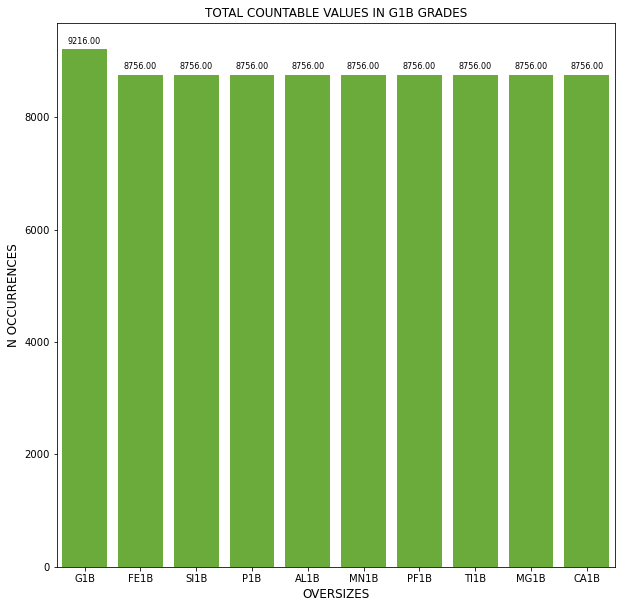

In [1238]:
fig=plt.figure(figsize=chart_size)

plots=sea.barplot(x=total.index, y=total.values, color=valecolor['VERDE2'])

# ITERATING OVER THE THE BARS
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.title('TOTAL COUNTABLE VALUES IN G1B GRADES')
plt.ylabel('N OCCURRENCES', fontsize=12)
plt.xlabel('OVERSIZES', fontsize=12)

plt.show()

fig.savefig(proj + '_G1B_COUNTABLE_VALUES_ISO.jpeg', transparent=None)

## G2 - 0.15 MM

In [1239]:
df_g2 = fac.loc[:,set_g2]

In [1240]:
df_g2.head()

G2    FE2   SI2    P2   AL2   MN2   PF2   TI2    MG2    CA2
0    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN
1  16.67  67.17  0.33  0.11  0.69  0.02  2.57  0.08  0.004  0.008
2  33.49  67.89  0.31  0.05  0.61  0.03  1.66  0.16  0.003  0.010
3  24.27  62.90  0.61  0.13  3.55  0.04  5.62  0.25  0.010  0.010
4    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN

In [1241]:
df_g2.describe()

G2          FE2          SI2           P2          AL2  \
count  9216.000000  9085.000000  9085.000000  9085.000000  9085.000000   
mean     59.590894    64.062013     2.683110     0.052721     2.253224   
std      27.148613     8.804762     6.407618     0.090041     4.969176   
min       0.000000     1.860000     0.030000     0.001000     0.010000   
25%      39.127500    64.710000     0.620000     0.010000     0.420000   
50%      69.500000    67.150000     0.880000     0.020000     0.690000   
75%      80.800000    68.100000     1.580000     0.050000     1.440000   
max      98.720000    69.950000    80.290000     1.650000    47.450000   

               MN2          PF2          TI2          MG2          CA2  
count  9082.000000  9085.000000  8801.000000  9056.000000  9070.000000  
mean      0.433564     2.393321     0.193852     0.072168     0.014893  
std       1.211428     3.050916     0.457980     0.618078     0.023451  
min       0.004000     0.010000     0.001000     0.001000     0.001000  
25%       0.050000     0.770000     0.020000     0.010000     0.010000  
50%       0.100000     1.230000     0.040000     0.020000     0.010000  
75%       0.360000     2.420000     0.100000     0.040000     0.020000  
max      34.200000    25.330000     6.580000    22.160000     0.860000

In [1242]:
df_g2['G2_COUNT'] = df_g2.count(axis=1)

In [1243]:
df_g2['G2_COUNT'].unique()

array([ 0, 10,  8,  9,  7,  1], dtype=int64)

In [1244]:
df_g2.groupby('G2_COUNT').count()

G2   FE2   SI2    P2   AL2   MN2   PF2   TI2   MG2   CA2
G2_COUNT                                                            
0            0     0     0     0     0     0     0     0     0     0
1          131     0     0     0     0     0     0     0     0     0
7            6     6     6     6     6     6     6     0     0     0
8            5     5     5     5     5     5     5     4     0     1
9          303   303   303   303   303   300   303    26   285   298
10        8771  8771  8771  8771  8771  8771  8771  8771  8771  8771

In [1245]:
i = (fac['G2'] == 0)

In [1246]:
fac.loc[i,:].shape

(131, 69)

In [1247]:
#confirmado que há 131 zeros em g2

In [1248]:
#6 amostras sem nenhum menor
#5 faltando 2 dos menores
#303 faltando apenas 1 analito: 3 sem mn2, 277 sem ti2, 18 sem mg2, 5 sem ca

In [1249]:
# interceptando e regularizando 6 amostras sem menores
# decisão: completar com médias por lito

In [1250]:
i = (df_g2['G2_COUNT'] == 7) & (df_g2['TI2'].isna())

In [1251]:
fac.loc[i, 'TAG'] = '2_6'

In [1252]:
fac.loc[i, 'TI2'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'TIGL', 'wavg'), axis =1)

In [1253]:
fac.loc[i, 'MG2'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'MGGL', 'wavg'), axis =1)

In [1254]:
fac.loc[i, 'CA2'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'CAGL', 'wavg'), axis =1)

In [1255]:
fac.loc[i,:]

FURO              NA     DE    ATE  LENGTH CLV  CLM  CLI   FEGL  \
1592  FRN5W-0350  FRN5W-0350-002  40.52  52.14   11.62  HF   HF   HF  63.11   
1594  FRN5W-0351  FRN5W-0351-001   0.00  15.02   15.02  CM   CQ   CQ  53.51   
1595  FRN5W-0351  FRN5W-0351-002  15.02  31.35   16.33  CM   CQ   CQ  51.85   
1597  FRN5W-0351  FRN5W-0351-004  48.24  58.83   10.59  HC  HMN  HMN  60.73   
1598  FRN5W-0351  FRN5W-0351-005  58.83  69.67   10.84  HC   HF   HF  65.22   
1611  FRN5W-0354  FRN5W-0354-002   8.97  17.66    8.69  HF   HF   HF  66.91   

          SIGL    PGL       ALGL  MNGL   PFGL      TIGL      MGGL      CAGL  \
1592  1.383126  0.040   0.885585  0.09   3.62  0.054098  0.027112  0.012374   
1594  1.330000  0.240   9.270000  0.21  10.81  0.900000  0.010000  0.040000   
1595  0.910000  0.230  10.860000  1.66   9.87  1.120000  0.020000  0.011842   
1597  1.020000  0.030   1.230000  5.48   3.13  0.001000  0.130000  0.015956   
1598  1.150000  0.030   0.960000  1.88   1.84  0.010000  0.027112  0.010000   
1611  1.100000  0.009   0.280000  1.27   1.00  0.054098  0.027112  0.012374   

        G1A    G1B     G2     G3   FE1A  SI1A   P1A  AL1A  MN1A   PF1A  \
1592  28.64  12.81  51.09   7.45  59.25  0.69  0.04  8.81  0.09   5.58   
1594  62.23  15.02  22.75   0.00  54.73  1.38  0.24  7.88  0.21  10.60   
1595  60.69  18.93  20.38   0.00  53.09  0.91  0.23  9.43  1.97   9.20   
1597  40.45  17.51  39.58   2.46  57.33  0.95  0.03  1.52  7.00   3.69   
1598  15.71  28.69  55.60   0.00  64.67  0.95  0.04  1.80  1.48   2.71   
1611   0.00   4.82  84.08  11.08    NaN   NaN   NaN   NaN   NaN    NaN   

          TI1A      MG1A      CA1A   FE1B  SI1B   P1B   AL1B  MN1B   PF1B  \
1592  0.054098  0.027112  0.012374  64.28  0.73  0.03   4.38  0.09   2.79   
1594  1.430433  0.107661  0.011842  52.15  1.16  0.23  10.92  0.40  11.25   
1595  1.430433  0.107661  0.011842  50.50  0.88  0.23  11.78  2.06  10.62   
1597  0.049339  0.041992  0.015956  61.99  1.04  0.03   1.35  4.42   2.91   
1598  0.054098  0.027112  0.012374  66.11  1.11  0.02   0.85  1.50   1.50   
1611       NaN       NaN       NaN  60.23  0.97  0.01   0.57  7.35   2.68   

          TI1B      MG1B      CA1B    FE2   SI2     P2    AL2   MN2    PF2  \
1592  0.054098  0.027112  0.012374  65.00  0.96  0.040   3.33  0.08   2.76   
1594  1.430433  0.107661  0.011842  51.11  1.32  0.270  12.01  0.21  11.11   
1595  1.430433  0.107661  0.011842  49.41  0.92  0.260  14.26  0.47  11.21   
1597  0.049339  0.041992  0.015956  63.50  1.07  0.040   0.86  3.42   2.69   
1598  0.054098  0.027112  0.012374  64.92  1.22  0.030   0.79  2.20   1.77   
1611  0.054098  0.027112  0.012374  67.40  0.98  0.009   0.23  0.94   0.84   

           TI2       MG2       CA2    FE3   SI3    P3   AL3   MN3   PF3  TI3  \
1592  0.054098  0.027112  0.012374  63.10  1.03  0.07  4.89  0.14  3.51  NaN   
1594  1.430433  0.107661  0.011842    NaN   NaN   NaN   NaN   NaN   NaN  NaN   
1595  1.430433  0.107661  0.011842    NaN   NaN   NaN   NaN   NaN   NaN  NaN   
1597  0.049339  0.041992  0.015956  63.48  1.38  0.06  1.47  2.64  2.74  NaN   
1598  0.054098  0.027112  0.012374    NaN   NaN   NaN   NaN   NaN   NaN  NaN   
1611  0.054098  0.027112  0.012374  66.10  2.06  0.01  0.45  1.10  1.49  NaN   

      MG3  CA3    FQGL    FQ1A    FQ1B     FQ2     FQ3    FGRA  REC_P  \
1592  NaN  NaN  100.10  100.00  100.00  100.19  100.00   99.99    NaN   
1594  NaN  NaN   98.78   98.88   98.94   98.40     NaN  100.00    NaN   
1595  NaN  NaN   98.47   98.48   98.67   98.24     NaN  100.00    NaN   
1597  NaN  NaN   99.39   98.69   99.71   99.92   99.90  100.00    NaN   
1598  NaN  NaN   99.72   99.91   99.98   99.53     NaN  100.00    NaN   
1611  NaN  NaN   99.70     NaN   99.86   99.66   99.96   99.99    NaN   

         FL_AN  FQ_GLA STATUS  TAG      NFQGL  
1592  CJCP2008     NaN    NaN  2_6  96.418525  
1594  CJCP2008     NaN    NaN  2_6        NaN  
1595  CJCP2008     NaN    NaN  2_6        NaN  
1597  CJCP2008     NaN    NaN  2_

In [1256]:
# interceptando e regularizando 5 amostras sem 2 dos menores

In [1257]:
# ti

In [1258]:
i = (df_g2['G2_COUNT'] == 8) & (df_g2['TI2'].isna())

In [1259]:
fac.loc[i,:]

FURO              NA   DE   ATE  LENGTH CLV  CLM  CLI   FEGL  \
1610  FRN5W-0354  FRN5W-0354-001  0.0  8.97    8.97  HF  HMN  HMN  57.87   

      SIGL   PGL  ALGL  MNGL  PFGL      TIGL  MGGL  CAGL   G1A    G1B     G2  \
1610  0.84  0.02  0.66  8.33   3.4  0.049339  0.01  0.02  4.66  10.99  65.52   

         G3  FE1A  SI1A   P1A  AL1A   MN1A  PF1A      TI1A      MG1A  CA1A  \
1610  18.82  37.0   0.6  0.03   1.2  17.04  8.32  0.049339  0.041992  0.05   

       FE1B  SI1B   P1B  AL1B   MN1B  PF1B      TI1B      MG1B  CA1B    FE2  \
1610  54.93  0.67  0.02  0.62  12.45  3.69  0.049339  0.041992  0.03  58.24   

       SI2    P2  AL2   MN2   PF2  TI2  MG2   CA2    FE3   SI3    P3   AL3  \
1610  0.82  0.02  0.6  7.58  3.27  NaN  NaN  0.02  63.46  1.06  0.02  0.77   

       MN3   PF3  TI3   MG3   CA3   FQGL   FQ1A   FQ1B    FQ2    FQ3   FGRA  \
1610  3.69  2.45  NaN  0.06  0.01  98.48  99.15  99.68  97.82  99.92  100.0   

      REC_P     FL_AN  FQ_GLA STATUS   TAG  NFQGL  
1610    NaN  CJCP2008     NaN    NaN  1B_7    NaN

In [1260]:
fac.loc[i, 'TAG'] = '2_7'

In [1261]:
fac.loc[i, 'TI2'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'TIGL', 'wavg'), axis =1)

In [1262]:
# mg

In [1263]:
i = (df_g2['G2_COUNT'] == 8) & (df_g2['MG2'].isna())

In [1264]:
fac.loc[i, 'TAG'] = '2_7'

In [1265]:
fac.loc[i, 'MG2'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'MGGL', 'wavg'), axis =1)

In [1266]:
# ca

In [1267]:
i = (df_g2['G2_COUNT'] == 8) & (df_g2['CA2'].isna())

In [1268]:
fac.loc[i, 'TAG'] = '2_7'

In [1269]:
fac.loc[i, 'CA2'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'CAGL', 'wavg'), axis =1)

In [1270]:
fac.loc[i,:]

FURO              NA     DE    ATE  LENGTH CLV CLM CLI   FEGL  \
94    FRN5E-0122  FRN5E-0122-001   0.00   7.90    7.90  HM  HF  HF  68.47   
140   FRN5E-0136  FRN5E-0136-002   6.10  12.20    6.10  CM  CE  CE  66.44   
7871    N5E-0930    N5E-0930-003  16.16  24.24    8.08  HM  HF  HF  68.59   
7872    N5E-0930    N5E-0930-004  24.24  32.33    8.09  HM  HF  HF  67.59   

      SIGL   PGL  ALGL  MNGL  PFGL  TIGL      MGGL  CAGL   G1A    G1B     G2  \
94    0.58  0.02  0.43  0.09  0.85  0.03  0.030000  0.01   0.0   7.29  70.39   
140   0.50  0.43  1.72  0.12  1.51  0.12  0.028165  0.01  52.9  11.33  34.13   
7871  0.52  0.01  0.34  0.31  0.58  0.02  0.027112  0.01   0.0   4.78  83.14   
7872  0.85  0.02  0.38  0.19  1.81  0.02  0.010000  0.01   0.0   7.03  56.08   

         G3   FE1A  SI1A   P1A  AL1A  MN1A  PF1A  TI1A      MG1A   CA1A  \
94    22.32    NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN    NaN   
140    1.64  66.19   0.5  0.51  1.92  0.11  1.48   0.1  0.028165  0.007   
7871  12.08    NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN    NaN   
7872  35.99    NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN    NaN   

       FE1B  SI1B   P1B  AL1B  MN1B  PF1B  TI1B      MG1B      CA1B    FE2  \
94    67.74  0.87  0.04  0.57  0.11  1.29  0.05  0.070000  0.010000  68.78   
140   65.74  0.50  0.46  2.23  0.13  1.91  0.13  0.028165  0.009831  67.20   
7871  67.89  0.50  0.02  0.41  0.69  1.03  0.03  0.027112  0.012374  68.75   
7872  66.59  1.05  0.03  0.74  0.98  1.53  0.03  0.020000  0.060000  67.72   

       SI2    P2   AL2   MN2   PF2   TI2       MG2       CA2    FE3   SI3  \
94    0.51  0.01  0.37  0.07  0.61  0.03  0.027112  0.012374  67.74  0.72   
140   0.50  0.28  1.17  0.15  1.29  0.10  0.028165  0.009831  63.58  0.56   
7871  0.49  0.01  0.32  0.28  0.47  0.02  0.027112  0.012374  67.84  0.71   
7872  0.82  0.02  0.33  0.13  1.80  0.02  0.027112  0.012374  67.59  0.83   

        P3   AL3   MN3   PF3   TI3   MG3   CA3   FQGL   FQ1A    FQ1B     FQ2  \
94    0.04  0.56  0.16  1.48  0.06  0.01   NaN  99.97    NaN   99.94   99.98   
140   0.58  2.45  0.21  4.08  0.35  0.01  0.01  99.97  99.98   99.98   99.98   
7871  0.03  0.43  0.43  1.17  0.03  0.01  0.01  99.99    NaN   99.99  100.00   
7872  0.02  0.37  0.13  1.90  0.02  0.01   NaN  99.99    NaN  100.02  100.01   

         FQ3   FGRA  REC_P          FL_AN  FQ_GLA STATUS  TAG  NFQGL  
94     99.98  100.0    NaN           TPCP     NaN    NaN  2_7    NaN  
140    99.98  100.0    NaN           TPCP     NaN    NaN  2_7    NaN  
7871  100.00  100.0  81.01  nautilus_rotp   100.0    NaN  2_7    NaN  
7872   99.99   99.1  80.32  nautilus_rotp   100.0    NaN  2_7    NaN

In [1271]:
# interceptando amostras com apenas 1 analito faltante...

In [1272]:
# interceptando 3 amostras sem mn2

In [1273]:
i = (df_g2['G2_COUNT'] == 9) & (df_g2['MN2'].isna())

In [1274]:
fac.loc[i,:]

FURO            NA    DE    ATE  LENGTH  CLV CLM CLI   FEGL  SIGL  \
5595   N5E-0414  N5E-0414-014  78.1  84.10    6.00   HM  HF  HF  67.77  0.63   
6864   N5E-0537  N5E-0537-002   4.6   9.20    4.60  HDL  HC  CE  67.72  0.43   
18608  N5W-0534  N5W-0534-006  33.1  39.75    6.65   HM  HF  HF  66.91  2.28   

        PGL  ALGL      MNGL  PFGL  TIGL   MGGL   CAGL    G1A    G1B     G2  \
5595   0.03  0.86  0.286715  1.08  0.06  0.010  0.020   1.66   2.61  66.73   
6864   0.13  0.65  0.182789  2.09  0.10  0.006  0.009  62.30  11.55  25.00   
18608  0.01  0.46  0.286715  1.16  0.02  0.030  0.020   0.00   6.14  89.45   

          G3   FE1A  SI1A   P1A  AL1A  MN1A  PF1A  TI1A   MG1A   CA1A   FE1B  \
5595   25.97  67.81  0.74  0.03  0.79  0.02  1.16  0.07  0.010  0.020  68.08   
6864    1.13  67.72  0.41  0.14  0.58  0.01  2.10  0.09  0.002  0.008  67.75   
18608   3.83    NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN  65.95   

       SI1B   P1B  AL1B  MN1B  PF1B  TI1B   MG1B   CA1B    FE2   SI2    P2  \
5595   0.47  0.02  0.55  0.01  1.10  0.06  0.010  0.020  68.02  0.54  0.03   
6864   0.44  0.12  0.70  0.01  2.10  0.10  0.006  0.009  67.89  0.45  0.11   
18608  3.88  0.01  0.63  0.02  0.84  0.03  0.020  0.020  67.09  2.05  0.01   

        AL2  MN2   PF2   TI2    MG2    CA2    FE3   SI3    P3   AL3   MN3  \
5595   0.66  NaN  0.92  0.05  0.010  0.020  67.10  0.75  0.04  1.38  0.02   
6864   0.65  NaN  1.91  0.10  0.005  0.009  63.38  0.80  0.29  1.75  0.18   
18608  0.43  NaN  1.18  0.01  0.020  0.020  64.31  5.23  0.01  0.99  0.02   

        PF3   TI3   MG3   CA3    FQGL    FQ1A    FQ1B     FQ2    FQ3    FGRA  \
5595   1.47  0.07  0.02  0.03   99.62   99.88   99.63   99.56  99.80   96.98   
6864   5.50  0.32  0.03  0.01  100.39  100.38  100.52  100.44  99.96  100.00   
18608  1.24  0.05  0.08  0.03   99.68     NaN   99.78   99.68  99.66   99.44   

        REC_P       FL_AN  FQ_GLA STATUS  TAG  NFQGL  
5595    96.09  silab_tprn   99.45    NaN  8_3    NaN  
6864   100.00  silab_rotp  100.44    NaN  8_3    NaN  
18608   92.41  silab_rotp   99.65    NaN  8_3    NaN

In [1275]:
fac.loc[i,'TAG'] = '2_8'

In [1276]:
fac.loc[i, 'MN2'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'MNGL', 'wavg'), axis =1)

In [1277]:
fac.loc[i,:]

FURO            NA    DE    ATE  LENGTH  CLV CLM CLI   FEGL  SIGL  \
5595   N5E-0414  N5E-0414-014  78.1  84.10    6.00   HM  HF  HF  67.77  0.63   
6864   N5E-0537  N5E-0537-002   4.6   9.20    4.60  HDL  HC  CE  67.72  0.43   
18608  N5W-0534  N5W-0534-006  33.1  39.75    6.65   HM  HF  HF  66.91  2.28   

        PGL  ALGL      MNGL  PFGL  TIGL   MGGL   CAGL    G1A    G1B     G2  \
5595   0.03  0.86  0.286715  1.08  0.06  0.010  0.020   1.66   2.61  66.73   
6864   0.13  0.65  0.182789  2.09  0.10  0.006  0.009  62.30  11.55  25.00   
18608  0.01  0.46  0.286715  1.16  0.02  0.030  0.020   0.00   6.14  89.45   

          G3   FE1A  SI1A   P1A  AL1A  MN1A  PF1A  TI1A   MG1A   CA1A   FE1B  \
5595   25.97  67.81  0.74  0.03  0.79  0.02  1.16  0.07  0.010  0.020  68.08   
6864    1.13  67.72  0.41  0.14  0.58  0.01  2.10  0.09  0.002  0.008  67.75   
18608   3.83    NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN  65.95   

       SI1B   P1B  AL1B  MN1B  PF1B  TI1B   MG1B   CA1B    FE2   SI2    P2  \
5595   0.47  0.02  0.55  0.01  1.10  0.06  0.010  0.020  68.02  0.54  0.03   
6864   0.44  0.12  0.70  0.01  2.10  0.10  0.006  0.009  67.89  0.45  0.11   
18608  3.88  0.01  0.63  0.02  0.84  0.03  0.020  0.020  67.09  2.05  0.01   

        AL2       MN2   PF2   TI2    MG2    CA2    FE3   SI3    P3   AL3  \
5595   0.66  0.286715  0.92  0.05  0.010  0.020  67.10  0.75  0.04  1.38   
6864   0.65  0.182789  1.91  0.10  0.005  0.009  63.38  0.80  0.29  1.75   
18608  0.43  0.286715  1.18  0.01  0.020  0.020  64.31  5.23  0.01  0.99   

        MN3   PF3   TI3   MG3   CA3    FQGL    FQ1A    FQ1B     FQ2    FQ3  \
5595   0.02  1.47  0.07  0.02  0.03   99.62   99.88   99.63   99.56  99.80   
6864   0.18  5.50  0.32  0.03  0.01  100.39  100.38  100.52  100.44  99.96   
18608  0.02  1.24  0.05  0.08  0.03   99.68     NaN   99.78   99.68  99.66   

         FGRA   REC_P       FL_AN  FQ_GLA STATUS  TAG  NFQGL  
5595    96.98   96.09  silab_tprn   99.45    NaN  2_8    NaN  
6864   100.00  100.00  silab_rotp  100.44    NaN  2_8    NaN  
18608   99.44   92.41  silab_rotp   99.65    NaN  2_8    NaN

In [1278]:
# 277 amostras faltando apenas ti2

In [1279]:
i = (df_g2['G2_COUNT'] == 9) & (df_g2['TI2'].isna())

In [1280]:
fac.loc[i, 'TAG'] = '2_8'

In [1281]:
fac.loc[i, 'TI2'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'TIGL', 'wavg'), axis =1)

In [1282]:
# 18 sem mg2

In [1283]:
i = (df_g2['G2_COUNT'] == 9) & (df_g2['MG2'].isna())

In [1284]:
fac.loc[i, 'TAG'] = '2_8'

In [1285]:
fac.loc[i, 'MG2'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'MGGL', 'wavg'), axis =1)

In [1286]:
# 5 sem ca2

In [1287]:
i = (df_g2['G2_COUNT'] == 9) & (df_g2['CA2'].isna())

In [1288]:
fac.loc[i, 'TAG'] = '2_8'

In [1289]:
fac.loc[i, 'CA2'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'CAGL', 'wavg'), axis =1)

In [1290]:
#fac.loc[fac.TAG == '2_8',:]

###### VERIFICANDO REGULARIZAÇÃO G2

In [1291]:
df = fac.loc[:, set_g2]

In [1292]:
total = df.count()

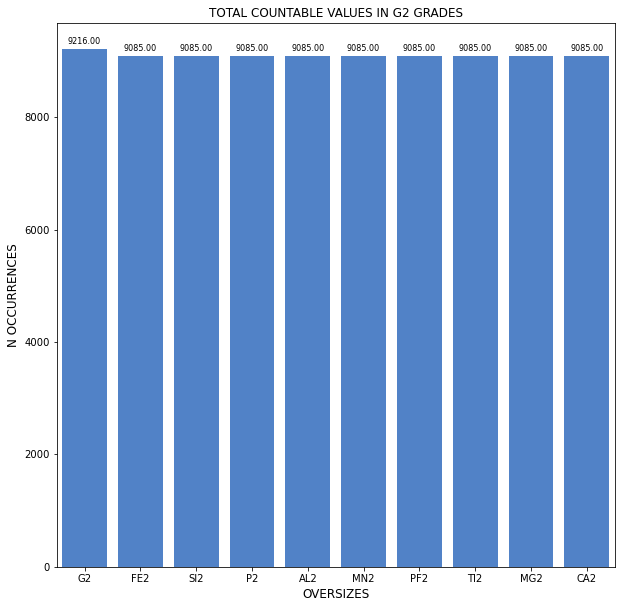

In [1293]:
fig=plt.figure(figsize=chart_size)

plots=sea.barplot(x=total.index, y=total.values, color=valecolor['AZUL'])

# ITERATING OVER THE THE BARS
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.title('TOTAL COUNTABLE VALUES IN G2 GRADES')
plt.ylabel('N OCCURRENCES', fontsize=12)
plt.xlabel('OVERSIZES', fontsize=12)

plt.show()

fig.savefig(proj + '_G2_COUNTABLE_VALUES_ISO.jpeg', transparent=None)

## G3 - PASSANTE 0.15 MM

In [1294]:
df_g3 = fac.loc[:,set_g3]

In [1295]:
df_g3.head()

G3    FE3   SI3    P3   AL3   MN3   PF3   TI3    MG3   CA3
0   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN
1  0.56  63.57  0.76  0.23  1.39  0.04  6.06  0.23  0.010  0.06
2  2.69  65.55  0.58  0.10  0.97  0.05  3.19  1.16  0.008  0.06
3  1.70  56.95  1.07  0.24  6.59  0.09  9.30  0.86  0.030  0.04
4   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN

In [1296]:
df_g3.describe()

G3          FE3          SI3           P3          AL3  \
count  9216.000000  8962.000000  8962.000000  8962.000000  8962.000000   
mean      9.234749    61.616003     4.331452     0.076281     3.012973   
std       7.814660     9.536148     8.528845     0.116111     4.850664   
min       0.000000     1.040000     0.080000     0.001000     0.030000   
25%       2.610000    60.720000     0.900000     0.020000     0.720000   
50%       7.280000    65.180000     1.590000     0.030000     1.310000   
75%      14.500000    66.990000     3.350000     0.080000     2.720000   
max      62.180000    69.780000    75.870000     2.040000    39.400000   

               MN3          PF3          TI3          MG3          CA3  
count  8962.000000  8962.000000  8694.000000  8956.000000  8955.000000  
mean      0.531475     3.141773     0.303316     0.089457     0.024064  
std       1.133131     3.117499     0.637777     0.560384     0.031629  
min       0.004000     0.080000     0.001000     0.001000     0.001000  
25%       0.070000     1.200000     0.040000     0.020000     0.010000  
50%       0.150000     1.930000     0.060000     0.040000     0.020000  
75%       0.520000     3.610000     0.210000     0.070000     0.030000  
max      34.980000    21.210000    10.070000    23.710000     0.990000

In [1297]:
df_g3['G3_COUNT'] = df_g3.count(axis=1)

In [1298]:
df_g3['G3_COUNT'].unique()

array([ 0, 10,  9,  1,  7], dtype=int64)

In [1299]:
df_g3.groupby('G3_COUNT').count()

G3   FE3   SI3    P3   AL3   MN3   PF3   TI3   MG3   CA3
G3_COUNT                                                            
0            0     0     0     0     0     0     0     0     0     0
1          254     0     0     0     0     0     0     0     0     0
7            3     3     3     3     3     3     3     0     0     0
9          272   272   272   272   272   272   272     7   269   268
10        8687  8687  8687  8687  8687  8687  8687  8687  8687  8687

In [1300]:
i = (fac['G3'] == 0)

In [1301]:
fac.loc[i,:].shape

(254, 69)

In [1302]:
#confirmado 254 zeros nessa fração

In [1303]:
# 3 amostras sem nenhum dos menores
# 272 amostras com 1 teor faltante, a maioria falta ti3

In [1304]:
# interceptando e tratando as 3 amostras sem menores

In [1305]:
i = (df_g3['G3_COUNT'] == 7)

In [1306]:
fac.loc[i,'TAG'] = '3_6'

In [1307]:
fac.loc[i, 'TI3'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'TIGL', 'wavg'), axis =1)

In [1308]:
fac.loc[i, 'MG3'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'MGGL', 'wavg'), axis =1)

In [1309]:
fac.loc[i, 'CA3'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'CAGL', 'wavg'), axis =1)

In [1310]:
fac.loc[i,:]

FURO              NA     DE    ATE  LENGTH CLV  CLM  CLI   FEGL  \
1592  FRN5W-0350  FRN5W-0350-002  40.52  52.14   11.62  HF   HF   HF  63.11   
1597  FRN5W-0351  FRN5W-0351-004  48.24  58.83   10.59  HC  HMN  HMN  60.73   
1611  FRN5W-0354  FRN5W-0354-002   8.97  17.66    8.69  HF   HF   HF  66.91   

          SIGL    PGL      ALGL  MNGL  PFGL      TIGL      MGGL      CAGL  \
1592  1.383126  0.040  0.885585  0.09  3.62  0.054098  0.027112  0.012374   
1597  1.020000  0.030  1.230000  5.48  3.13  0.001000  0.130000  0.015956   
1611  1.100000  0.009  0.280000  1.27  1.00  0.054098  0.027112  0.012374   

        G1A    G1B     G2     G3   FE1A  SI1A   P1A  AL1A  MN1A  PF1A  \
1592  28.64  12.81  51.09   7.45  59.25  0.69  0.04  8.81  0.09  5.58   
1597  40.45  17.51  39.58   2.46  57.33  0.95  0.03  1.52  7.00  3.69   
1611   0.00   4.82  84.08  11.08    NaN   NaN   NaN   NaN   NaN   NaN   

          TI1A      MG1A      CA1A   FE1B  SI1B   P1B  AL1B  MN1B  PF1B  \
1592  0.054098  0.027112  0.012374  64.28  0.73  0.03  4.38  0.09  2.79   
1597  0.049339  0.041992  0.015956  61.99  1.04  0.03  1.35  4.42  2.91   
1611       NaN       NaN       NaN  60.23  0.97  0.01  0.57  7.35  2.68   

          TI1B      MG1B      CA1B   FE2   SI2     P2   AL2   MN2   PF2  \
1592  0.054098  0.027112  0.012374  65.0  0.96  0.040  3.33  0.08  2.76   
1597  0.049339  0.041992  0.015956  63.5  1.07  0.040  0.86  3.42  2.69   
1611  0.054098  0.027112  0.012374  67.4  0.98  0.009  0.23  0.94  0.84   

           TI2       MG2       CA2    FE3   SI3    P3   AL3   MN3   PF3  \
1592  0.054098  0.027112  0.012374  63.10  1.03  0.07  4.89  0.14  3.51   
1597  0.049339  0.041992  0.015956  63.48  1.38  0.06  1.47  2.64  2.74   
1611  0.054098  0.027112  0.012374  66.10  2.06  0.01  0.45  1.10  1.49   

           TI3       MG3       CA3    FQGL    FQ1A    FQ1B     FQ2     FQ3  \
1592  0.054098  0.027112  0.012374  100.10  100.00  100.00  100.19  100.00   
1597  0.049339  0.041992  0.015956   99.39   98.69   99.71   99.92   99.90   
1611  0.054098  0.027112  0.012374   99.70     NaN   99.86   99.66   99.96   

        FGRA  REC_P     FL_AN  FQ_GLA STATUS  TAG      NFQGL  
1592   99.99    NaN  CJCP2008     NaN    NaN  3_6  96.418525  
1597  100.00    NaN  CJCP2008     NaN    NaN  3_6        NaN  
1611   99.99    NaN  CJCP2008     NaN    NaN  3_6        NaN

In [1311]:
# interceptando e tratando as 272 amostras com 1 dos analitos faltantes

In [1312]:
i = (df_g3['G3_COUNT'] == 9) & (df_g3['TI3'].isna())

In [1313]:
fac.loc[i, 'TI3'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'TIGL', 'wavg'), axis =1)

In [1314]:
# 3 com mg3 ausente

In [1315]:
i = (df_g3['G3_COUNT'] == 9) & (df_g3['MG3'].isna())

In [1316]:
fac.loc[i, 'MG3'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'MGGL', 'wavg'), axis =1)

In [1317]:
# 4 com ca3 ausente

In [1318]:
i = (df_g3['G3_COUNT'] == 9) & (df_g3['CA3'].isna())

In [1319]:
fac.loc[i, 'CA3'] = fac[i].apply(lambda x: stats_from_table('SN5_basic_stats_table_GL.xlsx', x.CLI, 'CAGL', 'wavg'), axis =1)

In [1320]:
fac.loc[i,:]

FURO              NA     DE    ATE  LENGTH CLV CLM CLI   FEGL  \
94     FRN5E-0122  FRN5E-0122-001   0.00   7.90    7.90  HM  HF  HF  68.47   
127    FRN5E-0133  FRN5E-0133-001   0.00   8.50    8.50  HM  HF  HF  68.80   
7872     N5E-0930    N5E-0930-004  24.24  32.33    8.09  HM  HF  HF  67.59   
21156  N5W-FG-043  N5W-FG-043-001   8.14  20.60   12.46  CM  CE  CE  57.66   

       SIGL   PGL  ALGL  MNGL  PFGL  TIGL      MGGL   CAGL    G1A    G1B  \
94     0.58  0.02  0.43  0.09  0.85  0.03  0.030000  0.010   0.00   7.29   
127    0.52  0.01  0.35  0.06  0.57  0.04  0.027112  0.010   0.00   5.74   
7872   0.85  0.02  0.38  0.19  1.81  0.02  0.010000  0.010   0.00   7.03   
21156  0.65  0.33  7.31  0.03  8.08  0.65  0.030000  0.002  60.91  15.79   

          G2     G3   FE1A  SI1A   P1A  AL1A  MN1A  PF1A  TI1A  MG1A  \
94     70.39  22.32    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
127    83.25  11.01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
7872   56.08  35.99    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
21156  22.07   1.22  57.74  0.58  0.32  7.23  0.03  8.19   0.6  0.03   

           CA1A   FE1B  SI1B   P1B  AL1B  MN1B  PF1B  TI1B      MG1B  \
94          NaN  67.74  0.87  0.04  0.57  0.11  1.29  0.05  0.070000   
127         NaN  68.06  0.61  0.03  0.48  0.21  1.17  0.05  0.027112   
7872        NaN  66.59  1.05  0.03  0.74  0.98  1.53  0.03  0.020000   
21156  0.009831  57.50  0.70  0.35  7.18  0.03  8.17  0.84  0.030000   

           CA1B    FE2   SI2    P2   AL2   MN2   PF2   TI2       MG2  \
94     0.010000  68.78  0.51  0.01  0.37  0.07  0.61  0.03  0.027112   
127    0.010000  68.92  0.50  0.01  0.33  0.05  0.49  0.03  0.027112   
7872   0.060000  67.72  0.82  0.02  0.33  0.13  1.80  0.02  0.027112   
21156  0.009831  57.78  0.78  0.32  7.44  0.04  7.64  0.63  0.050000   

            CA2    FE3   SI3    P3    AL3   MN3   PF3   TI3   MG3       CA3  \
94     0.012374  67.74  0.72  0.04   0.56  0.16  1.48  0.06  0.01  0.012374   
127    0.010000  68.34  0.64  0.02   0.44  0.12  0.94  0.04  0.01  0.012374   
7872   0.012374  67.59  0.83  0.02   0.37  0.13  1.90  0.02  0.01  0.012374   
21156  0.010000  53.63  1.20  0.41  10.57  0.05  9.55  0.90  0.08  0.009831   

        FQGL   FQ1A    FQ1B     FQ2     FQ3   FGRA  REC_P              FL_AN  \
94     99.97    NaN   99.94   99.98   99.98  100.0    NaN               TPCP   
127    99.97    NaN   99.97   99.98   99.97  100.0    NaN               TPCP   
7872   99.99    NaN  100.02  100.01   99.99   99.1  80.32      nautilus_rotp   
21156  99.99  100.0  100.00  100.00  100.00  100.0    NaN  nautilus_tprn_5fx   

       FQ_GLA STATUS   TAG  NFQGL  
94        NaN    NaN   2_7    NaN  
127       NaN    NaN   2_8    NaN  
7872   100.00    NaN   2_7    NaN  
21156   99.99    NaN  1B_8    NaN

###### VERIFICANDO REGULARIZAÇÃO G3

In [1321]:
df = fac.loc[:, set_g3]

In [1322]:
total = df.count()

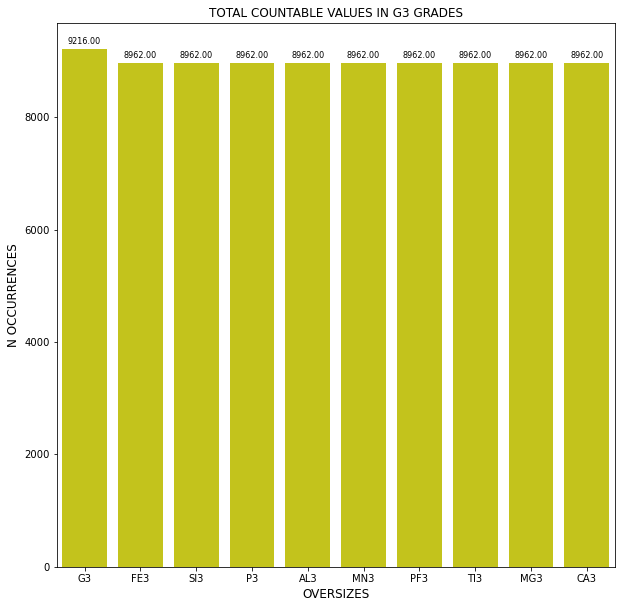

In [1323]:
fig=plt.figure(figsize=chart_size)

plots=sea.barplot(x=total.index, y=total.values, color=valecolor['AMARELO'])

# ITERATING OVER THE THE BARS
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.title('TOTAL COUNTABLE VALUES IN G3 GRADES')
plt.ylabel('N OCCURRENCES', fontsize=12)
plt.xlabel('OVERSIZES', fontsize=12)

plt.show()

fig.savefig(proj + '_G3_COUNTABLE_VALUES_ISO.jpeg', transparent=None)

## FECHAMENTOS GRAN

In [1324]:
i = (~fac['FGRA'].between(98,102)) & fac['FGRA'].notna()

In [1325]:
fac.loc[i,:]

FURO               NA      DE     ATE  LENGTH       CLV  CLM  \
2702      N5E-0155     N5E-0155-025  122.20  127.20    5.00     HMAMN   HF   
2705      N5E-0155     N5E-0155-037  141.00  145.90    4.90      HMMN  HMN   
2706      N5E-0155     N5E-0155-038  145.90  154.10    8.20      HMMN   HF   
3095      N5E-0202     N5E-0202-030  186.45  192.60    6.15       HDA   HC   
4172      N5E-0318     N5E-0318-008  166.45  172.25    5.80        HD   HC   
4243      N5E-0322     N5E-0322-019  144.50  150.55    6.05        HD   HC   
4245      N5E-0322     N5E-0322-021  156.55  162.55    6.00        HD   HC   
4248      N5E-0322     N5E-0322-024  174.55  180.60    6.05        HD   HC   
4447      N5E-0332     N5E-0332-035  212.95  219.45    6.50        HD   HC   
4535      N5E-0344     N5E-0344-009   48.55   54.70    6.15        HM   HF   
4536      N5E-0344     N5E-0344-010   54.70   60.85    6.15        HM   HF   
4592      N5E-0347     N5E-0347-019  113.80  119.45    5.65        HM   HF   
4593      N5E-0347     N5E-0347-020  119.45  125.10    5.65        HM   HF   
4614      N5E-0348     N5E-0348-007   41.85   48.35    6.50        HM   HF   
4615      N5E-0348     N5E-0348-008   48.35   54.85    6.50        HM   HF   
4626      N5E-0350     N5E-0350-005   23.20   29.70    6.50       HMA   HF   
4627      N5E-0350     N5E-0350-010   29.70   36.20    6.50       HMA   HF   
4629      N5E-0350     N5E-0350-008   42.70   49.60    6.90       MBT   HF   
4715      N5E-0356     N5E-0356-003   14.60   21.00    6.40       HDL   HC   
4718      N5E-0356     N5E-0356-005   35.90   42.20    6.30       HMA   HF   
4742      N5E-0357     N5E-0357-033  108.60  114.70    6.10        HM   HF   
4747      N5E-0357     N5E-0357-021  172.40  178.40    6.00        HM   HF   
4752      N5E-0357     N5E-0357-026  202.80  208.90    6.10        HD   HC   
4784      N5E-0360     N5E-0360-005   39.95   46.05    6.10       HMA   HF   
4785      N5E-0360     N5E-0360-006   46.05   52.15    6.10       HMA   HF   
4787      N5E-0360     N5E-0360-008   58.25   64.35    6.10       HMA   HF   
4811      N5E-0362     N5E-0362-008   41.85   47.90    6.05       HMA   HF   
4812      N5E-0362     N5E-0362-009   47.90   53.95    6.05  HMA/HMAM   HF   
4868      N5E-0367     N5E-0367-022  128.10  133.75    5.65        HM   HF   
4912      N5E-0368     N5E-0368-023  150.20  156.30    6.10        HM   HF   
4913      N5E-0368     N5E-0368-024  156.30  162.75    6.45        HM   HF   
4914      N5E-0368     N5E-0368-025  162.75  169.20    6.45        HM   HF   
4990      N5E-0374     N5E-0374-022  152.70  158.30    5.60        HD   HF   
5052      N5E-0379     N5E-0379-008   44.10   50.25    6.15        HM   HF   
5054      N5E-0379     N5E-0379-010   55.55   61.60    6.05       HMA   HF   
5055      N5E-0379     N5E-0379-011   61.60   67.65    6.05       HMA   HF   
5130      N5E-0385     N5E-0385-003   11.28   18.83    7.55       HML   HF   
5133      N5E-0385     N5E-0385-006   31.03   36.73    5.70       HMA   HF   
5255      N5E-0397     N5E-0397-007   32.70   37.60    4.90       MBT   HF   
5319      N5E-0401     N5E-0401-022  133.00  139.10    6.10        HM   HF   
5329      N5E-0401     N5E-0401-032  194.80  202.10    7.30        HD   HC   
5354      N5E-0402     N5E-0402-022  131.45  137.55    6.10        HM   HF   
5356      N5E-0402     N5E-0402-024  143.65  149.75    6.10        HM   HF   
5367      N5E-0402     N5E-0402-033  228.30  236.40    8.10        HD   HC   
5433      N5E-0406     N5E-0406-028  164.10  170.10    6.00        HD   HC   
5548      N5E-0411     N5E-0411-030  185.00  191.00    6.00        HD   HC   
5550      N5E-0411     N5E-0411-032  197.00  203.00    6.00        HD   HC   
5553      N5E-0411     N5E-0411-035  215.00  221.10    6.10        HD   HC   
5595      N5E-0414     N5E-0414-014   78.10   84.10    6.00        HM   HF   
5607      N5E-0414     N5E-0414-026  151.00  157.00    6.00        HD   HC   
5653      N5E-0417     N5E-0417-006 

In [1326]:
fac.loc[i,:].shape

(119, 69)

In [1327]:
fac = cleanup_gl_grq(fac, i)

## FECHAMENTO GRANULOMÉTRICO

In [1328]:
i = (~fac['FGRA'].between(98,102)) & fac['FGRA'].notna()

In [1329]:
fac.loc[i, 'TAG'] = 'OUT_FGRA'

In [1330]:
fac = cleanup_gl_grq(fac, i)

## FECHAMENTOS QUÍMICOS GL, 1A, 1B, 2 E 3

###### GL

###### SOBRESCREVER FQs POR CONTA DE PROBLEMAS ENCONTRADOS NOS VALORES DO GDMS

In [1331]:
i = fac['FEGL'].notna()

In [1332]:
fac.loc[i, 'FQGL'] = fac[i].apply(lambda x: fq(x.FEGL, x.SIGL, x.PGL, x.ALGL, x.MNGL, x.PFGL, x.TIGL, x.MGGL, x.CAGL), axis =1)

In [1333]:
i = fac['FE1A'].notna()

In [1334]:
fac.loc[i, 'FQ1A'] = fac[i].apply(lambda x: fq(x.FE1A, x.SI1A, x.P1A, x.AL1A, x.MN1A, x.PF1A, x.TI1A, x.MG1A, x.CA1A), axis =1)

In [1335]:
i = fac['FE1B'].notna()

In [1336]:
fac.loc[i, 'FQ1B'] = fac[i].apply(lambda x: fq(x.FE1B, x.SI1B, x.P1B, x.AL1B, x.MN1B, x.PF1B, x.TI1B, x.MG1B, x.CA1B), axis =1)

In [1337]:
i = fac['FE2'].notna()

In [1338]:
fac.loc[i, 'FQ2'] = fac[i].apply(lambda x: fq(x.FE2, x.SI2, x.P2, x.AL2, x.MN2, x.PF2, x.TI2, x.MG2, x.CA2), axis =1)

In [1339]:
i = fac['FE3'].notna()

In [1340]:
fac.loc[i, 'FQ3'] = fac[i].apply(lambda x: fq(x.FE3, x.SI3, x.P3, x.AL3, x.MN3, x.PF3, x.TI3, x.MG3, x.CA3), axis =1)

In [1341]:
# CLEAN UP FORA DO CORREDOR 97-103

In [1342]:
i = (~fac['FQGL'].between(97,103)) & fac['FQGL'].notna()

In [1343]:
fac.loc[i, 'TAG'] = 'OUT_FQGL'

In [1344]:
fac = cleanup_gl_grq(fac, i)

In [1345]:
i = (~fac['FQ1A'].between(97,103)) & fac['FQ1A'].notna()

In [1346]:
fac.loc[i, 'TAG'] = 'OUT_FQ1A'

In [1347]:
fac = cleanup_gl_grq(fac, i)

In [1348]:
i = (~fac['FQ1B'].between(97,103)) & fac['FQ1B'].notna()

In [1349]:
fac.loc[i, 'TAG'] = 'OUT_FQ1B'

In [1350]:
fac = cleanup_gl_grq(fac, i)

In [1351]:
i = (~fac['FQ2'].between(97,103)) & fac['FQ2'].notna()

In [1352]:
fac.loc[i, 'TAG'] = 'OUT_FQ2'

In [1353]:
fac = cleanup_gl_grq(fac, i)

In [1354]:
i = (~fac['FQ3'].between(97,103)) & fac['FQ3'].notna()

In [1355]:
fac.loc[i, 'TAG'] = 'OUT_FQ3'

In [1356]:
fac = cleanup_gl_grq(fac, i)

## RECUPERAÇÃO INTERVALAR

In [1357]:
i = (fac['REC_P'] < 60)

In [1358]:
fac.loc[i, :]

FURO                 NA      DE     ATE  LENGTH       CLV  CLM  \
2134      N5E-0080       N5E-0080-020   94.20   99.00    4.80      HMMN  HMN   
2169      N5E-0081       N5E-0081-014   62.50   66.45    3.95        HM   HF   
2289      N5E-0093       N5E-0093-009   39.50   44.50    5.00       HMA   HF   
2297      N5E-0093       N5E-0093-017   79.20   84.20    5.00  HMMN/HMA   HF   
2299      N5E-0093       N5E-0093-019   89.20   94.20    5.00       HMA   HF   
2300      N5E-0093       N5E-0093-020   94.20   99.20    5.00       HMA   HF   
2332      N5E-0103       N5E-0103-007   30.00   35.00    5.00  HMA/HMAM   HF   
2334      N5E-0103       N5E-0103-009   40.00   45.00    5.00       HMA   HF   
2422      N5E-0114       N5E-0114-037  157.80  179.50   21.70  HM/HDA/H   HF   
2430      N5E-0115       N5E-0115-005   20.00   25.00    5.00   HD(MBT)   HC   
2456      N5E-0119    N5E-0119-NS-001   43.10   45.95    2.85     MS/MD   MS   
2465      N5E-0122       N5E-0122-005   18.95   28.35    9.40    HMA/HD   HF   
2485      N5E-0124    N5E-0124-NR-001   30.50   34.50    4.00       HDA   HC   
2519      N5E-0132       N5E-0132-015   73.00   76.85    3.85       HMA   HF   
2521      N5E-0132       N5E-0132-017   81.85   86.70    4.85       HMA   HF   
2523      N5E-0132       N5E-0132-019   90.25   96.40    6.15     HMAMN   HF   
2535      N5E-0133       N5E-0133-010   45.40   50.40    5.00    HMMNSI   HF   
2536      N5E-0133       N5E-0133-011   50.40   55.40    5.00    HMMNSI   HF   
2537      N5E-0133       N5E-0133-012   55.40   60.40    5.00    HMMNSI   HF   
2540      N5E-0133       N5E-0133-015   68.80   71.25    2.45    HMMNSI   HF   
2547      N5E-0133       N5E-0133-022  100.40  105.40    5.00     HMASI   HF   
2554      N5E-0133       N5E-0133-029  132.85  137.05    4.20     HMASI   HF   
2556      N5E-0133       N5E-0133-031  142.00  146.30    4.30      HDMN   HC   
2586      N5E-0137       N5E-0137-017   78.30   83.10    4.80     HMAMN   HF   
2592      N5E-0137       N5E-0137-023  107.10  111.90    4.80     HMAMN   HF   
2624      N5E-0138       N5E-0138-026  124.60  129.65    5.05        HD   HC   
2662      N5E-0150       N5E-0150-010   73.20   76.70    3.50      HMMN   HF   
2751      N5E-0161       N5E-0161-001    0.00    8.10    8.10        CM   CE   
2755      N5E-0161       N5E-0161-005   21.00   25.20    4.20        CM   CE   
2889      N5E-0174       N5E-0174-009   40.00   45.00    5.00        HM   HF   
2905      N5E-0174       N5E-0174-025  120.00  125.00    5.00       HMA   HF   
2948      N5E-0190    N5E-0190-NR-001  131.60  133.20    1.60     HMAMN  HMN   
2952      N5E-0190       N5E-0190-034  148.00  155.50    7.50     HMAMN   HF   
2979      N5E-0192    N5E-0192-NR-001   60.35   64.85    4.50      HMMN  HMN   
2981      N5E-0192    N5E-0192-NR-002   69.85   72.10    2.25      HMMN  HMN   
2986      N5E-0192    N5E-0192-NR-003   93.50   95.10    1.60       HMA   HF   
2994      N5E-0192    N5E-0192-GP-001  150.20  154.50    4.30   MSD(HD)  MSD   
2995      N5E-0192       N5E-0192-033  154.50  170.10   15.60  HDA/MBT/   HC   
3007      N5E-0195       N5E-0195-011   45.75   53.00    7.25    HMMNSI   HF   
3008      N5E-0195       N5E-0195-012   53.00   57.50    4.50        JP   JP   
3043      N5E-0197    N5E-0197-NR-001  200.90  203.00    2.10       HDA   HC   
3085      N5E-0202       N5E-0202-020  114.20  119.80    5.60     HMAMN   HF   
3089      N5E-0202       N5E-0202-024  142.35  151.00    8.65       HDA   HC   
3090      N5E-0202       N5E-0202-025  151.00  158.75    7.75       HDA   HC   
3091      N5E-0202       N5E-0202-026  158.75  168.00    9.25       HDA   HC   
3125      N5E-0204    N5E-0204-NS-001  108.15  110.10    1.95        MD   MD   
3160      N5E-0205       N5E-0205-023  128.70  133.55    4.85     HMASI   HF   
3324      N5E-0220       N5E-0220-018   90.25   94.50    4.25      HMSI   HF   
3362      N5E-0222       N5E-0222-031  166.00  172.00    6.00        HM   HF   
3381      N5E-

In [1359]:
#794 amostras com recuperação inferior a 60%

In [1360]:
fac.loc[i, :].shape

(794, 69)

In [1361]:
fac.loc[i, 'TAG'] = 'OUT_REC'

In [1362]:
fac = cleanup_gl_grq(fac, i)

## QAQC

In [1363]:
df_qaqc

AMOSTRA   AG  DC   DB   DP  DE  A3
0         N5E-0161-009    X NaN  NaN  NaN NaN NaN
1         N5E-0547-007    X NaN  NaN  NaN NaN NaN
2         N5S-0897-002    X NaN  NaN  NaN NaN NaN
3         N5S-0897-007    X NaN  NaN  NaN NaN NaN
4         N5S-0905-002    X NaN  NaN  NaN NaN NaN
5         N5W-0120-007    X NaN  NaN  NaN NaN NaN
6         N5W-0923-003    X NaN  NaN  NaN NaN NaN
7         N5W-0927-003    X NaN  NaN  NaN NaN NaN
8         N5W-0927-004    X NaN  NaN  NaN NaN NaN
9         N5W-1006-001    X NaN  NaN  NaN NaN NaN
10     N5W-FD01217-003  NaN NaN    X  NaN NaN NaN
11  N5W-FD01403-004-03  NaN NaN  NaN    X NaN NaN
12  N5W-FR01381-003-02  NaN NaN  NaN    X NaN NaN
13     N5W-RC00001-006  NaN NaN    X  NaN NaN NaN
14  SN5-FD00003-003-01  NaN NaN    X  NaN NaN NaN
15  SN5-FD00064-005-01  NaN NaN    X  NaN NaN NaN
16  SN5-FD00081-014-01  NaN NaN    X  NaN NaN NaN
17  SN5-FD00203-006-01  NaN NaN  NaN    X NaN NaN
18     SN5-FD00248-004    X NaN  NaN  NaN NaN NaN
19     SN5-FD00262-012    X NaN  NaN  NaN NaN NaN
20     SN5-FR00107-005    X NaN  NaN  NaN NaN NaN
21   SN5-FR00116-AE002  NaN NaN    X  NaN NaN NaN

In [1364]:
lista_qaqc = df_qaqc['AMOSTRA'].to_list()

In [1365]:
i = fac['NA'].isin(lista_qaqc)

In [1366]:
fac.loc[i, :]

FURO               NA      DE     ATE  LENGTH     CLV  CLM  CLI  \
2759      N5E-0161     N5E-0161-009   38.65   43.30    4.65     MBT  MBT   MD   
6952      N5E-0547     N5E-0547-007   36.00   44.00    8.00      MD   MD   MD   
14068     N5S-0897     N5S-0897-002    6.25   14.50    8.25      HM   HF   HF   
14073     N5S-0897     N5S-0897-007   43.45   47.75    4.30      JP   JP   JP   
16471     N5W-0120     N5W-0120-007   54.10   59.10    5.00  MBT/HD  HMN  HMN   
19183     N5W-0923     N5W-0923-003   14.40   16.90    2.50      MD   MD   MD   
19232     N5W-0927     N5W-0927-003   11.00   19.70    8.70      CQ   CE   CE   
19233     N5W-0927     N5W-0927-004   19.70   28.45    8.75     MBT  MBT   CQ   
19763     N5W-1006     N5W-1006-001    0.00    8.75    8.75      CM   CE   CE   
20666  N5W-FD01217  N5W-FD01217-003    2.50    6.65    4.15      CM   CE   HC   
25345  SN5-FD00248  SN5-FD00248-004   32.35   43.32   10.97      HF  HMN  HMN   
25562  SN5-FD00262  SN5-FD00262-012  148.05  152.67    4.62    HGOC  FMN   MD   
26694  SN5-FR00107  SN5-FR00107-005   34.00   50.05   16.05     JPC   JP   JP   

        FEGL   SIGL   PGL   ALGL   MNGL   PFGL  TIGL  MGGL   CAGL    G1A  \
2759     NaN    NaN   NaN    NaN    NaN    NaN   NaN   NaN    NaN    NaN   
6952   30.58  20.87  0.06  22.35   0.53  10.83  1.20  0.21  0.004  42.95   
14068  68.21   0.70  0.03   0.79   0.01   0.79  0.05  0.01  0.020   0.00   
14073  46.00  33.14  0.01   0.58   0.07   0.30  0.03  0.02  0.020  91.09   
16471  61.72   1.41  0.11   2.26   2.27   4.56  0.10  0.02  0.008    NaN   
19183    NaN    NaN   NaN    NaN    NaN    NaN   NaN   NaN    NaN    NaN   
19232  55.46   0.77  0.25   7.66   0.24  10.54  0.77  0.05  0.010   0.00   
19233  53.17   0.64  0.21   9.51   0.23  11.88  1.06  0.04  0.001   0.00   
19763    NaN    NaN   NaN    NaN    NaN    NaN   NaN   NaN    NaN    NaN   
20666    NaN    NaN   NaN    NaN    NaN    NaN   NaN   NaN    NaN    NaN   
25345    NaN    NaN   NaN    NaN    NaN    NaN   NaN   NaN    NaN    NaN   
25562  35.53   1.08  0.08  16.35  16.06  13.13  0.41  0.08  0.030    NaN   
26694    NaN    NaN   NaN    NaN    NaN    NaN   NaN   NaN    NaN    NaN   

         G1B     G2     G3   FE1A   SI1A   P1A   AL1A  MN1A   PF1A  TI1A  \
2759     NaN    NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN   NaN   
6952   20.70  31.81   4.52  28.01  21.87  0.04  23.58  0.61  11.95  1.24   
14068   3.77  88.53   6.80    NaN    NaN   NaN    NaN   NaN    NaN   NaN   
14073   3.83   4.56   0.51  45.68  33.62  0.01   0.57  0.07   0.28  0.03   
16471    NaN    NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN   NaN   
19183    NaN    NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN   NaN   
19232   7.20  82.19  10.61    NaN    NaN   NaN    NaN   NaN    NaN   NaN   
19233  10.18  76.76  13.06    NaN    NaN   NaN    NaN   NaN    NaN   NaN   
19763    NaN    NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN   NaN   
20666    NaN    NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN   NaN   
25345    NaN    NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN   NaN   
25562    NaN    NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN   NaN   
26694    NaN    NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN   NaN   

       MG1A   CA1A   FE1B   SI1B   P1B   AL1B  MN1B   PF1B  TI1B   MG1B  \
2759    NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN   NaN    NaN   
6952   0.22  0.001  31.82  20.23  0.06  21.73  0.69   9.97  1.12  0.200   
14068   NaN    NaN  68.00   0.66  0.03   0.79  0.01   1.17  0.04  0.001   
14073  0.02  0.020  44.75  34.91  0.01   0.55  0.07   0.35  0.03  0.030   
16471   NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN   NaN    NaN   
19183   NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN   NaN    NaN   
19232   NaN    NaN  56.43   0.75  0.25   7.63  0.25   9.20  0.76  0.050   
19233   NaN    NaN  51.80   0.64  0.20  10.04  0.23  13.38  1.07  0.040   
19763   NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN   NaN    NaN   

In [1367]:
fac = cleanup_gl_grq(fac, i)

In [1368]:
fac.loc[i, :]

FURO               NA      DE     ATE  LENGTH     CLV  CLM  CLI  \
2759      N5E-0161     N5E-0161-009   38.65   43.30    4.65     MBT  MBT   MD   
6952      N5E-0547     N5E-0547-007   36.00   44.00    8.00      MD   MD   MD   
14068     N5S-0897     N5S-0897-002    6.25   14.50    8.25      HM   HF   HF   
14073     N5S-0897     N5S-0897-007   43.45   47.75    4.30      JP   JP   JP   
16471     N5W-0120     N5W-0120-007   54.10   59.10    5.00  MBT/HD  HMN  HMN   
19183     N5W-0923     N5W-0923-003   14.40   16.90    2.50      MD   MD   MD   
19232     N5W-0927     N5W-0927-003   11.00   19.70    8.70      CQ   CE   CE   
19233     N5W-0927     N5W-0927-004   19.70   28.45    8.75     MBT  MBT   CQ   
19763     N5W-1006     N5W-1006-001    0.00    8.75    8.75      CM   CE   CE   
20666  N5W-FD01217  N5W-FD01217-003    2.50    6.65    4.15      CM   CE   HC   
25345  SN5-FD00248  SN5-FD00248-004   32.35   43.32   10.97      HF  HMN  HMN   
25562  SN5-FD00262  SN5-FD00262-012  148.05  152.67    4.62    HGOC  FMN   MD   
26694  SN5-FR00107  SN5-FR00107-005   34.00   50.05   16.05     JPC   JP   JP   

       FEGL  SIGL  PGL  ALGL  MNGL  PFGL  TIGL  MGGL  CAGL  G1A  G1B  G2  G3  \
2759    NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   
6952    NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   
14068   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   
14073   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   
16471   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   
19183   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   
19232   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   
19233   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   
19763   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   
20666   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   
25345   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   
25562   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   
26694   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN NaN   

       FE1A  SI1A  P1A  AL1A  MN1A  PF1A  TI1A  MG1A  CA1A  FE1B  SI1B  P1B  \
2759    NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
6952    NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
14068   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
14073   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
16471   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
19183   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
19232   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
19233   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
19763   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
20666   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
25345   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
25562   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
26694   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   

       AL1B  MN1B  PF1B  TI1B  MG1B  CA1B  FE2  SI2  P2  AL2  MN2  PF2  TI2  \
2759    NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   
6952    NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   
14068   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   
14073   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   
16471   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   
19183   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   
19232   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   
19233   NaN   NaN  

## VERIFICAÇÃO FINAL

## GLOBAL

In [1369]:
df_gl = df_g1a=fac.loc[0:, GL]

In [1372]:
GL_COUNT = df_gl.count()[GL]

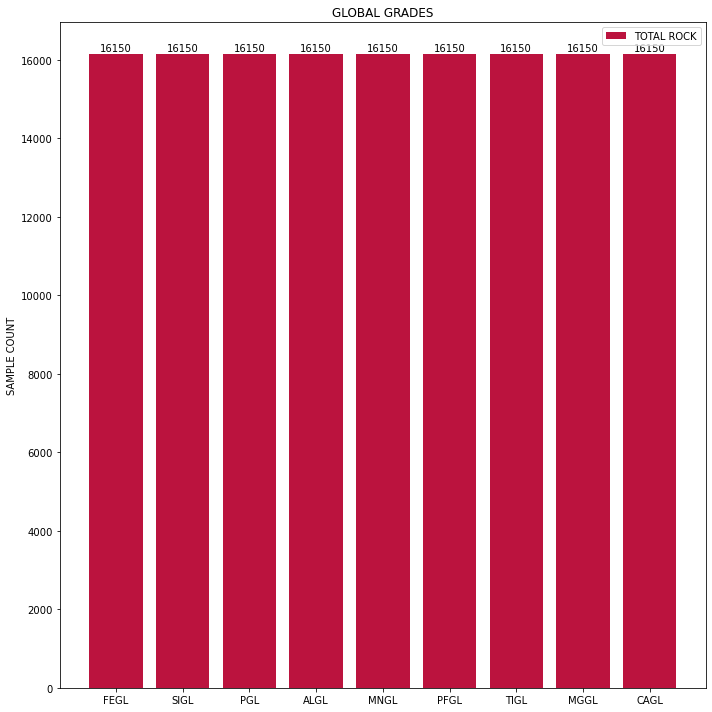

In [1376]:
fig, ax = plt.subplots(figsize=chart_size)

barwidth=1

rects1 = ax.bar(GL, GL_COUNT, label='TOTAL ROCK', color=valecolor['VERMELHO'])

ax.set_ylabel('SAMPLE COUNT')
ax.set_title('GLOBAL GRADES')
ax.set_xticks(GL)
ax.set_xticklabels(GL)
ax.legend()

ax.bar_label(rects1, padding=1)
#ax.bar_label(rects2, padding=1)

fig.tight_layout()

fig.savefig(proj + '_ISOTOPIC_GLOBAL_GRADES_FINAL.jpeg', transparent=None)


## G1A
    
    

In [904]:
df_g1a=fac.loc[0:, set_g1a]

In [905]:
df_g1a['G1AZERO']=df_g1a.apply(lambda row: mass_is_zero(row['G1A']), axis=1)

In [906]:
df_g1a.head(1000)

G1A   FE1A   SI1A    P1A   AL1A   MN1A   PF1A      TI1A      MG1A  \
0      NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
1    71.79  66.96   0.31  0.110   0.65   0.02   2.77  0.070000  0.002000   
2    55.53  67.09   0.27  0.080   0.68   0.03   2.23  0.090000  0.002000   
3    60.94  65.91   0.36  0.110   1.25   0.03   3.42  0.110000  0.003000   
4      NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
5      NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
6      NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
7      NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
8    11.60  68.66   0.27  0.030   0.51   0.26   0.75  0.040000  0.004000   
9    12.70  68.36   0.29  0.030   0.65   0.20   0.95  0.040000  0.004000   
10   21.16  67.78   0.32  0.010   0.56   0.87   0.80  0.030000  0.003000   
11   53.23  67.61   0.33  0.080   1.30   0.14   1.28  0.040000  0.009000   
12     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
13     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
14     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
15     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
16     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
17     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
18     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
19     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
20   25.26  62.72   0.33  0.110   1.71   0.06   7.73  0.170000  0.006000   
21   25.30  63.12   0.37  0.100   3.48   0.06   5.38  0.190000  0.010000   
22    7.75  68.35   0.32  0.030   0.77   0.18   0.88  0.050000  0.002000   
23    7.47  68.85   0.30  0.010   0.43   0.19   0.60  0.030000  0.003000   
24   21.83  67.63   0.57  0.130   1.11   0.14   1.06  0.060000  0.003000   
25     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
26     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
27   56.42  62.49   0.47  0.170   2.34   0.16   6.93  0.280000  0.005000   
28     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
29     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
30     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
31     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
32     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
33   48.29  66.83   0.37  0.110   0.71   0.07   2.25  0.110000  0.002000   
34   33.67  68.09   0.39  0.020   0.90   0.16   1.01  0.050000  0.003000   
35   10.53  68.37   0.35  0.020   0.74   0.18   0.80  0.030000  0.003000   
36   17.35  62.23   0.33  0.150   4.85   0.60   4.10  0.660000  0.010000   
37   24.72  63.90   0.39  0.190   3.65   0.38   3.42  0.180000  0.006000   
38     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
39     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
40    9.64  68.19   0.31  0.040   0.76   0.03   1.19  0.070000  0.001000   
41     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
42     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
43     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
44     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
45     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
46   18.20  67.34   0.30  0.020   1.33   0.10   1.85  0.040000  0.007000   
47    1.44  68.11   0.45  0.020   0.79   0.26   1.08  0.030000  0.002000   
48   23.69  68.86   0.35  0.010   0.41   0.17   0.53  0.030000  0.005000   
49   23.02  68.50   0.39  0.010   0.59   0.22   0.48  0.030000  0.001000   
50     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
51     NaN    NaN    NaN    NaN    NaN    NaN    NaN   

In [907]:
g1a_count = df_g1a.groupby('G1AZERO').count()[set_g1a]

In [908]:
g1a_count

G1A  FE1A  SI1A   P1A  AL1A  MN1A  PF1A  TI1A  MG1A  CA1A
G1AZERO                                                            
False    5449  5449  5449  5449  5449  5449  5449  5449  5449  5449
True     3199     0     0     0     0     0     0     0     0     0

In [909]:
OVERSIZE_G1A=g1a_count.loc[0,:].values.tolist()

In [910]:
ZERO_G1A=g1a_count.loc[1,:].values.tolist()

In [474]:
np.add(OVERSIZE_G1A,ZERO_G1A)

array([10269,  6916,  6916,  6916,  6916,  9900,  6915,  6693,  6890,
        6898])

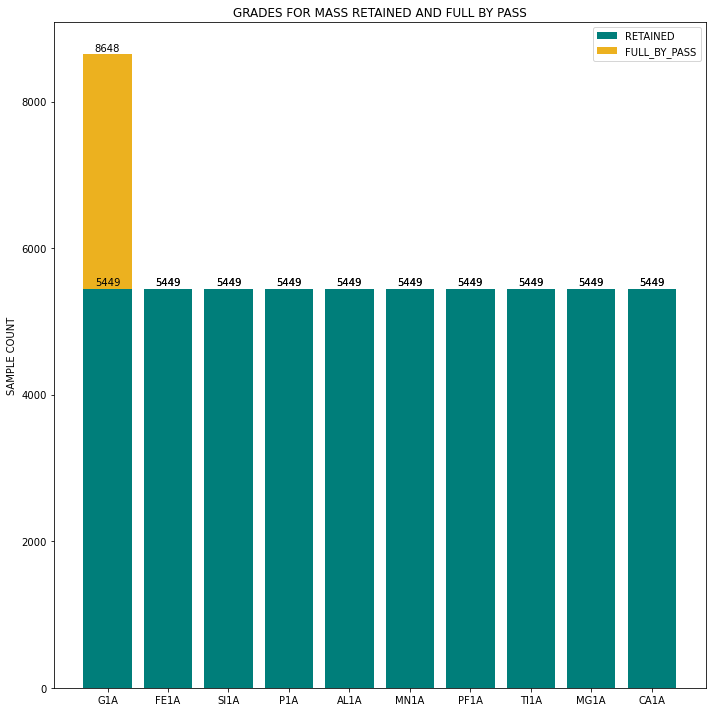

In [911]:
fig, ax = plt.subplots(figsize=chart_size)

barwidth=1

#x=np.arange(len(set_g1a))

rects1 = ax.bar(set_g1a, OVERSIZE_G1A, label='RETAINED', color=valecolor['VERDE'])
rects2 = ax.bar(set_g1a, ZERO_G1A, label='FULL_BY_PASS', bottom=OVERSIZE_G1A,color=valecolor['LARANJA'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('SAMPLE COUNT')
ax.set_title('GRADES FOR MASS RETAINED AND FULL BY PASS')
ax.set_xticks(set_g1a)
ax.set_xticklabels(set_g1a)
ax.legend()

ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=1)

fig.tight_layout()

fig.savefig(proj + '_ISOTOPIC_G1A_VALUES_MASS_GRADE.jpeg', transparent=None)

In [1]:
8648-5449


3199

## G1B

In [912]:
df_g1b=fac.loc[0:, set_g1b]

In [913]:
df_g1b['G1BZERO']=df_g1b.apply(lambda row: mass_is_zero(row['G1B']), axis=1)

In [914]:
df_g1b['G1BZERO']=df_g1b.apply(lambda row: mass_is_zero(row['G1B']), axis=1)

In [915]:
g1b_count = df_g1b.groupby('G1BZERO').count()[set_g1b]
g1b_count

G1B  FE1B  SI1B   P1B  AL1B  MN1B  PF1B  TI1B  MG1B  CA1B
G1BZERO                                                            
False    8254  8254  8254  8254  8254  8254  8254  8254  8254  8254
True      394     0     0     0     0     0     0     0     0     0

In [916]:
OVERSIZE_G1B=g1b_count.loc[0,:].values.tolist()
ZERO_G1B=g1b_count.loc[1,:].values.tolist()

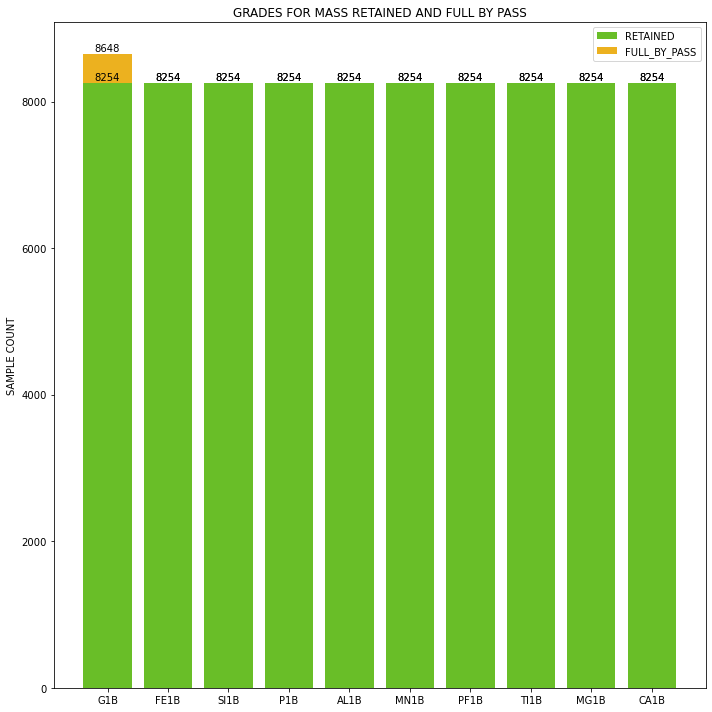

In [917]:
fig, ax = plt.subplots(figsize=chart_size)

barwidth=1

#x=np.arange(len(set_g1a))

rects1 = ax.bar(set_g1b, OVERSIZE_G1B, label='RETAINED', color=valecolor['VERDE2'])
rects2 = ax.bar(set_g1b, ZERO_G1B, label='FULL_BY_PASS', bottom=OVERSIZE_G1B,color=valecolor['LARANJA'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('SAMPLE COUNT')
ax.set_title('GRADES FOR MASS RETAINED AND FULL BY PASS')
ax.set_xticks(set_g1b)
ax.set_xticklabels(set_g1b)
ax.legend()

ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=1)

fig.tight_layout()

fig.savefig(proj + '_ISOTOPIC_G1B_VALUES_MASS_GRADE.jpeg', transparent=None)

## G2

In [918]:
df_g2=fac.loc[0:, set_g2]

In [919]:
df_g2['G2ZERO']=df_g2.apply(lambda row: mass_is_zero(row['G2']), axis=1)

In [920]:
g2_count = df_g2.groupby('G2ZERO').count()[set_g2]
g2_count

G2   FE2   SI2    P2   AL2   MN2   PF2   TI2   MG2   CA2
G2ZERO                                                            
False   8545  8545  8545  8545  8545  8545  8545  8545  8545  8545
True     103     0     0     0     0     0     0     0     0     0

In [921]:
OVERSIZE_G2=g2_count.loc[0,:].values.tolist()
ZERO_G2=g2_count.loc[1,:].values.tolist()

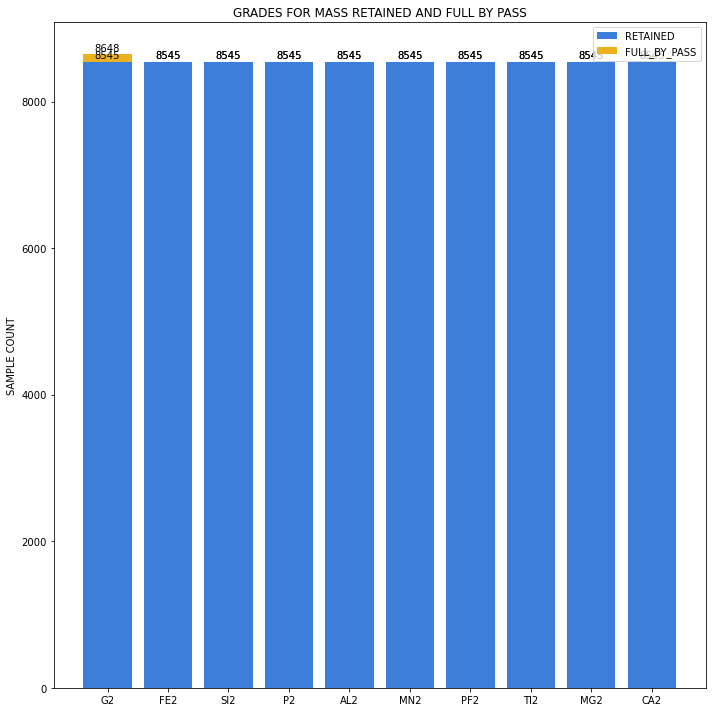

In [922]:
fig, ax = plt.subplots(figsize=chart_size)

barwidth=1

#x=np.arange(len(set_g1a))

rects1 = ax.bar(set_g2, OVERSIZE_G2, label='RETAINED', color=valecolor['AZUL'])
rects2 = ax.bar(set_g2, ZERO_G2, label='FULL_BY_PASS', bottom=OVERSIZE_G2,color=valecolor['LARANJA'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('SAMPLE COUNT')
ax.set_title('GRADES FOR MASS RETAINED AND FULL BY PASS')
ax.set_xticks(set_g2)
ax.set_xticklabels(set_g2)
ax.legend()

ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=1)

fig.tight_layout()

fig.savefig(proj + '_ISOTOPIC_G2_VALUES_MASS_GRADE.jpeg', transparent=None)

## G3

In [923]:
df_g3=fac.loc[0:, set_g3]

In [925]:
df_g3['G3ZERO']=df_g3.apply(lambda row: mass_is_zero(row['G3']), axis=1)

In [926]:
g3_count = df_g3.groupby('G3ZERO').count()[set_g3]
g3_count

G3   FE3   SI3    P3   AL3   MN3   PF3   TI3   MG3   CA3
G3ZERO                                                            
False   8446  8446  8446  8446  8446  8446  8446  8446  8446  8446
True     202     0     0     0     0     0     0     0     0     0

In [927]:
OVERSIZE_G3=g3_count.loc[0,:].values.tolist()
ZERO_G3=g3_count.loc[1,:].values.tolist()

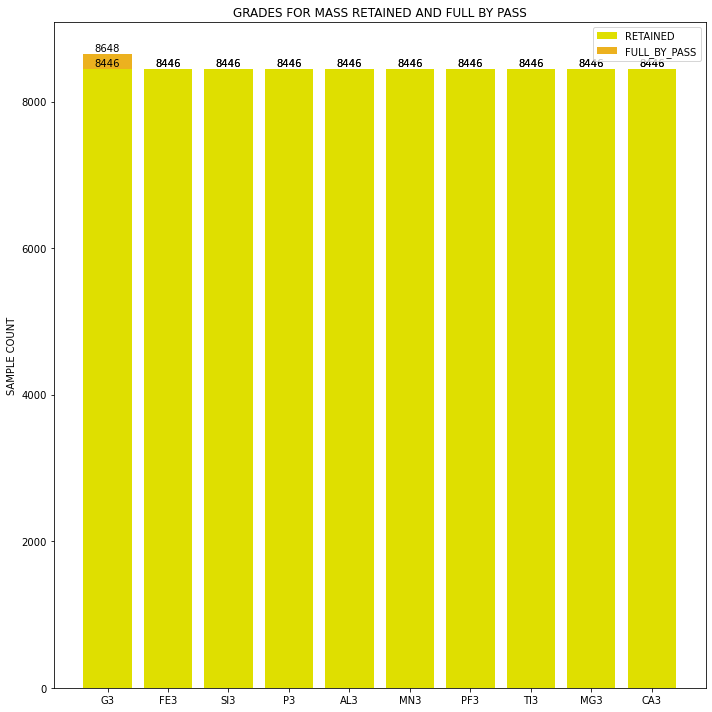

In [928]:
fig, ax = plt.subplots(figsize=chart_size)

barwidth=1

#x=np.arange(len(set_g1a))

rects1 = ax.bar(set_g3, OVERSIZE_G3, label='RETAINED', color=valecolor['AMARELO'])
rects2 = ax.bar(set_g3, ZERO_G3, label='FULL_BY_PASS', bottom=OVERSIZE_G3,color=valecolor['LARANJA'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('SAMPLE COUNT')
ax.set_title('GRADES FOR MASS RETAINED AND FULL BY PASS')
ax.set_xticks(set_g3)
ax.set_xticklabels(set_g3)
ax.legend()

ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=1)

fig.tight_layout()

fig.savefig(proj + '_ISOTOPIC_G3_VALUES_MASS_GRADE.jpeg', transparent=None)

In [ ]:
# GARANTIDOS NIVELAMENTOS GLOBAL E GRANULOQUÍMICO...
# É VIÁVEL CRIAR BREAK COM SEGURANÇA

In [1383]:
fac['BREAK']='NONE'

In [1384]:
i = (fac['FEGL'].notna()) & (fac['G1A'].isna())

In [1385]:
fac.loc[i,'BREAK'] = 'GLB'

In [1386]:
i = (fac['G1A'].notna())

In [1387]:
fac.loc[i,'BREAK'] = 'GRQ'

In [1389]:
fac.columns.to_list()

['FURO',
 'NA',
 'DE',
 'ATE',
 'LENGTH',
 'CLV',
 'CLM',
 'CLI',
 'FEGL',
 'SIGL',
 'PGL',
 'ALGL',
 'MNGL',
 'PFGL',
 'TIGL',
 'MGGL',
 'CAGL',
 'G1A',
 'G1B',
 'G2',
 'G3',
 'FE1A',
 'SI1A',
 'P1A',
 'AL1A',
 'MN1A',
 'PF1A',
 'TI1A',
 'MG1A',
 'CA1A',
 'FE1B',
 'SI1B',
 'P1B',
 'AL1B',
 'MN1B',
 'PF1B',
 'TI1B',
 'MG1B',
 'CA1B',
 'FE2',
 'SI2',
 'P2',
 'AL2',
 'MN2',
 'PF2',
 'TI2',
 'MG2',
 'CA2',
 'FE3',
 'SI3',
 'P3',
 'AL3',
 'MN3',
 'PF3',
 'TI3',
 'MG3',
 'CA3',
 'FQGL',
 'FQ1A',
 'FQ1B',
 'FQ2',
 'FQ3',
 'FGRA',
 'REC_P',
 'FL_AN',
 'FQ_GLA',
 'STATUS',
 'TAG',
 'NFQGL',
 'BREAK']

In [ ]:
dsf_fac = ['FURO','NA','DE','ATE','COMP','CLI','FEGL','SIGL','PGL','ALGL','MNGL','PFGL','TIGL','MGGL','CAGL', \
           'G1A','G1B','G2','G3','FE1A','SI1A','P1A','AL1A','MN1A','PF1A','TI1A','MG1A','CA1A', \
           'FE1B','SI1B','P1B','AL1B','MN1B','PF1B','TI1B','MG1B','CA1B', \
           'FE2','SI2','P2','AL2','MN2','PF2','TI2','MG2','CA2', \
           'FE3','SI3','P3','AL3','MN3','PF3','TI3','MG3','CA3', \
           'FQGL','FQ1A','FQ1B','FQ2','FQ3','FGRA','REC_P', 'BREAK']

In [1388]:
fac.to_csv('fac_assay_final.csv', index=False, na_rep='-99')